# Introduction:

***---This assignment provides a practical application of Exploratory Data Analysis (EDA) within the context of risk analytics in banking and financial services.***

***--- The primary objective is to apply EDA techniques to gain insights into customer data, specifically in the lending domain.***

***--- Additionally, the assignment aims to foster a fundamental understanding of how data is instrumental in mitigating the risk of financial loss associated with lending activities.***

# Business Objectives:

***--- The primary objective of this case study is to identify patterns that signify potential challenges in clients' loan repayment, with the overarching goal of informing strategic actions such as loan denial, adjusting loan amounts, or applying higher interest rates to risky applicants.***

***--- The company aims to utilize Exploratory Data Analysis (EDA) to discern subtle data patterns, ensuring that consumers capable of repaying loans are not unfairly rejected.***

***--- In essence, the company seeks to understand the key driver variables behind loan defaults, utilizing this knowledge to optimize its loan portfolio and enhance risk assessment capabilities.***

***--- As part of developing a comprehensive understanding of the domain, stakeholders are encouraged to independently research risk analytics, focusing on variable types and their significance, to bolster analytical capabilities and support effective risk management decision-making.***

# Navigating Business Dynamics:

***--- In this case study, we delve into the loan provider's struggle to assess applications due to insufficient credit histories, potentially exploited by some consumers turning defaulters. As a member of a consumer finance company specializing in urban lending, our objective is to leverage Exploratory Data Analysis (EDA) for analyzing data patterns.***

***--- The overarching goal is to ensure fair loan approval for applicants capable of repayment. The company faces the dual risk of losing business when denying a capable applicant and incurring financial loss when approving a potential defaulter.***

***--- The dataset includes scenarios of clients with payment difficulties and those who pay on time. The study aims to  understand how consumer and loan attributes influence default tendencies.***

# Importing Necessary Packages and Warnings

In [1]:
# Importing the libaries
import numpy as np   
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Filtering Warnings
import warnings
warnings.filterwarnings('ignore')

# Data Reading and Loading: Setting the Foundation

In [3]:
# Reading the dataset
df_appdata = pd.read_csv("application_data.csv")
df_appdata.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

# Data Reading and Loading: The Second Dataset

In [4]:
# Importing and Exploring the 'previous_application.csv' Dataset

df_appdata_pre = pd.read_csv("previous_application.csv")
df_appdata_pre.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

***Data Inspection: Setting the Stage for EDA***

***--- Before delving into the Exploratory Data Analysis (EDA) procedures, our initial step involves a comprehensive inspection of the dataset.***

In [5]:
df_appdata.shape

(307511, 122)

In [6]:
df_appdata.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

***--- describe() in Pandas summarizes key statistics of a DataFrame, including count, mean, standard deviation, minimum, 25th, 50th (median), 75th percentiles, and maximum. It provides a quick overview of the data's central tendency and dispersion.***

In [7]:
df_appdata.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  ...  \
count               307511.000000  307511.000000  307511.000000  ...   
mean                     0.020868  -16036.995067   63815.045904  ...   
std                      0.013831    4363.988632  141275.766519  ...   
min                      0.000290  -25229.000000  -17912.000000  ...   
25%                      0.010006  -19682.000000   -2760.000000  ...   
50%                      0.018850  -15750.000000   -1213.000000  ...   
75%                      0.028663  -12413.000000    -289.000000  ...   
max                      0.072508   -7489.000000  365243.000000  ...   

       FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
count     307511.000000     307511.000000     307511.000000     307511.000000   
mean           0.008130          0.000595          0.000507          0.000335   
std            0.089798          0.024387          0.022518          0.018299   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000   
75%            0.000000          0.000000          0.000000          0.000000   
max            1.000000          1.000000          1.000000          1.000000   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000              265992.000000   
mean                     0.006402                   0.007000   
std                      0.083849                   0.110757   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               265992.000000              265992.000000   
mean                     0.034362                   0.267395   
std                      0.204685                   0.916002   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              265992.000000               265992.000000  
mean                    0.265474                    1.899974  
std                     0.794056                    1.869295  
min                     0.000000                    0.000000  
25%              

***Handling Null Values***

In [8]:
df_appdata.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [9]:
round(df_appdata.isnull().sum()/len(df_appdata)*100,2).sort_values(ascending = False)

COMMONAREA_MEDI             69.87
COMMONAREA_AVG              69.87
COMMONAREA_MODE             69.87
NONLIVINGAPARTMENTS_MODE    69.43
NONLIVINGAPARTMENTS_AVG     69.43
                            ...  
NAME_FAMILY_STATUS           0.00
NAME_EDUCATION_TYPE          0.00
NAME_INCOME_TYPE             0.00
AMT_ANNUITY                  0.00
SK_ID_CURR                   0.00
Length: 122, dtype: float64

***Handling Missing Values: Theoretical Threshold***

***--- In the context of addressing missing values, there's a theoretical guideline proposing that a maximum of 25 to 30% missing values is acceptable.***

***--- Beyond this threshold, consideration is given to dropping the variable from the analysis. This approach aims to maintain data integrity and analysis reliability.***

In [10]:
# Identifying null values greater than 30% and droping them.

null_values=round(df_appdata.isnull().sum()/len(df_appdata)*100, 2).sort_values(ascending = False)
null_values

COMMONAREA_MEDI             69.87
COMMONAREA_AVG              69.87
COMMONAREA_MODE             69.87
NONLIVINGAPARTMENTS_MODE    69.43
NONLIVINGAPARTMENTS_AVG     69.43
                            ...  
NAME_FAMILY_STATUS           0.00
NAME_EDUCATION_TYPE          0.00
NAME_INCOME_TYPE             0.00
AMT_ANNUITY                  0.00
SK_ID_CURR                   0.00
Length: 122, dtype: float64

In [11]:
null_values_30 = null_values[null_values>30]
null_values_30

COMMONAREA_MEDI                 69.87
COMMONAREA_AVG                  69.87
COMMONAREA_MODE                 69.87
NONLIVINGAPARTMENTS_MODE        69.43
NONLIVINGAPARTMENTS_AVG         69.43
NONLIVINGAPARTMENTS_MEDI        69.43
FONDKAPREMONT_MODE              68.39
LIVINGAPARTMENTS_MODE           68.35
LIVINGAPARTMENTS_AVG            68.35
LIVINGAPARTMENTS_MEDI           68.35
FLOORSMIN_AVG                   67.85
FLOORSMIN_MODE                  67.85
FLOORSMIN_MEDI                  67.85
YEARS_BUILD_MEDI                66.50
YEARS_BUILD_MODE                66.50
YEARS_BUILD_AVG                 66.50
OWN_CAR_AGE                     65.99
LANDAREA_MEDI                   59.38
LANDAREA_MODE                   59.38
LANDAREA_AVG                    59.38
BASEMENTAREA_MEDI               58.52
BASEMENTAREA_AVG                58.52
BASEMENTAREA_MODE               58.52
EXT_SOURCE_1                    56.38
NONLIVINGAREA_MODE              55.18
NONLIVINGAREA_AVG               55.18
NONLIVINGARE

***--- The provided code generates a bar graph illustrating the count of null values for columns where the null values exceed 30%.***

***--- This visualization provides a clear overview of columns with significant missing data, aiding in data quality assessment.***

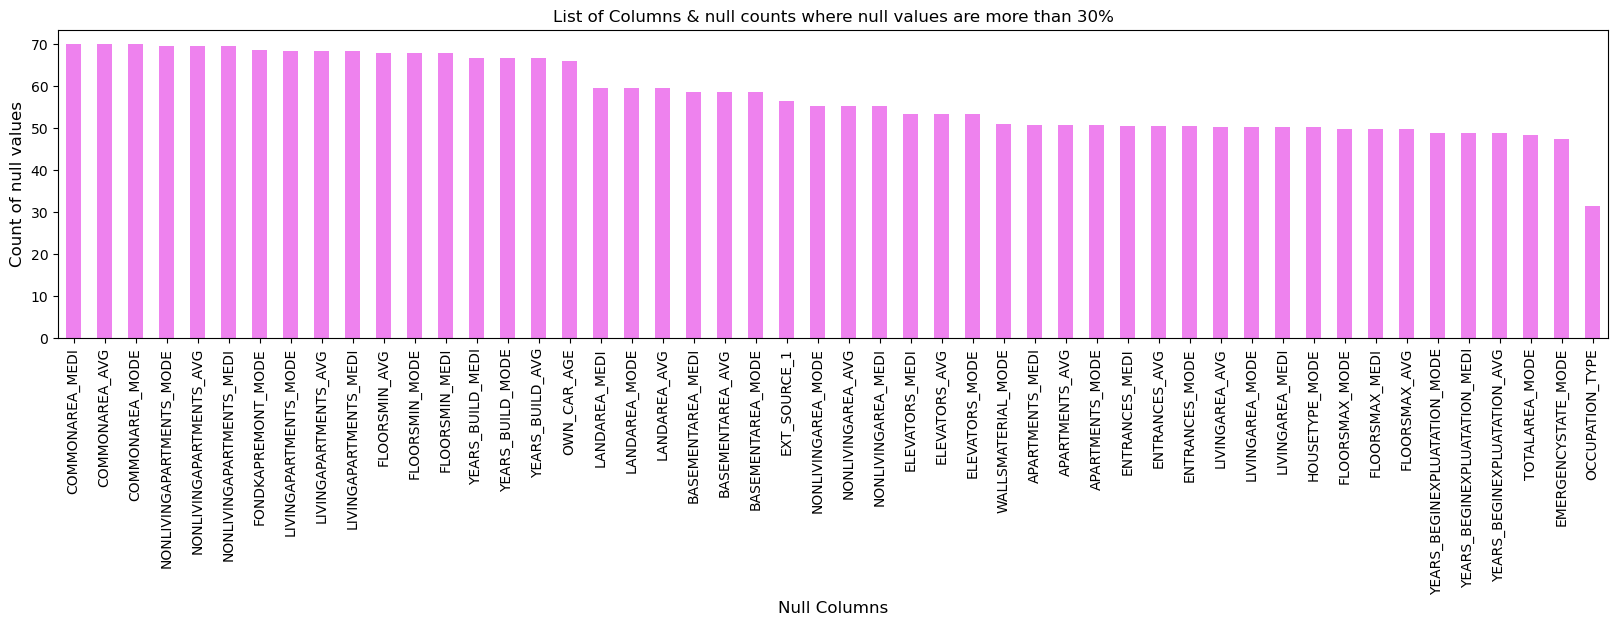

In [12]:
#Plotting Bar Graph for null values greater than 30%

plt.figure(figsize=(20,4))
null_values_30.plot(kind='bar', color="violet")                           
plt.title('List of Columns & null counts where null values are more than 30%') 

plt.xlabel("Null Columns",fontdict={"fontsize":12,"fontweight":5})            #Setting X-label and Y-label
plt.ylabel("Count of null values",fontdict={"fontsize":12,"fontweight":5})
plt.show()

***--- Based on the columns dictionary, it is evident that only 'OCCUPATION_TYPE' appears relevant. Consequently, a decision has been made to drop all other columns, focusing solely on 'OCCUPATION_TYPE' for further analysis.***

In [13]:
null_values_30.drop(["OCCUPATION_TYPE"], inplace = True)


In [14]:
null_values_30.index

Index(['COMMONAREA_MEDI', 'COMMONAREA_AVG', 'COMMONAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAPARTMENTS_MEDI', 'FONDKAPREMONT_MODE',
       'LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAPARTMENTS_MEDI', 'FLOORSMIN_AVG', 'FLOORSMIN_MODE',
       'FLOORSMIN_MEDI', 'YEARS_BUILD_MEDI', 'YEARS_BUILD_MODE',
       'YEARS_BUILD_AVG', 'OWN_CAR_AGE', 'LANDAREA_MEDI', 'LANDAREA_MODE',
       'LANDAREA_AVG', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_AVG',
       'BASEMENTAREA_MODE', 'EXT_SOURCE_1', 'NONLIVINGAREA_MODE',
       'NONLIVINGAREA_AVG', 'NONLIVINGAREA_MEDI', 'ELEVATORS_MEDI',
       'ELEVATORS_AVG', 'ELEVATORS_MODE', 'WALLSMATERIAL_MODE',
       'APARTMENTS_MEDI', 'APARTMENTS_AVG', 'APARTMENTS_MODE',
       'ENTRANCES_MEDI', 'ENTRANCES_AVG', 'ENTRANCES_MODE', 'LIVINGAREA_AVG',
       'LIVINGAREA_MODE', 'LIVINGAREA_MEDI', 'HOUSETYPE_MODE',
       'FLOORSMAX_MODE', 'FLOORSMAX_MEDI', 'FLOORSMAX_AVG',
       'YEARS_BEGINEXPLUATATI

***Removing Null Values Above 30% Threshold***

In [15]:
len(null_values_30)


49

In [16]:
df_appdata.drop(columns = null_values_30.index, inplace = True)

df_appdata.shape

(307511, 73)

***--- Following the removal of null values, a comprehensive examination of the percentage of null values in each column is imperative.***

***--- This step ensures a clear understanding of the data's completeness and sets the stage for subsequent analyses.***

In [17]:
null_values_0 = round (df_appdata.isnull().sum()/len(df_appdata)*100,2).sort_values(ascending = False)
null_values_0.head(20)


OCCUPATION_TYPE               31.35
EXT_SOURCE_3                  19.83
AMT_REQ_CREDIT_BUREAU_YEAR    13.50
AMT_REQ_CREDIT_BUREAU_QRT     13.50
AMT_REQ_CREDIT_BUREAU_MON     13.50
AMT_REQ_CREDIT_BUREAU_WEEK    13.50
AMT_REQ_CREDIT_BUREAU_DAY     13.50
AMT_REQ_CREDIT_BUREAU_HOUR    13.50
NAME_TYPE_SUITE                0.42
OBS_30_CNT_SOCIAL_CIRCLE       0.33
DEF_30_CNT_SOCIAL_CIRCLE       0.33
OBS_60_CNT_SOCIAL_CIRCLE       0.33
DEF_60_CNT_SOCIAL_CIRCLE       0.33
EXT_SOURCE_2                   0.21
AMT_GOODS_PRICE                0.09
FLAG_DOCUMENT_7                0.00
DAYS_LAST_PHONE_CHANGE         0.00
FLAG_DOCUMENT_2                0.00
FLAG_DOCUMENT_3                0.00
FLAG_DOCUMENT_4                0.00
dtype: float64

***--- Initiating with the normalized columns, EXT_SOURCE_3 and EXT_SOURCE_2, their relationship with the TARGET column will be explored through a correlation matrix.***

***--- This matrix provides a comprehensive overview of the linear relationships between these variables, aiding in the identification of potential associations and their strengths.***

In [18]:
correlation_matrix = df_appdata[['EXT_SOURCE_2', 'EXT_SOURCE_3', 'TARGET']].corr()
print(correlation_matrix)

              EXT_SOURCE_2  EXT_SOURCE_3    TARGET
EXT_SOURCE_2      1.000000      0.109167 -0.160472
EXT_SOURCE_3      0.109167      1.000000 -0.178919
TARGET           -0.160472     -0.178919  1.000000


***--- It is crucial to emphasize that correlation does not imply causation.***

***--- The coefficients derived from correlation measures solely capture linear relationships between variables.***

***--- The correlation values span from -1 to 1: -1 signifies a perfect negative linear relationship, 1 indicates a perfect positive linear relationship, and 0 denotes no linear relationship.***

***--- Upon examination, no discernible linear correlation is evident between the 'EXT_SOURCE_3' and 'EXT_SOURCE_2' columns with the 'TARGET' column.***

***--- Additionally, considering the column descriptions, a decision has been made to remove these columns from the analysis. It is crucial to reiterate that the absence of correlation does not imply causation, and this decision is based on the overall analysis context.***

In [19]:
df_appdata.drop('EXT_SOURCE_2', axis=1, inplace= True)
df_appdata.drop('EXT_SOURCE_3', axis=1, inplace= True)

In [20]:
df_appdata.shape

(307511, 71)

***--- To assess the relevance of columns with FLAGS and their association with the TARGET column, a dedicated dataframe comprising all FLAG columns will be created. Subsequently, bar graphs for each FLAG column with respect to the TARGET column will be plotted.***

***--- Here, "0" denotes Repayer, and "1" signifies Defaulter for clear interpretation. This visualization aids in identifying the potential significance of FLAG columns in relation to loan repayment behavior.***

In [21]:
df_appdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 71 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

***--- Aggregating FLAG Columns into a variable named "flag_col"***

In [22]:
flag_col = [col for col in df_appdata.columns if "FLAG" in col]
flag_col

['FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

***--- Creating a dataframe 'flag_df', with all FLAG columns and the TARGET column allows for an in-depth exploration of how the presence or absence of specific flags correlates with the client's payment behavior, as indicated by the TARGET variable.***

***--- The TARGET variable distinguishes between clients with payment difficulties (TARGET = 1) and those with no significant payment issues (TARGET = 0).***

***--- By comparing the FLAG columns with the TARGET column, the analysis aims to identify any patterns or associations between specific flags and the likelihood of payment difficulties, contributing to a comprehensive understanding of the risk factors in loan repayment***

In [23]:
flag_df = df_appdata[flag_col+["TARGET"]]

***--- In the "TARGET" column, the values 1 and 0 are replaced with more meaningful labels. 1 is replaced with "Defaulter," indicating clients with payment difficulties, and 0 is replaced with "Repayer," indicating clients with no significant payment issues.***

In [24]:
# Replacing "0" as repayer and "1" as defaulter for TARGET column

flag_df["TARGET"] = flag_df["TARGET"].replace({1:"Defaulter", 0:"Repayer"})

***--- For each column in flag_df (excluding the "TARGET" column), this loop iterates through the columns and replaces values 1 and 0 with "Y" and "N," respectively.***

***--- This is based on the assumption that the original values represented binary conditions, and using "Y" and "N" makes the data more interpretable, possibly reflecting the presence ("Y") or absence ("N") of certain flags or conditions.***

In [25]:
# As stated in columnn description replacing "1" as Y being TRUE and "0" as N being False

for i in flag_df:
    if i!= "TARGET":
        flag_df[i] = flag_df[i].replace({1:"Y", 0:"N"})

In [26]:
flag_df.head()

FLAG_OWN_CAR FLAG_OWN_REALTY FLAG_MOBIL FLAG_EMP_PHONE FLAG_WORK_PHONE  \
0            N               Y          Y              Y               N   
1            N               N          Y              Y               N   
2            Y               Y          Y              Y               Y   
3            N               Y          Y              Y               N   
4            N               Y          Y              Y               N   

  FLAG_CONT_MOBILE FLAG_PHONE FLAG_EMAIL FLAG_DOCUMENT_2 FLAG_DOCUMENT_3  ...  \
0                Y          Y          N               N               Y  ...   
1                Y          Y          N               N               Y  ...   
2                Y          Y          N               N               N  ...   
3                Y          N          N               N               Y  ...   
4                Y          N          N               N               N  ...   

  FLAG_DOCUMENT_13 FLAG_DOCUMENT_14 FLAG_DOCUMENT_15 FLAG_DOCUMENT_16  \
0                N                N                N                N   
1                N                N                N                N   
2                N                N                N                N   
3                N                N                N                N   
4                N                N                N                N   

  FLAG_DOCUMENT_17 FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20  \
0                N                N                N                N   
1                N                N                N                N   
2                N                N                N                N   
3                N                N                N                N   
4                N                N                N                N   

  FLAG_DOCUMENT_21     TARGET  
0                N  Defaulter  
1                N    Repayer  
2                N    Repayer  
3                N    Repayer  
4                N    Repayer  

[5 rows x 29 columns]

***--- The itertools module is imported in Python to provide a set of fast, memory-efficient tools for working with iterators (sequences). In the context of your code, itertools is used in conjunction with the zip_longest function to efficiently iterate over multiple iterables***

In [27]:
import itertools

***--- A set of count plots arranged in a grid to visually explore the distribution of different flags (flag_columns) concerning the target variable (TARGET) in the flag_df dataframe.***

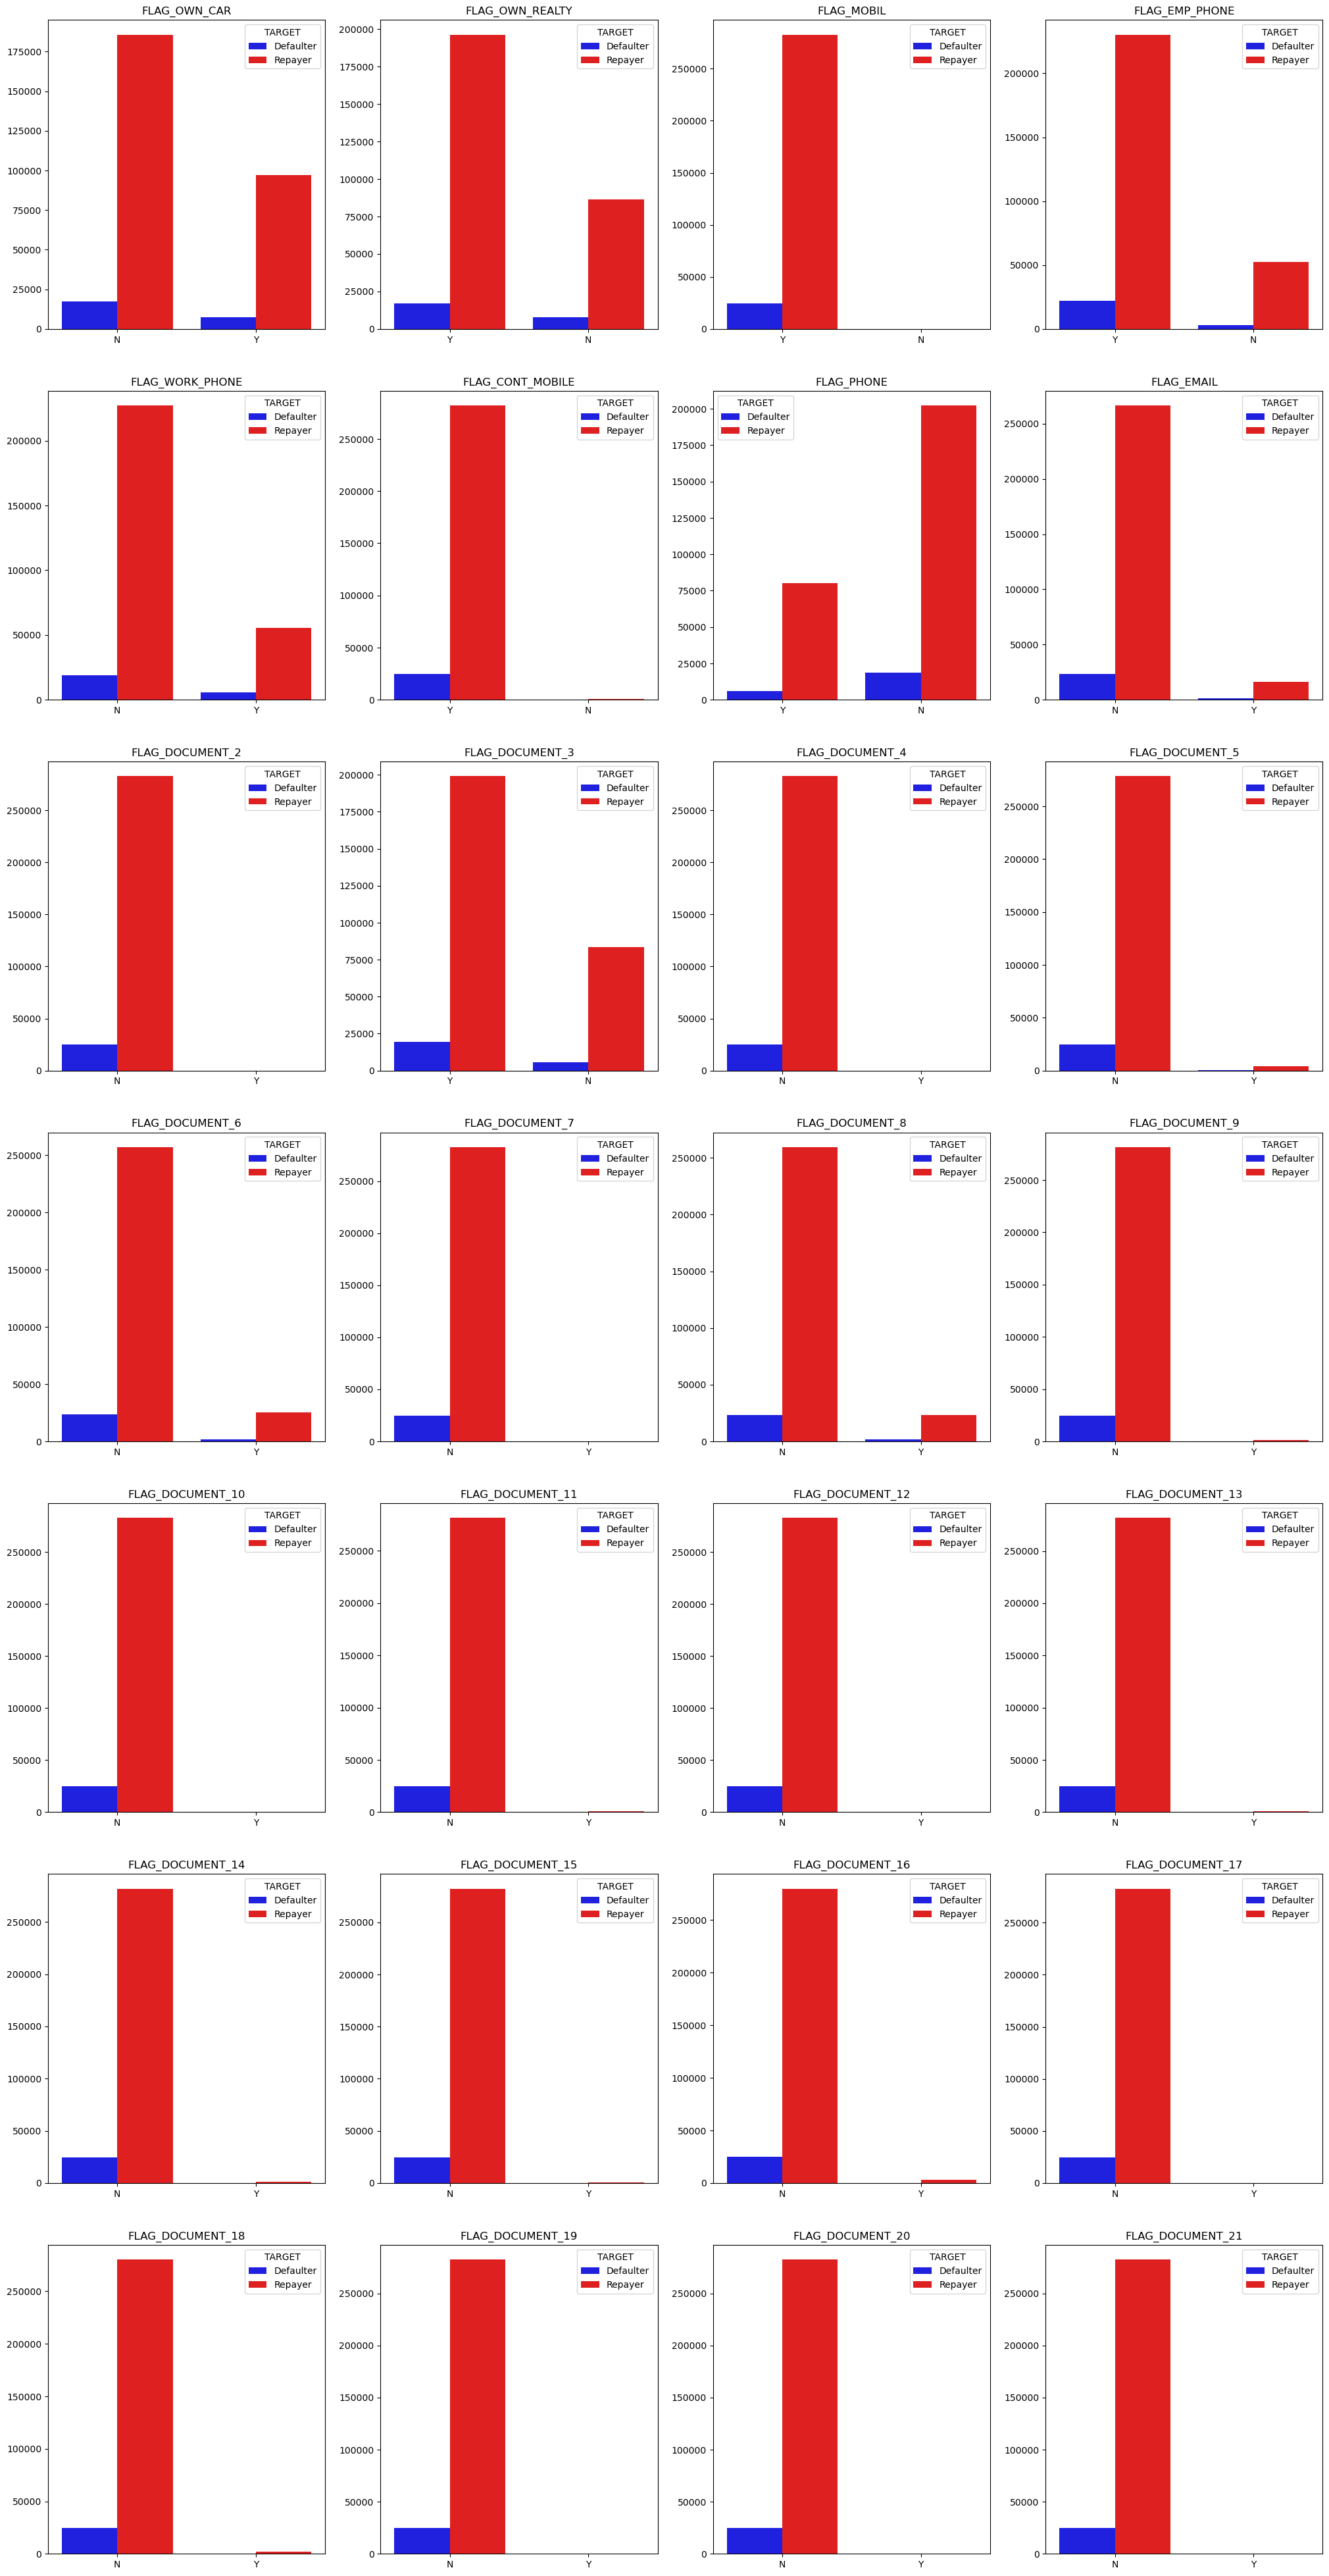

In [28]:
plt.figure(figsize=[25, 50])

for i, j in itertools.zip_longest(flag_col, range(len(flag_col))): #itertools.zip_longest :  to handle cases 
                                                                   # where flag_columns and range(len(flag_columns))
                                                                   # have unequal lengths.
    plt.subplot(7, 4, j + 1)
    sns.countplot(x=i, hue="TARGET", data=flag_df, palette=["b", "r"])
    plt.xlabel("")
    plt.ylabel("")
    plt.title(i)

***--- After assessing the distribution of repayers and defaulters across various FLAG columns, it is observed that columns such as FLAG_OWN_REALTY, FLAG_MOBIL, FLAG_EMP_PHONE, FLAG_CONT_MOBILE, and FLAG_DOCUMENT_3 exhibit a higher proportion of repayers compared to defaulters.***

***--- Consequently, for the sake of focused analysis, it is decided to retain only FLAG_DOCUMENT_3, FLAG_OWN_REALTY, and FLAG_MOBIL, considering them more relevant. All other FLAG columns will be excluded from further analysis.***

In [29]:
# Removing required columns from "flag_df" such that we can remove the irrelevent columns from "df_appdata".

flag_df.drop(["TARGET","FLAG_OWN_REALTY","FLAG_MOBIL","FLAG_DOCUMENT_3"], axis=1 , inplace = True)

In [30]:
len(flag_df.columns)

25

In [31]:
# Dropping the columns of "flag_df" dataframe that is removing more 25 columns from df_appdata.

df_appdata.drop(flag_df.columns, axis=1, inplace= True)

In [32]:
df_appdata.shape

(307511, 46)

***--- Standardizing values involves adjusting numerical data to a common scale.***

***--- This process facilitates comparisons and analyses by removing the scale differences among variables, promoting a standardized and consistent representation of the data.***

In [33]:
df_appdata.describe()


SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  ...  \
count               307511.000000  307511.000000  307511.000000  ...   
mean                     0.020868  -16036.995067   63815.045904  ...   
std                      0.013831    4363.988632  141275.766519  ...   
min                      0.000290  -25229.000000  -17912.000000  ...   
25%                      0.010006  -19682.000000   -2760.000000  ...   
50%                      0.018850  -15750.000000   -1213.000000  ...   
75%                      0.028663  -12413.000000    -289.000000  ...   
max                      0.072508   -7489.000000  365243.000000  ...   

       OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
count             306490.000000             306490.000000   
mean                   1.405292                  0.100049   
std                    2.379803                  0.362291   
min                    0.000000                  0.000000   
25%                    0.000000                  0.000000   
50%                    0.000000                  0.000000   
75%                    2.000000                  0.000000   
max                  344.000000                 24.000000   

       DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_3  AMT_REQ_CREDIT_BUREAU_HOUR  \
count           307510.000000    307511.000000               265992.000000   
mean              -962.858788         0.710023                    0.006402   
std                826.808487         0.453752                    0.083849   
min              -4292.000000         0.000000                    0.000000   
25%              -1570.000000         0.000000                    0.000000   
50%               -757.000000         1.000000                    0.000000   
75%               -274.000000         1.000000                    0.000000   
max                  0.000000         1.000000                    4.000000   

       AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
count              265992.000000               265992.000000   
mean                    0.007000                    0.034362   
std                     0.110757                    0.204685   
min                     0.000000                    0.000000   
25%                     0.000000                    0.000000   
50%                     0.000000                    0.000000   
75%                     0.000000                    0.000000   
max                     9.000000                    8.000000   

       AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
count              265992.000000              265992.000000   
mean                    0.267395                   0.265474   
std                     0.916002                   0.794056   
min                     0.000000                   0.000000   
25%                     0.000000                   0.000000   
50%     

***--- This code snippet addresses the issue of negative values in columns with a 'DAYS' prefix (e.g., DAYS_BIRTH, DAYS_EMPLOYED, etc.) by taking the absolute value of each value in these columns.***

***--- The loop iterates through the specified columns in days_columns and replaces the existing values with their absolute values, ensuring consistency and facilitating further analysis.***

In [34]:
# Creating "days_column" varibale to store all days columns

days_column = ["DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION", "DAYS_ID_PUBLISH", "DAYS_LAST_PHONE_CHANGE"]

In [35]:
# Using abs() function to correct the days values

df_appdata[days_column]= abs(df_appdata[days_column])

In [36]:
df_appdata[days_column].describe()

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
count  307511.000000  307511.000000      307511.000000    307511.000000   
mean    16036.995067   67724.742149        4986.120328      2994.202373   
std      4363.988632  139443.751806        3522.886321      1509.450419   
min      7489.000000       0.000000           0.000000         0.000000   
25%     12413.000000     933.000000        2010.000000      1720.000000   
50%     15750.000000    2219.000000        4504.000000      3254.000000   
75%     19682.000000    5707.000000        7479.500000      4299.000000   
max     25229.000000  365243.000000       24672.000000      7197.000000   

       DAYS_LAST_PHONE_CHANGE  
count           307510.000000  
mean               962.858788  
std                826.808487  
min                  0.000000  
25%                274.000000  
50%                757.000000  
75%               1570.000000  
max               4292.000000

***--- This code segment introduces an AGE_GROUP column by transforming DAYS_BIRTH into years and categorizing them into intervals to enhance clarity and facilitate analysis***

In [37]:
df_appdata.DAYS_BIRTH

0          9461
1         16765
2         19046
3         19005
4         19932
          ...  
307506     9327
307507    20775
307508    14966
307509    11961
307510    16856
Name: DAYS_BIRTH, Length: 307511, dtype: int64

In [38]:
df_appdata["AGE"] = df_appdata["DAYS_BIRTH"]/365
bins = [0,20,25,30,35,40,45,50,55,60,100]
slots = ["0-20","20-25","25-30","30-35","35-40","40-45","45-50","50-55","55-60","60 Above"]

df_appdata["AGE_GROUP"] = pd.cut(df_appdata["AGE"], bins=bins, labels=slots)

In [39]:
df_appdata["AGE_GROUP"].value_counts(normalize= True)*100

AGE_GROUP
35-40       13.940314
40-45       13.464884
30-35       12.825557
60 Above    11.569993
45-50       11.425608
50-55       11.362846
55-60       10.770346
25-30       10.686447
20-25        3.954005
0-20         0.000000
Name: proportion, dtype: float64

In [40]:
df_appdata.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  ...  \
count               307511.000000  307511.000000  307511.000000  ...   
mean                     0.020868   16036.995067   67724.742149  ...   
std                      0.013831    4363.988632  139443.751806  ...   
min                      0.000290    7489.000000       0.000000  ...   
25%                      0.010006   12413.000000     933.000000  ...   
50%                      0.018850   15750.000000    2219.000000  ...   
75%                      0.028663   19682.000000    5707.000000  ...   
max                      0.072508   25229.000000  365243.000000  ...   

       DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_3  \
count             306490.000000           307510.000000    307511.000000   
mean                   0.100049              962.858788         0.710023   
std                    0.362291              826.808487         0.453752   
min                    0.000000                0.000000         0.000000   
25%                    0.000000              274.000000         0.000000   
50%                    0.000000              757.000000         1.000000   
75%                    0.000000             1570.000000         1.000000   
max                   24.000000             4292.000000         1.000000   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000              265992.000000   
mean                     0.006402                   0.007000   
std                      0.083849                   0.110757   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               265992.000000              265992.000000   
mean                     0.034362                   0.267395   
std                      0.204685                   0.916002   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR            AGE  
count              265992.000000               265992.000000  307511.000000  
mean                    0.265474                    1.899974      43.936973  
std                     0.794056                    1.869295      11.956133  
min                     0.000000                    0.000000     

***--- To enhance comprehension and analysis, the numerical columns, namely AMT_INCOME_TOTAL, AMT_CREDIT, and AMT_GOODS_PRICE, with notably high values, will be transformed into categorical columns for improved clarity and interpretability***

In [41]:
df_appdata['AMT_INCOME_TOTAL']=df_appdata['AMT_INCOME_TOTAL']/100000

bins = [0,1,2,3,4,5,6,7,8,9,10,11]
slot = ['0-1L','1L-2L', '2L-3L','3L-4L','4L-5L','5L-6L','6L-7L','7L-8L','8L-9L','9L-10L','10L Above']

df_appdata['AMT_INCOME_RANGE']=pd.cut(df_appdata['AMT_INCOME_TOTAL'],bins,labels=slot)

In [42]:
round((df_appdata["AMT_INCOME_RANGE"].value_counts(normalize = True)*100),2)

AMT_INCOME_RANGE
1L-2L        50.73
2L-3L        21.21
0-1L         20.73
3L-4L         4.78
4L-5L         1.74
5L-6L         0.36
6L-7L         0.28
8L-9L         0.10
7L-8L         0.05
9L-10L        0.01
10L Above     0.01
Name: proportion, dtype: float64

In [43]:
# Creating bins for Credit amount in term of Lakhs
df_appdata['AMT_CREDIT']=df_appdata['AMT_CREDIT']/100000

bins = [0,1,2,3,4,5,6,7,8,9,10,100]
slots = ['0-1L','1L-2L', '2L-3L','3L-4L','4L-5L','5L-6L','6L-7L','7L-8L','8L-9L','9L-10L','10L Above']

df_appdata['AMT_CREDIT_RANGE']=pd.cut(df_appdata['AMT_CREDIT'],bins=bins,labels=slots)

In [44]:
round((df_appdata["AMT_CREDIT_RANGE"].value_counts(normalize = True)*100),2)

AMT_CREDIT_RANGE
2L-3L        17.82
10L Above    16.25
5L-6L        11.13
4L-5L        10.42
1L-2L         9.80
3L-4L         8.56
6L-7L         7.82
8L-9L         7.09
7L-8L         6.24
9L-10L        2.90
0-1L          1.95
Name: proportion, dtype: float64

In [45]:
# Creating bins for Price of Goods in term of Lakhs\

df_appdata['AMT_GOODS_PRICE']= df_appdata['AMT_GOODS_PRICE']/100000

bins = [0,1,2,3,4,5,6,7,8,9,10,100]
slots = ['0-1L','1L-2L', '2L-3L','3L-4L','4L-5L','5L-6L','6L-7L','7L-8L','8L-9L','9L-10L','10L Above']

df_appdata['AMT_GOODS_PRICE_RANGE']=pd.cut(df_appdata['AMT_GOODS_PRICE'],bins=bins,labels=slots)

In [46]:
round((df_appdata["AMT_GOODS_PRICE_RANGE"].value_counts(normalize = True)*100),2)

AMT_GOODS_PRICE_RANGE
2L-3L        20.43
4L-5L        18.54
6L-7L        13.03
10L Above    11.11
1L-2L        10.73
8L-9L         6.99
3L-4L         6.91
5L-6L         4.27
0-1L          2.83
7L-8L         2.64
9L-10L        2.53
Name: proportion, dtype: float64

***To gain clarity on null values in each column, checking the percentage of null values is a crucial step.***

In [47]:
null_values_1 = round (df_appdata.isnull().sum()/len(df_appdata)*100,2).sort_values(ascending = False)
null_values_1.head(20)

OCCUPATION_TYPE               31.35
AMT_REQ_CREDIT_BUREAU_HOUR    13.50
AMT_REQ_CREDIT_BUREAU_DAY     13.50
AMT_REQ_CREDIT_BUREAU_YEAR    13.50
AMT_REQ_CREDIT_BUREAU_QRT     13.50
AMT_REQ_CREDIT_BUREAU_MON     13.50
AMT_REQ_CREDIT_BUREAU_WEEK    13.50
NAME_TYPE_SUITE                0.42
OBS_30_CNT_SOCIAL_CIRCLE       0.33
DEF_30_CNT_SOCIAL_CIRCLE       0.33
OBS_60_CNT_SOCIAL_CIRCLE       0.33
DEF_60_CNT_SOCIAL_CIRCLE       0.33
AMT_GOODS_PRICE_RANGE          0.09
AMT_GOODS_PRICE                0.09
AMT_INCOME_RANGE               0.08
REG_REGION_NOT_LIVE_REGION     0.00
FLAG_DOCUMENT_3                0.00
DAYS_LAST_PHONE_CHANGE         0.00
AGE                            0.00
AGE_GROUP                      0.00
dtype: float64

In [48]:
df_appdata[["AMT_REQ_CREDIT_BUREAU_YEAR","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_WEEK",
"AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_HOUR"]].describe()

AMT_REQ_CREDIT_BUREAU_YEAR  AMT_REQ_CREDIT_BUREAU_QRT  \
count               265992.000000              265992.000000   
mean                     1.899974                   0.265474   
std                      1.869295                   0.794056   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      1.000000                   0.000000   
75%                      3.000000                   0.000000   
max                     25.000000                 261.000000   

       AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_WEEK  \
count              265992.000000               265992.000000   
mean                    0.267395                    0.034362   
std                     0.916002                    0.204685   
min                     0.000000                    0.000000   
25%                     0.000000                    0.000000   
50%                     0.000000                    0.000000   
75%                     0.000000                    0.000000   
max                    27.000000                    8.000000   

       AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_HOUR  
count              265992.000000               265992.000000  
mean                    0.007000                    0.006402  
std                     0.110757                    0.083849  
min                     0.000000                    0.000000  
25%                     0.000000                    0.000000  
50%                     0.000000                    0.000000  
75%                     0.000000                    0.000000  
max                     9.000000                    4.000000

In [49]:
AMT_CREDIT = ["AMT_REQ_CREDIT_BUREAU_YEAR","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_WEEK",
"AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_HOUR"]

In [50]:
# Filling missing values with median values

df_appdata.fillna(df_appdata[AMT_CREDIT].median(),inplace = True)

In [51]:
null_values_2 = (df_appdata.isnull().sum()/len(df_appdata)*100).sort_values(ascending = False).head(50)
null_values_2.head(10)

OCCUPATION_TYPE             31.345545
NAME_TYPE_SUITE              0.420148
OBS_30_CNT_SOCIAL_CIRCLE     0.332021
DEF_30_CNT_SOCIAL_CIRCLE     0.332021
OBS_60_CNT_SOCIAL_CIRCLE     0.332021
DEF_60_CNT_SOCIAL_CIRCLE     0.332021
AMT_GOODS_PRICE_RANGE        0.090403
AMT_GOODS_PRICE              0.090403
AMT_INCOME_RANGE             0.075444
AMT_ANNUITY                  0.003902
dtype: float64

***--- Now, Addressing null values within the 'OCCUPATION_TYPE' column involves implementing a strategy to handle missing data in the context of occupation information, ensuring a comprehensive and accurate dataset***

In [52]:
df_appdata.ORGANIZATION_TYPE.value_counts()

ORGANIZATION_TYPE
Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7      

In [53]:
# Imputing null values with "Unknown"

df_appdata["OCCUPATION_TYPE"] = df_appdata["OCCUPATION_TYPE"].fillna("Unknown")

In [54]:
df_appdata["OCCUPATION_TYPE"].isnull().sum() # Now we have zero null values 

0

***Creating a tree map visualization for the 'OCCUPATION_TYPE' column to explore and analyze the distribution of different occupations, providing a visual insight into the dataset's occupational diversity.***

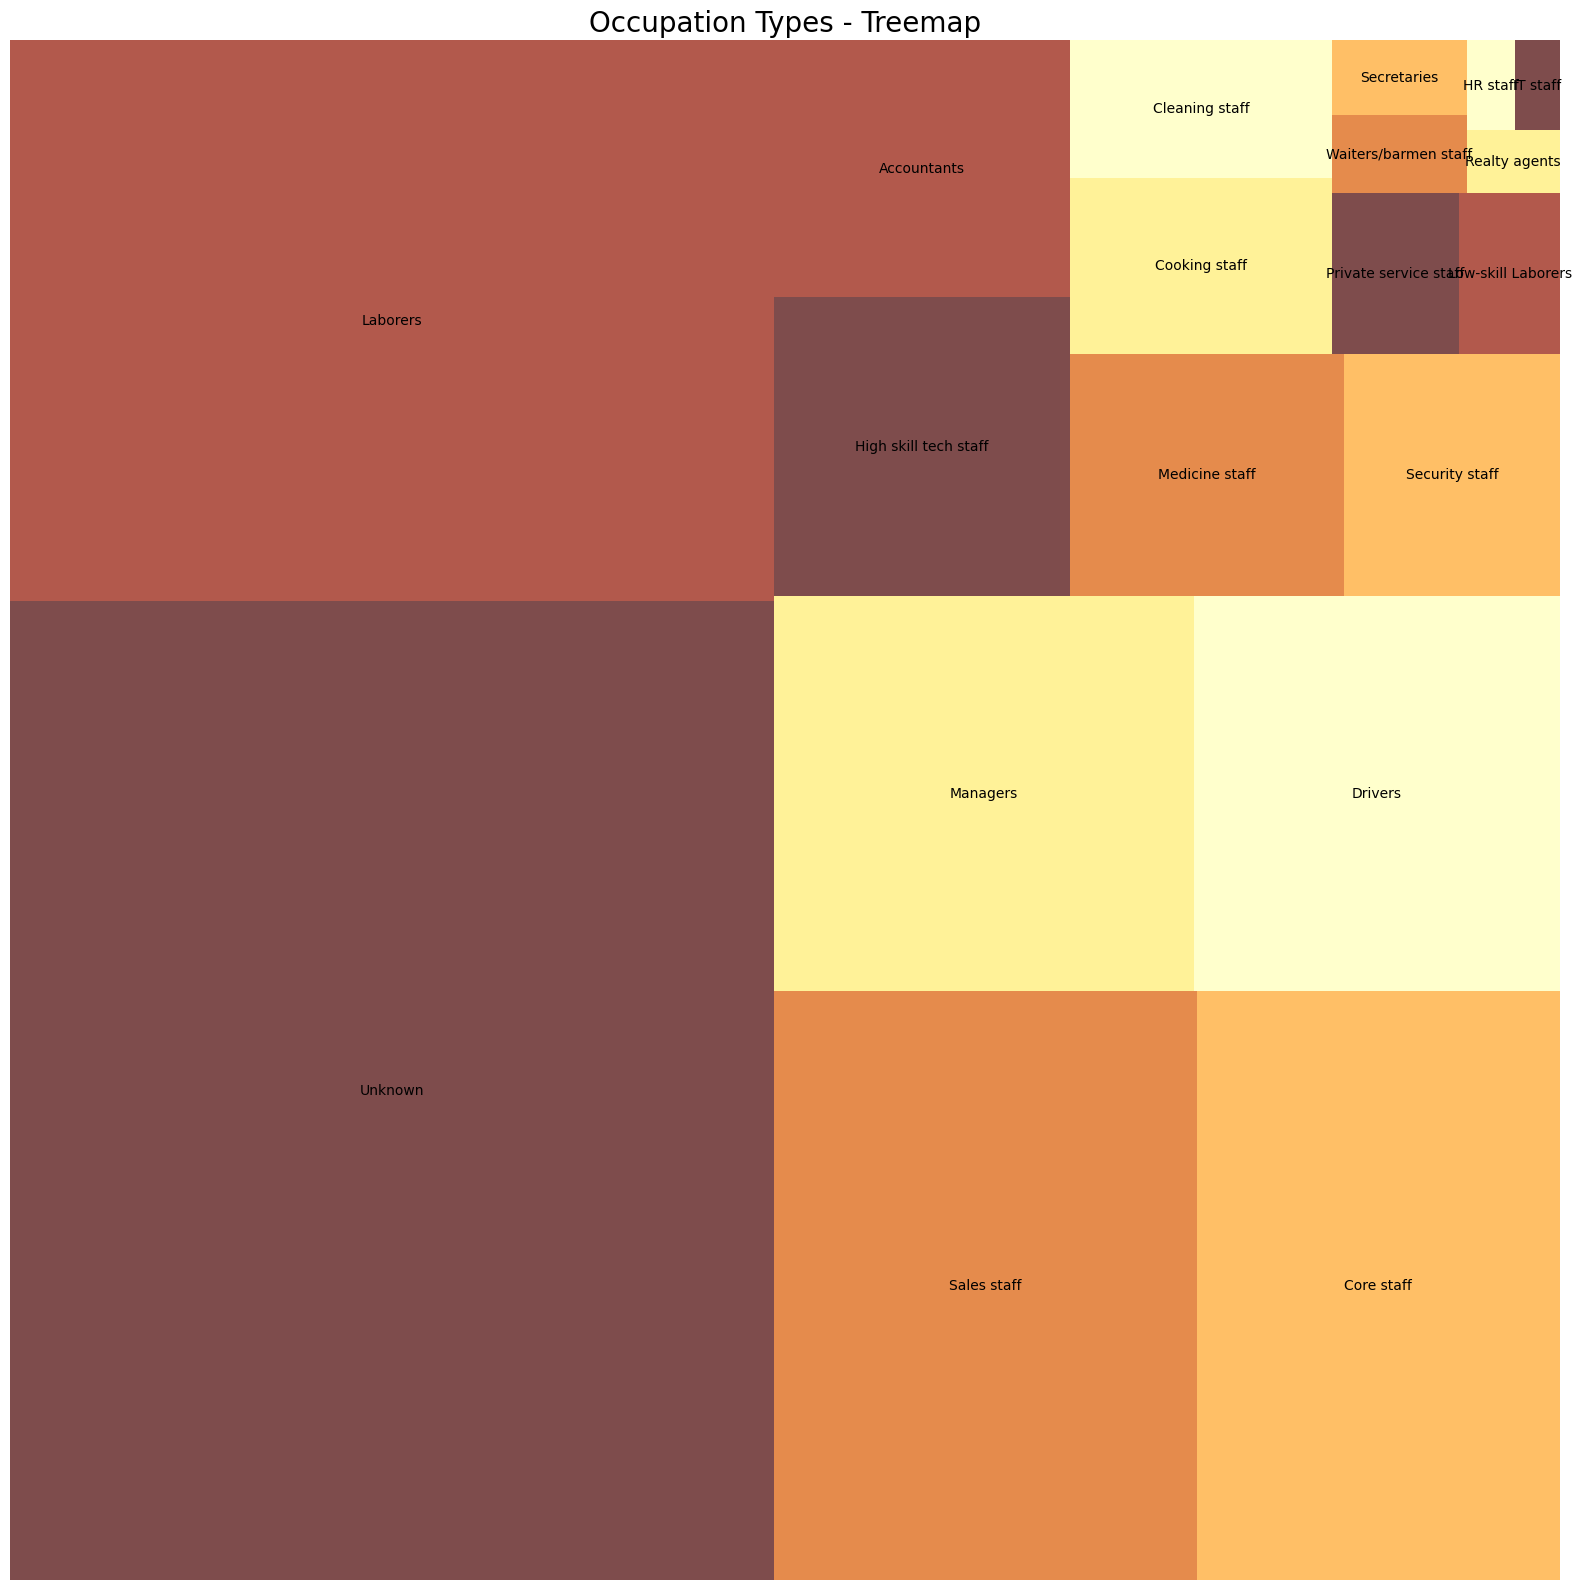

In [55]:
import squarify

plt.figure(figsize=[20, 20])
sizes = df_appdata['OCCUPATION_TYPE'].value_counts()
squarify.plot(sizes=sizes, label=sizes.index, color=sns.color_palette('afmhot'), alpha=0.7)
plt.title("Occupation Types - Treemap", fontsize=20)
plt.axis('off')
plt.show()

***--- The majority of values, constituting the highest percentage, are attributed to the 'Unknown' group, followed by the 'Laborers' group as the second-highest category***

In [56]:
df_appdata.CODE_GENDER.value_counts()

CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64

In [57]:
df_appdata.loc[df_appdata.CODE_GENDER == 'XNA','CODE_GENDER'] = 'F' 
df_appdata.CODE_GENDER.value_counts()

CODE_GENDER
F    202452
M    105059
Name: count, dtype: int64

In [58]:
#Again checking the datatypes for all the columns and change them accordingly.

df_appdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 51 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   FLAG_OWN_REALTY              307511 non-null  object  
 5   CNT_CHILDREN                 307511 non-null  int64   
 6   AMT_INCOME_TOTAL             307511 non-null  float64 
 7   AMT_CREDIT                   307511 non-null  float64 
 8   AMT_ANNUITY                  307499 non-null  float64 
 9   AMT_GOODS_PRICE              307233 non-null  float64 
 10  NAME_TYPE_SUITE              306219 non-null  object  
 11  NAME_INCOME_TYPE             307511 non-null  object  
 12  NAME_EDUCATION_TYPE          307511 non-null

In [59]:
df_appdata['NAME_CONTRACT_TYPE'] = df_appdata['NAME_CONTRACT_TYPE'].astype('category')
df_appdata['CODE_GENDER'] = df_appdata['CODE_GENDER'].astype('category')
df_appdata['NAME_TYPE_SUITE'] = df_appdata['NAME_TYPE_SUITE'].astype('category')
df_appdata['NAME_INCOME_TYPE'] = df_appdata['NAME_INCOME_TYPE'].astype('category')
df_appdata['NAME_EDUCATION_TYPE'] = df_appdata['NAME_EDUCATION_TYPE'].astype('category')
df_appdata['NAME_FAMILY_STATUS'] = df_appdata['NAME_FAMILY_STATUS'].astype('category')
df_appdata['NAME_HOUSING_TYPE'] = df_appdata['NAME_HOUSING_TYPE'].astype('category')
df_appdata['OCCUPATION_TYPE'] = df_appdata['OCCUPATION_TYPE'].astype('category')
df_appdata['WEEKDAY_APPR_PROCESS_START'] = df_appdata['WEEKDAY_APPR_PROCESS_START'].astype('category')
df_appdata['ORGANIZATION_TYPE'] = df_appdata['ORGANIZATION_TYPE'].astype('category')

In [60]:
df_appdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 51 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  category
 3   CODE_GENDER                  307511 non-null  category
 4   FLAG_OWN_REALTY              307511 non-null  object  
 5   CNT_CHILDREN                 307511 non-null  int64   
 6   AMT_INCOME_TOTAL             307511 non-null  float64 
 7   AMT_CREDIT                   307511 non-null  float64 
 8   AMT_ANNUITY                  307499 non-null  float64 
 9   AMT_GOODS_PRICE              307233 non-null  float64 
 10  NAME_TYPE_SUITE              306219 non-null  category
 11  NAME_INCOME_TYPE             307511 non-null  category
 12  NAME_EDUCATION_TYPE          307511 non-null

# Exploring Outliers:

***--- Conducting an examination of outliers within the dataset to identify and comprehend instances of data points that significantly deviate from the expected patterns, aiding in a comprehensive understanding of data distribution and potential anomalies.***

In [61]:
# This code identifies and collects the names of numerical columns in the DataFrame (df_appdata) using the select_dtypes method.
# The resulting variable numerical_col holds the names of these numerical columns.

numerical_col = df_appdata.select_dtypes(include='number').columns

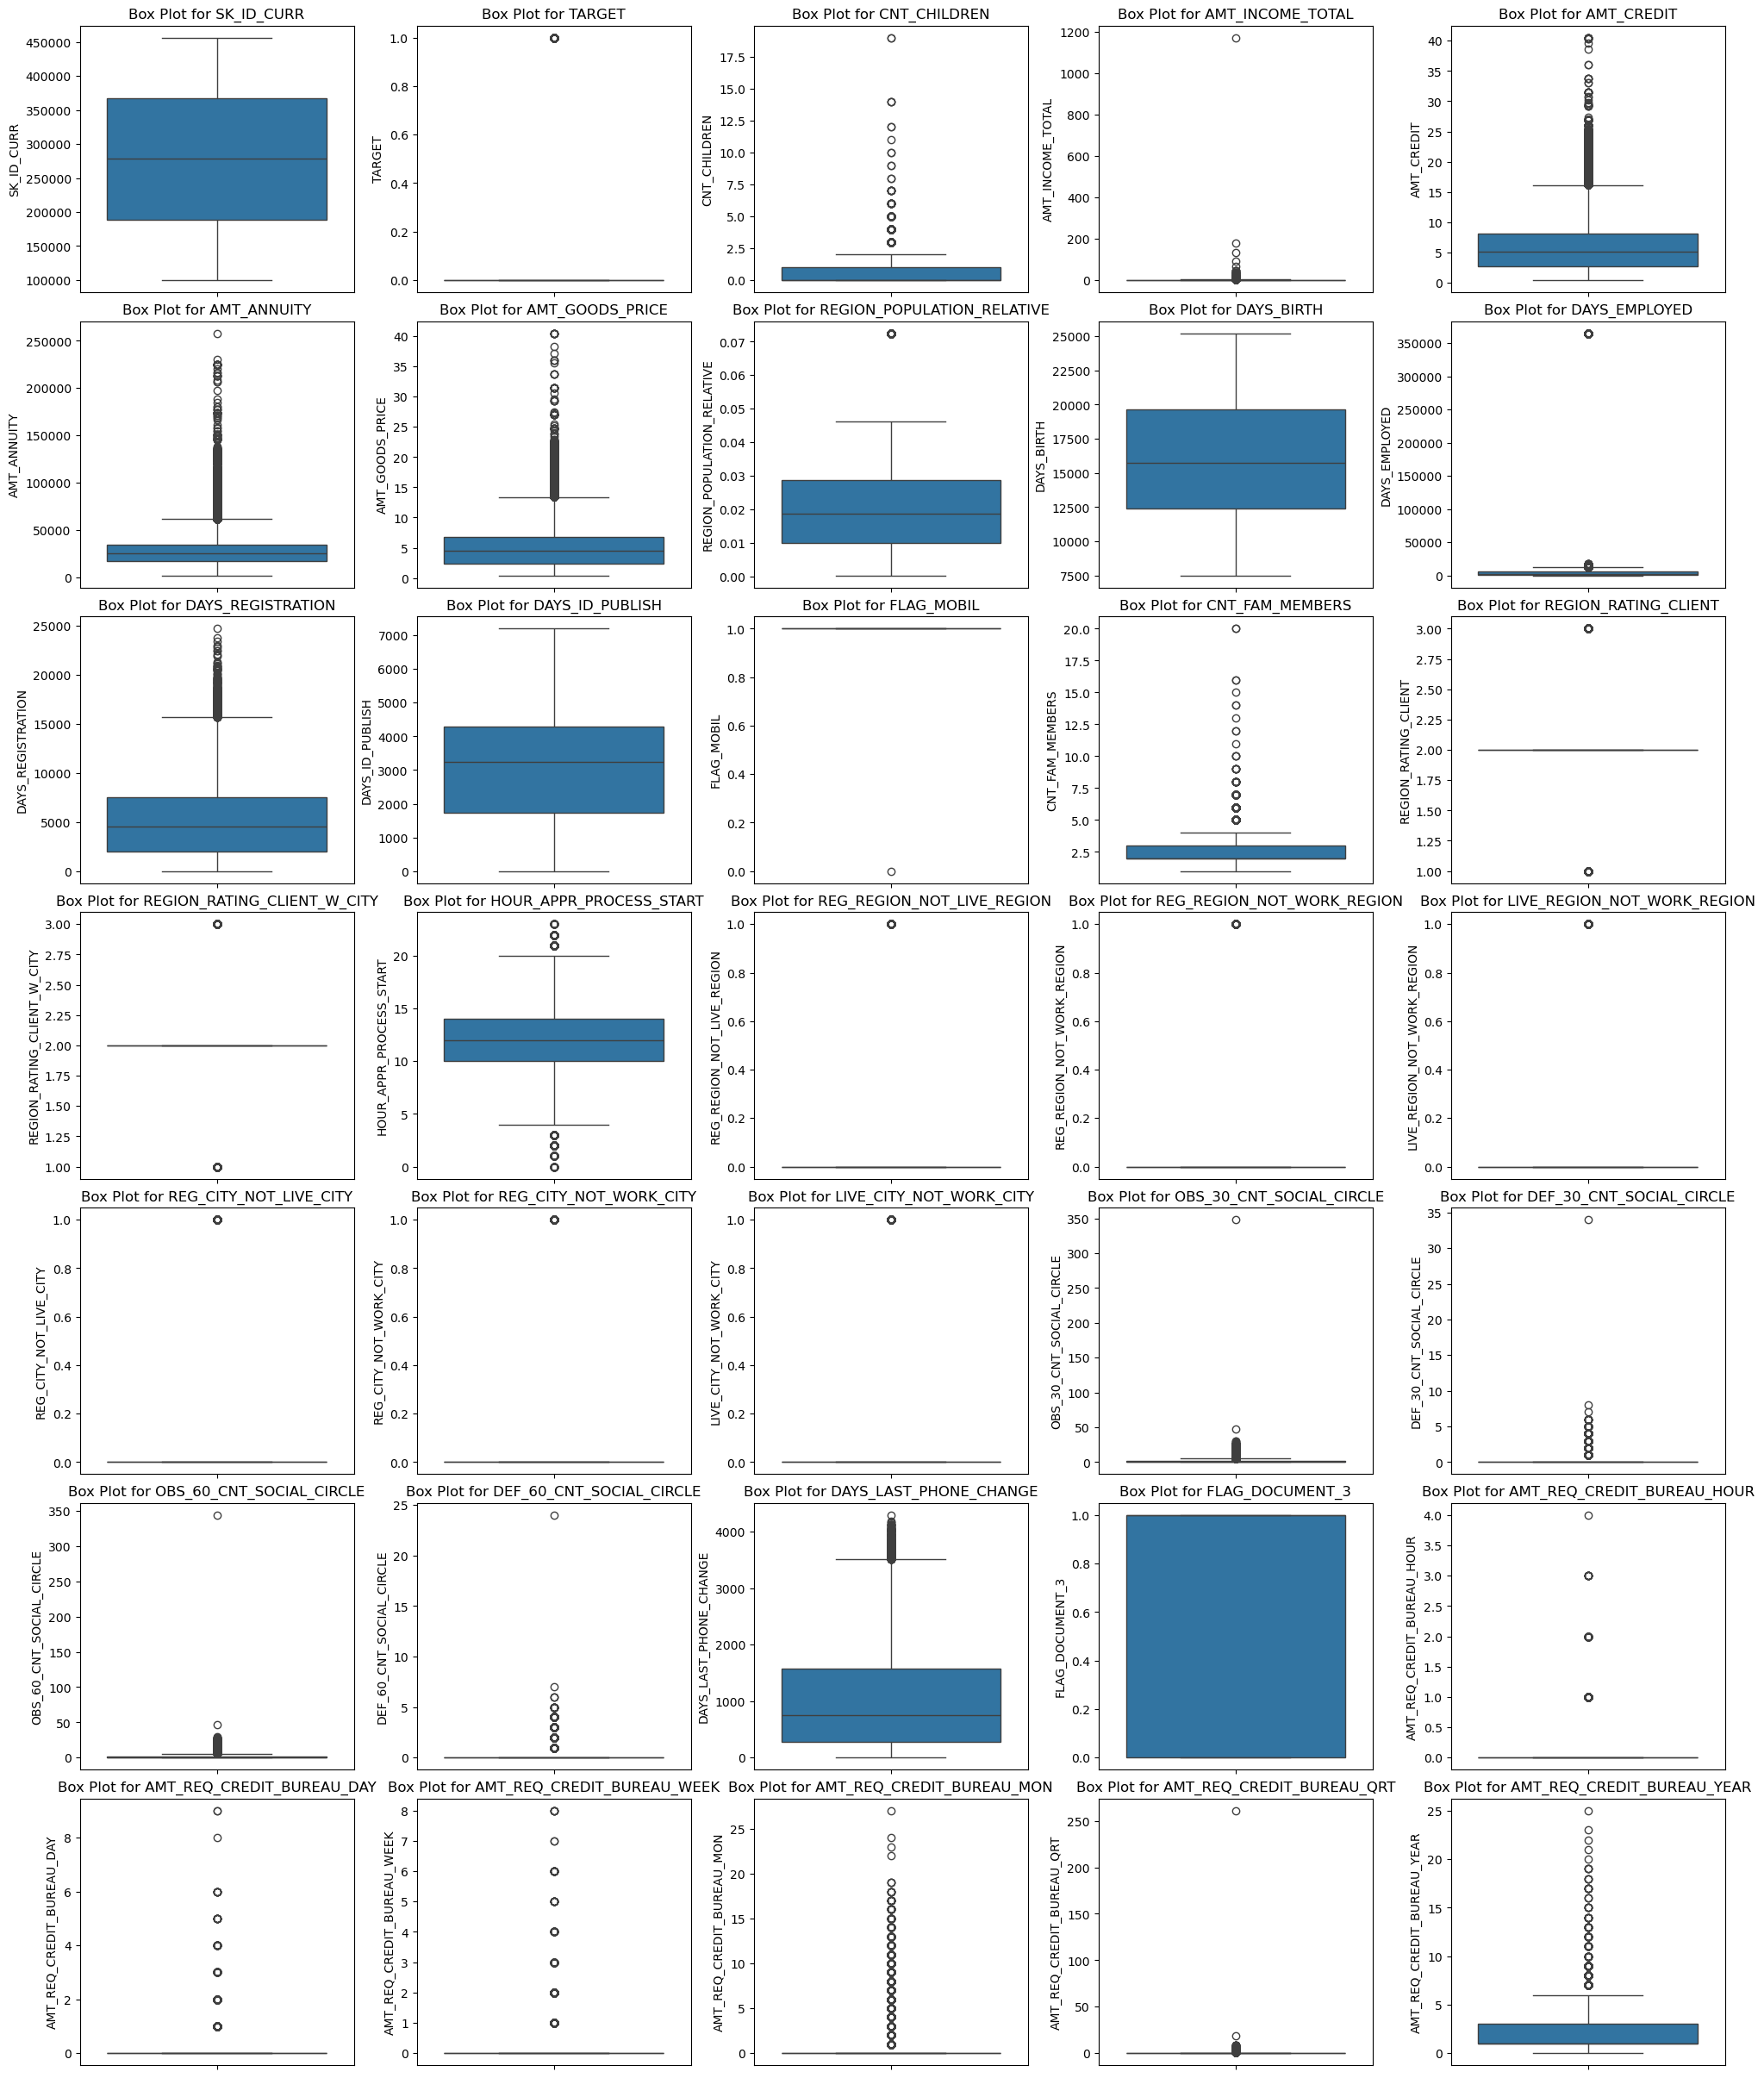

In [62]:
# Exploring Numerical Column Distributions:

# Utilizing Box Plots to Identify and Analyze Outliers for a Comprehensive Overview of Each Numerical Feature in the Dataset.

fig, axes = plt.subplots(nrows=7, ncols=5, figsize=(20, 24), constrained_layout=True)  # Adjust figsize
fig.subplots_adjust(left=0, bottom=0, right=3, top=12, wspace=0.09, hspace=0.3)

for ax, column in zip(axes.flatten(), numerical_col):
    sns.boxplot(df_appdata[column], ax=ax)
    ax.set(title=f'Box Plot for {column}', xlabel='')  # You can adjust title and xlabel
    ax.tick_params(axis='x', labelrotation=45)  # Rotate x-axis labels for better visibility

plt.show()

***--- Each box plot provides a summary of the distribution, central tendency, and potential outliers for its corresponding numerical column.***

***--- This comprehensive arrangement allows for a quick and systematic overview of the distribution characteristics across multiple numerical features in the dataset.***

# Suggestion to Handle Outliers in Data Analysis:



***Imputation:***

***--- Replace outliers with a suitable value like mean, median, or model-predicted values.***

***Capping or Flooring:***

***--- Set thresholds to limit extreme values and reduce their impact on statistical analyses.***

***Removing Outliers:***

***--- Consider outright removal if outliers are errors or anomalies significantly impacting analysis.***

***Binning:***

***--- Convert numerical variables to categorical ones, grouping extreme values.***

***--- In the process of handling outliers, it is crucial to carefully evaluate their impact on data integrity and the validity of subsequent analyses.***

***--- By implementing appropriate outlier handling techniques, we aim to enhance overall data quality, fortify the robustness of our analytical approaches, and ultimately foster more reliable insights from the dataset.***

***--- This strategic approach ensures that outliers are addressed in a manner that aligns with the broader objectives of data analysis and interpretation.***

# Exploring the Second Dataset:

In [63]:
df_appdata_pre.shape

(1670214, 37)

In [64]:
df_appdata_pre.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       ...  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  SELLERPLACE_AREA  \
count  ...               5951.000000   1.670214e+06      1.670214e+06   
mean   ...                  0.773503  -8.806797e+02      3.139511e+02   
std    ...                  0.100879   7.790997e+02      7.127443e+03   
min    ...                  0.373150  -2.922000e+03     -1.000000e+00   
25%    ...                  0.715645  -1.300000e+03     -1.000000e+00   
50%    ...                  0.835095  -5.810000e+02      3.000000e+00   
75%    ...                  0.852537  -2.800000e+02      8.200000e+01   
max    ...                  1.000000  -1.000000e+00      4.000000e+06   

        CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count  1.297984e+06       997149.000000   997149.000000   
mean   1.605408e+01       342209.855039    13826.269337   
std    1.456729e+01        88916.115834    72444.869708   
min    0.000000e+00        -2922.000000    -2892.000000   
25%    6.000000e+00       365243.000000    -1628.000000   
50%    1.200000e+01       365243.000000     -831.000000   
75%    2.400000e+01       365243.000000     -411.000000   
max    8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.000000  
50%                     0.000000  
75%                     1.000000  
max                     1.000000  

[8 rows x 21 columns]

***Assessing Null Values in the Dataset:***

In [65]:
null_values_3 = round(df_appdata_pre.isnull().sum()/len(df_appdata_pre)*100,2).sort_values(ascending = False)
null_values_3.head(20)

RATE_INTEREST_PRIVILEGED     99.64
RATE_INTEREST_PRIMARY        99.64
RATE_DOWN_PAYMENT            53.64
AMT_DOWN_PAYMENT             53.64
NAME_TYPE_SUITE              49.12
NFLAG_INSURED_ON_APPROVAL    40.30
DAYS_FIRST_DRAWING           40.30
DAYS_FIRST_DUE               40.30
DAYS_LAST_DUE_1ST_VERSION    40.30
DAYS_LAST_DUE                40.30
DAYS_TERMINATION             40.30
AMT_GOODS_PRICE              23.08
AMT_ANNUITY                  22.29
CNT_PAYMENT                  22.29
PRODUCT_COMBINATION           0.02
CHANNEL_TYPE                  0.00
NAME_PRODUCT_TYPE             0.00
NAME_YIELD_GROUP              0.00
SELLERPLACE_AREA              0.00
NAME_SELLER_INDUSTRY          0.00
dtype: float64

***Treating Null Values with Mean:***

***--- In this process, missing values within the dataset are addressed by replacing them with the mean value of the respective columns.***

***--- This method is employed to fill gaps in the data, ensuring a more complete dataset for subsequent analyses.***

In [66]:
null_values_3.mean()

17.977297297297298

***Exploring Null Values Exceeding 15% Threshold***

In [67]:
pre_15 = null_values_3[null_values_3 > 15]
pre_15

RATE_INTEREST_PRIVILEGED     99.64
RATE_INTEREST_PRIMARY        99.64
RATE_DOWN_PAYMENT            53.64
AMT_DOWN_PAYMENT             53.64
NAME_TYPE_SUITE              49.12
NFLAG_INSURED_ON_APPROVAL    40.30
DAYS_FIRST_DRAWING           40.30
DAYS_FIRST_DUE               40.30
DAYS_LAST_DUE_1ST_VERSION    40.30
DAYS_LAST_DUE                40.30
DAYS_TERMINATION             40.30
AMT_GOODS_PRICE              23.08
AMT_ANNUITY                  22.29
CNT_PAYMENT                  22.29
dtype: float64

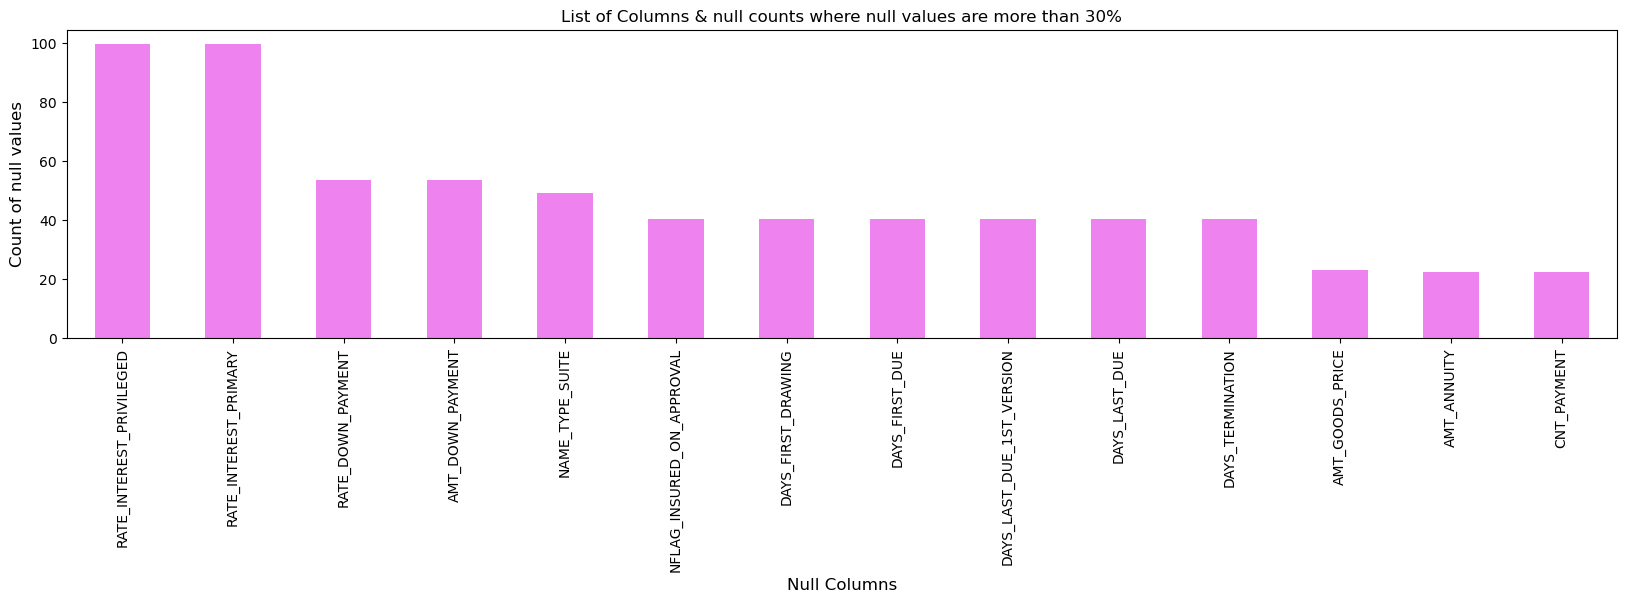

In [68]:
# Plotting Bar Graph for null values greater than 15%

plt.figure(figsize=(20,4))
pre_15.plot(kind='bar', color="violet")                           
plt.title('List of Columns & null counts where null values are more than 30%') 

plt.xlabel("Null Columns",fontdict={"fontsize":12,"fontweight":5})                  #Setting X-label and Y-label
plt.ylabel("Count of null values",fontdict={"fontsize":12,"fontweight":5})
plt.show()

In [69]:
pre_15.index

Index(['RATE_INTEREST_PRIVILEGED', 'RATE_INTEREST_PRIMARY',
       'RATE_DOWN_PAYMENT', 'AMT_DOWN_PAYMENT', 'NAME_TYPE_SUITE',
       'NFLAG_INSURED_ON_APPROVAL', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'AMT_GOODS_PRICE', 'AMT_ANNUITY', 'CNT_PAYMENT'],
      dtype='object')

***Dropping Columns with Null Values Exceeding 15% for Enhanced Analysis***

In [70]:
df_appdata_pre.drop(columns = pre_15.index, inplace = True)

In [71]:
round(df_appdata_pre.isnull().sum()/len(df_appdata_pre)*100,2).sort_values(ascending = False)

PRODUCT_COMBINATION            0.02
NAME_PAYMENT_TYPE              0.00
NAME_YIELD_GROUP               0.00
NAME_SELLER_INDUSTRY           0.00
SELLERPLACE_AREA               0.00
CHANNEL_TYPE                   0.00
NAME_PRODUCT_TYPE              0.00
NAME_PORTFOLIO                 0.00
NAME_GOODS_CATEGORY            0.00
NAME_CLIENT_TYPE               0.00
CODE_REJECT_REASON             0.00
SK_ID_PREV                     0.00
SK_ID_CURR                     0.00
NAME_CONTRACT_STATUS           0.00
NAME_CASH_LOAN_PURPOSE         0.00
NFLAG_LAST_APPL_IN_DAY         0.00
FLAG_LAST_APPL_PER_CONTRACT    0.00
HOUR_APPR_PROCESS_START        0.00
WEEKDAY_APPR_PROCESS_START     0.00
AMT_CREDIT                     0.00
AMT_APPLICATION                0.00
NAME_CONTRACT_TYPE             0.00
DAYS_DECISION                  0.00
dtype: float64

***Standardizing the Previous Application Dataset***

In [72]:
df_appdata_pre.describe()

SK_ID_PREV    SK_ID_CURR  AMT_APPLICATION    AMT_CREDIT  \
count  1.670214e+06  1.670214e+06     1.670214e+06  1.670213e+06   
mean   1.923089e+06  2.783572e+05     1.752339e+05  1.961140e+05   
std    5.325980e+05  1.028148e+05     2.927798e+05  3.185746e+05   
min    1.000001e+06  1.000010e+05     0.000000e+00  0.000000e+00   
25%    1.461857e+06  1.893290e+05     1.872000e+04  2.416050e+04   
50%    1.923110e+06  2.787145e+05     7.104600e+04  8.054100e+04   
75%    2.384280e+06  3.675140e+05     1.803600e+05  2.164185e+05   
max    2.845382e+06  4.562550e+05     6.905160e+06  6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  DAYS_DECISION  \
count             1.670214e+06            1.670214e+06   1.670214e+06   
mean              1.248418e+01            9.964675e-01  -8.806797e+02   
std               3.334028e+00            5.932963e-02   7.790997e+02   
min               0.000000e+00            0.000000e+00  -2.922000e+03   
25%               1.000000e+01            1.000000e+00  -1.300000e+03   
50%               1.200000e+01            1.000000e+00  -5.810000e+02   
75%               1.500000e+01            1.000000e+00  -2.800000e+02   
max               2.300000e+01            1.000000e+00  -1.000000e+00   

       SELLERPLACE_AREA  
count      1.670214e+06  
mean       3.139511e+02  
std        7.127443e+03  
min       -1.000000e+00  
25%       -1.000000e+00  
50%        3.000000e+00  
75%        8.200000e+01  
max        4.000000e+06

***--- To address the presence of negative values in the "Days" variable, a new variable named "pre_days_col" is created.***

***--- The absolute function (abs) is applied to transform negative days into positive days, facilitating consistent and meaningful analysis.***

In [73]:
pre_days_col = ['DAYS_DECISION']

In [74]:
# Converting Negative Days to Positive Using Absolute Value

df_appdata_pre[pre_days_col] = abs(df_appdata_pre[pre_days_col])
df_appdata_pre[pre_days_col].describe()

DAYS_DECISION
count   1.670214e+06
mean    8.806797e+02
std     7.790997e+02
min     1.000000e+00
25%     2.800000e+02
50%     5.810000e+02
75%     1.300000e+03
max     2.922000e+03

# Exploring Outliers in the Previous Application Dataset

In [75]:
df_appdata_pre.describe()

SK_ID_PREV    SK_ID_CURR  AMT_APPLICATION    AMT_CREDIT  \
count  1.670214e+06  1.670214e+06     1.670214e+06  1.670213e+06   
mean   1.923089e+06  2.783572e+05     1.752339e+05  1.961140e+05   
std    5.325980e+05  1.028148e+05     2.927798e+05  3.185746e+05   
min    1.000001e+06  1.000010e+05     0.000000e+00  0.000000e+00   
25%    1.461857e+06  1.893290e+05     1.872000e+04  2.416050e+04   
50%    1.923110e+06  2.787145e+05     7.104600e+04  8.054100e+04   
75%    2.384280e+06  3.675140e+05     1.803600e+05  2.164185e+05   
max    2.845382e+06  4.562550e+05     6.905160e+06  6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  DAYS_DECISION  \
count             1.670214e+06            1.670214e+06   1.670214e+06   
mean              1.248418e+01            9.964675e-01   8.806797e+02   
std               3.334028e+00            5.932963e-02   7.790997e+02   
min               0.000000e+00            0.000000e+00   1.000000e+00   
25%               1.000000e+01            1.000000e+00   2.800000e+02   
50%               1.200000e+01            1.000000e+00   5.810000e+02   
75%               1.500000e+01            1.000000e+00   1.300000e+03   
max               2.300000e+01            1.000000e+00   2.922000e+03   

       SELLERPLACE_AREA  
count      1.670214e+06  
mean       3.139511e+02  
std        7.127443e+03  
min       -1.000000e+00  
25%       -1.000000e+00  
50%        3.000000e+00  
75%        8.200000e+01  
max        4.000000e+06

***Examining outliers involves assessing extreme values in the dataset.***

***--- By considering both the maximum value and the 75th percentile, we gain insights into the data's upper range and the central tendency of the majority of observations.***

***--- This dual perspective allows for a comprehensive understanding of potential outliers and aids in robust data analysis.***

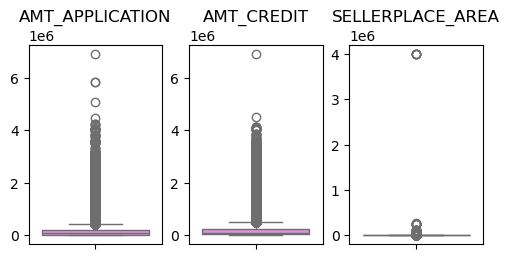

In [76]:
# Box Plot Analysis of Selected Columns

pre_outlier_col = ['AMT_APPLICATION','AMT_CREDIT','SELLERPLACE_AREA']

plt.figure(figsize=[10,15])
for i,j in itertools.zip_longest(pre_outlier_col, range(len(pre_outlier_col))):
    plt.subplot(5,5,j+1)
    sns.boxplot(y = df_appdata_pre[i], orient = "h", color = "violet")
    #plt.yticks(fontsize=8)
    plt.xlabel("")
    plt.ylabel("")
    plt.title(i)

***Strategies for Treating Outliers in Selected Columns:***

***--- One approach is to consider the nature of the data and apply a suitable transformation, such as log transformation, to reduce the impact of extreme values.***

***--- Another effective method is to impute outliers with more representative values, either through statistical measures like the median or by leveraging machine learning models for more sophisticated imputations.***

***--- The choice of strategy depends on the specific characteristics of the data and the objectives of the analysis.***

# Commencing Data Analysis: Post Data Cleaning and Outlier Assessment

***Exploring Data Imbalance: A Comprehensive Analysis***

***--- Checking for data imbalance is vital for model performance, accuracy, and decision-making confidence.***

***--- It ensures fair representation of classes, mitigates biases, and optimizes the learning process for more reliable predictions.***

In [77]:
Target0 = df_appdata.loc[df_appdata["TARGET"]==0]

#  It creates a new dataframe called Target0 containing only those rows where the target variable is 0, 
#  indicating clients who are classified as repayers.

In [78]:
Target1 = df_appdata.loc[df_appdata["TARGET"]==1]

# It creates a new dataframe called Target1 containing only those rows where the target variable is 1,
# indicating clients who are classified as defaulters.

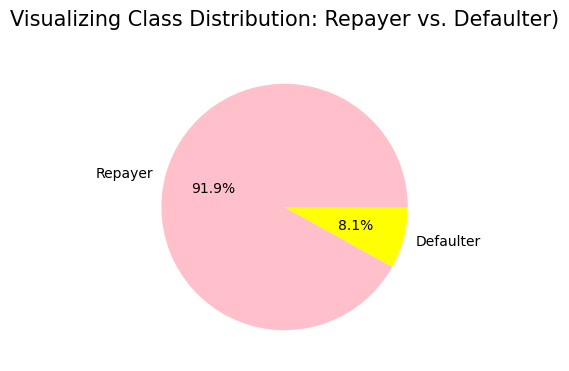

In [79]:
# Pie Chart Analysis: Uncovering Class Imbalance

plt.figure(figsize=[4, 4])
plt.pie(df_appdata["TARGET"].value_counts(), labels=["Repayer", "Defaulter"], autopct='%1.1f%%', colors=["pink", "yellow"])
plt.title("Visualizing Class Distribution: Repayer vs. Defaulter)", fontdict={"fontsize": 15}, pad=20)
plt.show()

***--- The defaulted population accounts for 8.1%, contrasting with the predominant non-defaulted population at 91.9%***

***Age Distribution Analysis: Repayers vs. Defaulters***

***--- By exploring age demographics within each category, insights into potential patterns or differences in age distribution between individuals who repay their loans and those who default can be gained.***

***--- This information is crucial for understanding the impact of age on loan repayment behavior.***

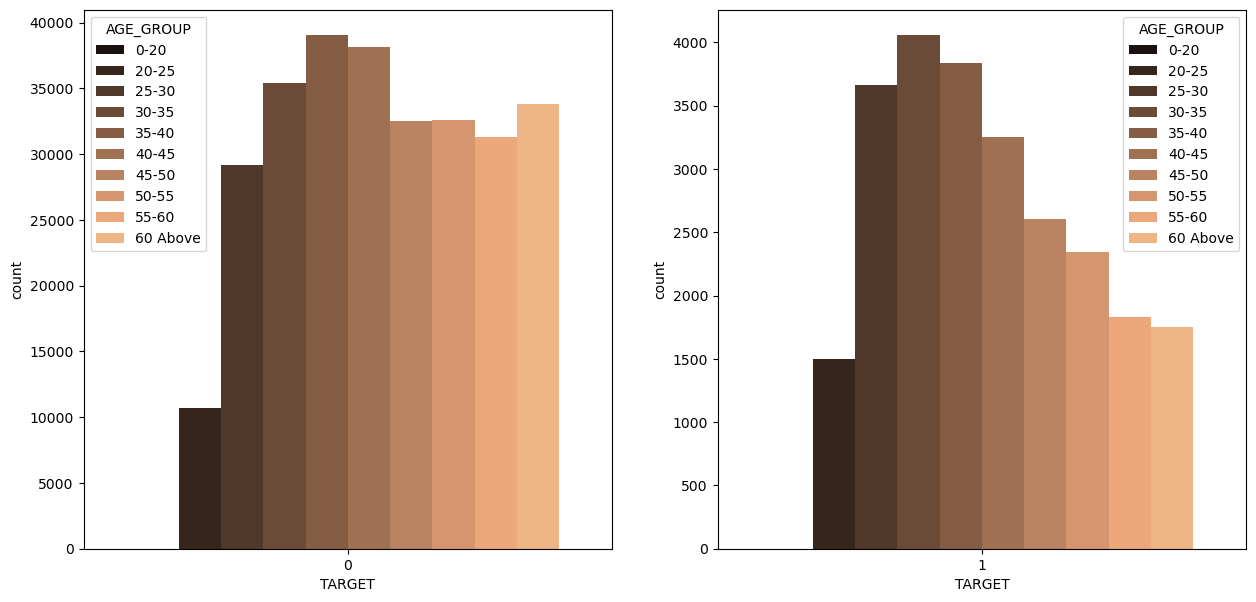

In [80]:
# Age Group Distribution Comparison between Non-Defaulted (Left) and Defaulted (Right) Populations

plt.figure(figsize=(15,7)) 
plt.subplot(121)
sns.countplot(x='TARGET',hue='AGE_GROUP',data=Target0,palette='copper')
plt.subplot(122)
sns.countplot(x='TARGET',hue='AGE_GROUP',data=Target1,palette='copper')
plt.show() 

***--- The analysis of loan applications based on age groups reveals interesting patterns.***

***--- The Age group (35-50 years) demonstrates the highest frequency of loan applications, both among defaulters and non-defaulters.***

***--- This suggests a consistent trend of loan applications from individuals in the middle-age range***

***--- On the contrary, Senior Citizens (60 years & above) and Very Young applicants (19-25 years) exhibit lower instances of payment difficulties, suggesting relative financial stability in these age categories.***

***--- This insight into age-related trends can be valuable for the lending institution in understanding and managing potential risks associated with different demographic segments.***

***Gender Analysis in Loan Applications:***

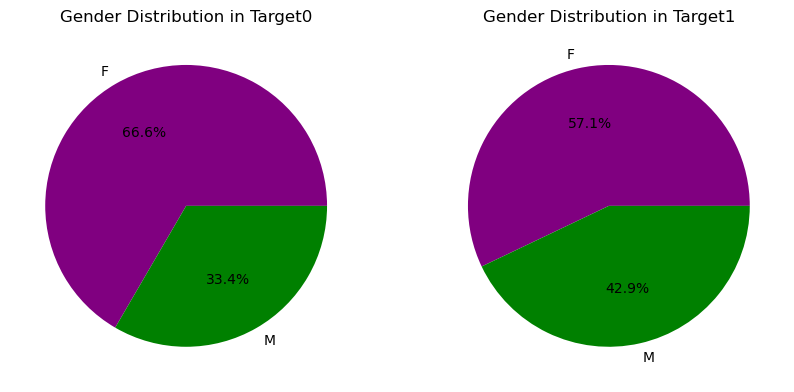

In [81]:
# Gender Distribution in Loan Defaulters and Non-Defaulters using Pie Chart
plt.figure(figsize=(10, 8))

# Plot for Target0
plt.subplot(121)
gender_counts_Target0_pie = Target0['CODE_GENDER'].value_counts()
plt.pie(gender_counts_Target0_pie, labels=gender_counts_Target0_pie.index, autopct='%1.1f%%', colors=['Purple','Green'])
plt.title("Gender Distribution in Target0")

# Plot for Target1
plt.subplot(122)
gender_counts_Target1_pie = Target1['CODE_GENDER'].value_counts()
plt.pie(gender_counts_Target1_pie, labels=gender_counts_Target1_pie.index, autopct='%1.1f%%', colors=['Purple','Green'])
plt.title("Gender Distribution in Target1")

plt.show()

***--- Female clients exhibit a higher frequency of loan applications compared to male clients. A majority of female clients fall into the non-defaulter category, with a smaller proportion classified as defaulters.***

***--- Conversely, female clients show a relatively higher percentage of defaulters also compared to non-defaulters. This gender-wise distribution provides insights into the loan application patterns and default tendencies within the dataset.***

# Exploring Univariate Analysis of Categorical Columns: Distribution and Insights

# ***Creating Categorical Column Based on Binary Target Variable in Pandas DataFrame***

***--- The purpose of introducing this categorical column is to provide a more interpretable representation of the data.***

***--- Instead of working directly with numeric binary values, the categorical column assigns meaningful labels to each row based on the corresponding value in the binary target column. This transformation facilitates data analysis, visualization, and model interpretation, as the new categorical column can be used to easily identify and differentiate between the two classes.***

In [82]:
def categorical_plot(var, Target0, Target1):
    plt.figure(figsize=(40, 20))
    plt.rcParams['axes.labelpad'] = 50

    # Plot for Non Payment Difficulties
    plt.subplot(1, 2, 1)
    sns.countplot(x=var, data=Target0, palette='copper', hue='TARGET')
    set_subplot_labels(var, 'Non Payment Difficulties')

    # Plot for Payments Difficulties
    plt.subplot(1, 2, 2)
    sns.countplot(x=var, data=Target1, palette='afmhot', hue='TARGET')
    set_subplot_labels(var, 'Payments Difficulties')

    plt.show()

def set_subplot_labels(xlabel, ylabel):
    plt.xlabel(xlabel, fontsize=30, fontweight="bold")
    plt.ylabel(ylabel, fontsize=30, fontweight="bold")
    plt.xticks(rotation=90, fontsize=30)
    plt.yticks(rotation=360, fontsize=30)

In [83]:
#Let’s create a list for all categorical columns.

categorical_col = list(df_appdata.select_dtypes(include= 'category').columns) 

In [84]:
# Removing 'ORGANIZATION_TYPE','CODE_GENDER','AGE_GROUP' because we have already taken up the isights from  above plots

categorical_col.remove('ORGANIZATION_TYPE') 
categorical_col.remove('CODE_GENDER')
categorical_col.remove('AGE_GROUP')

In [85]:
categorical_col

['NAME_CONTRACT_TYPE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'AMT_INCOME_RANGE',
 'AMT_CREDIT_RANGE',
 'AMT_GOODS_PRICE_RANGE']

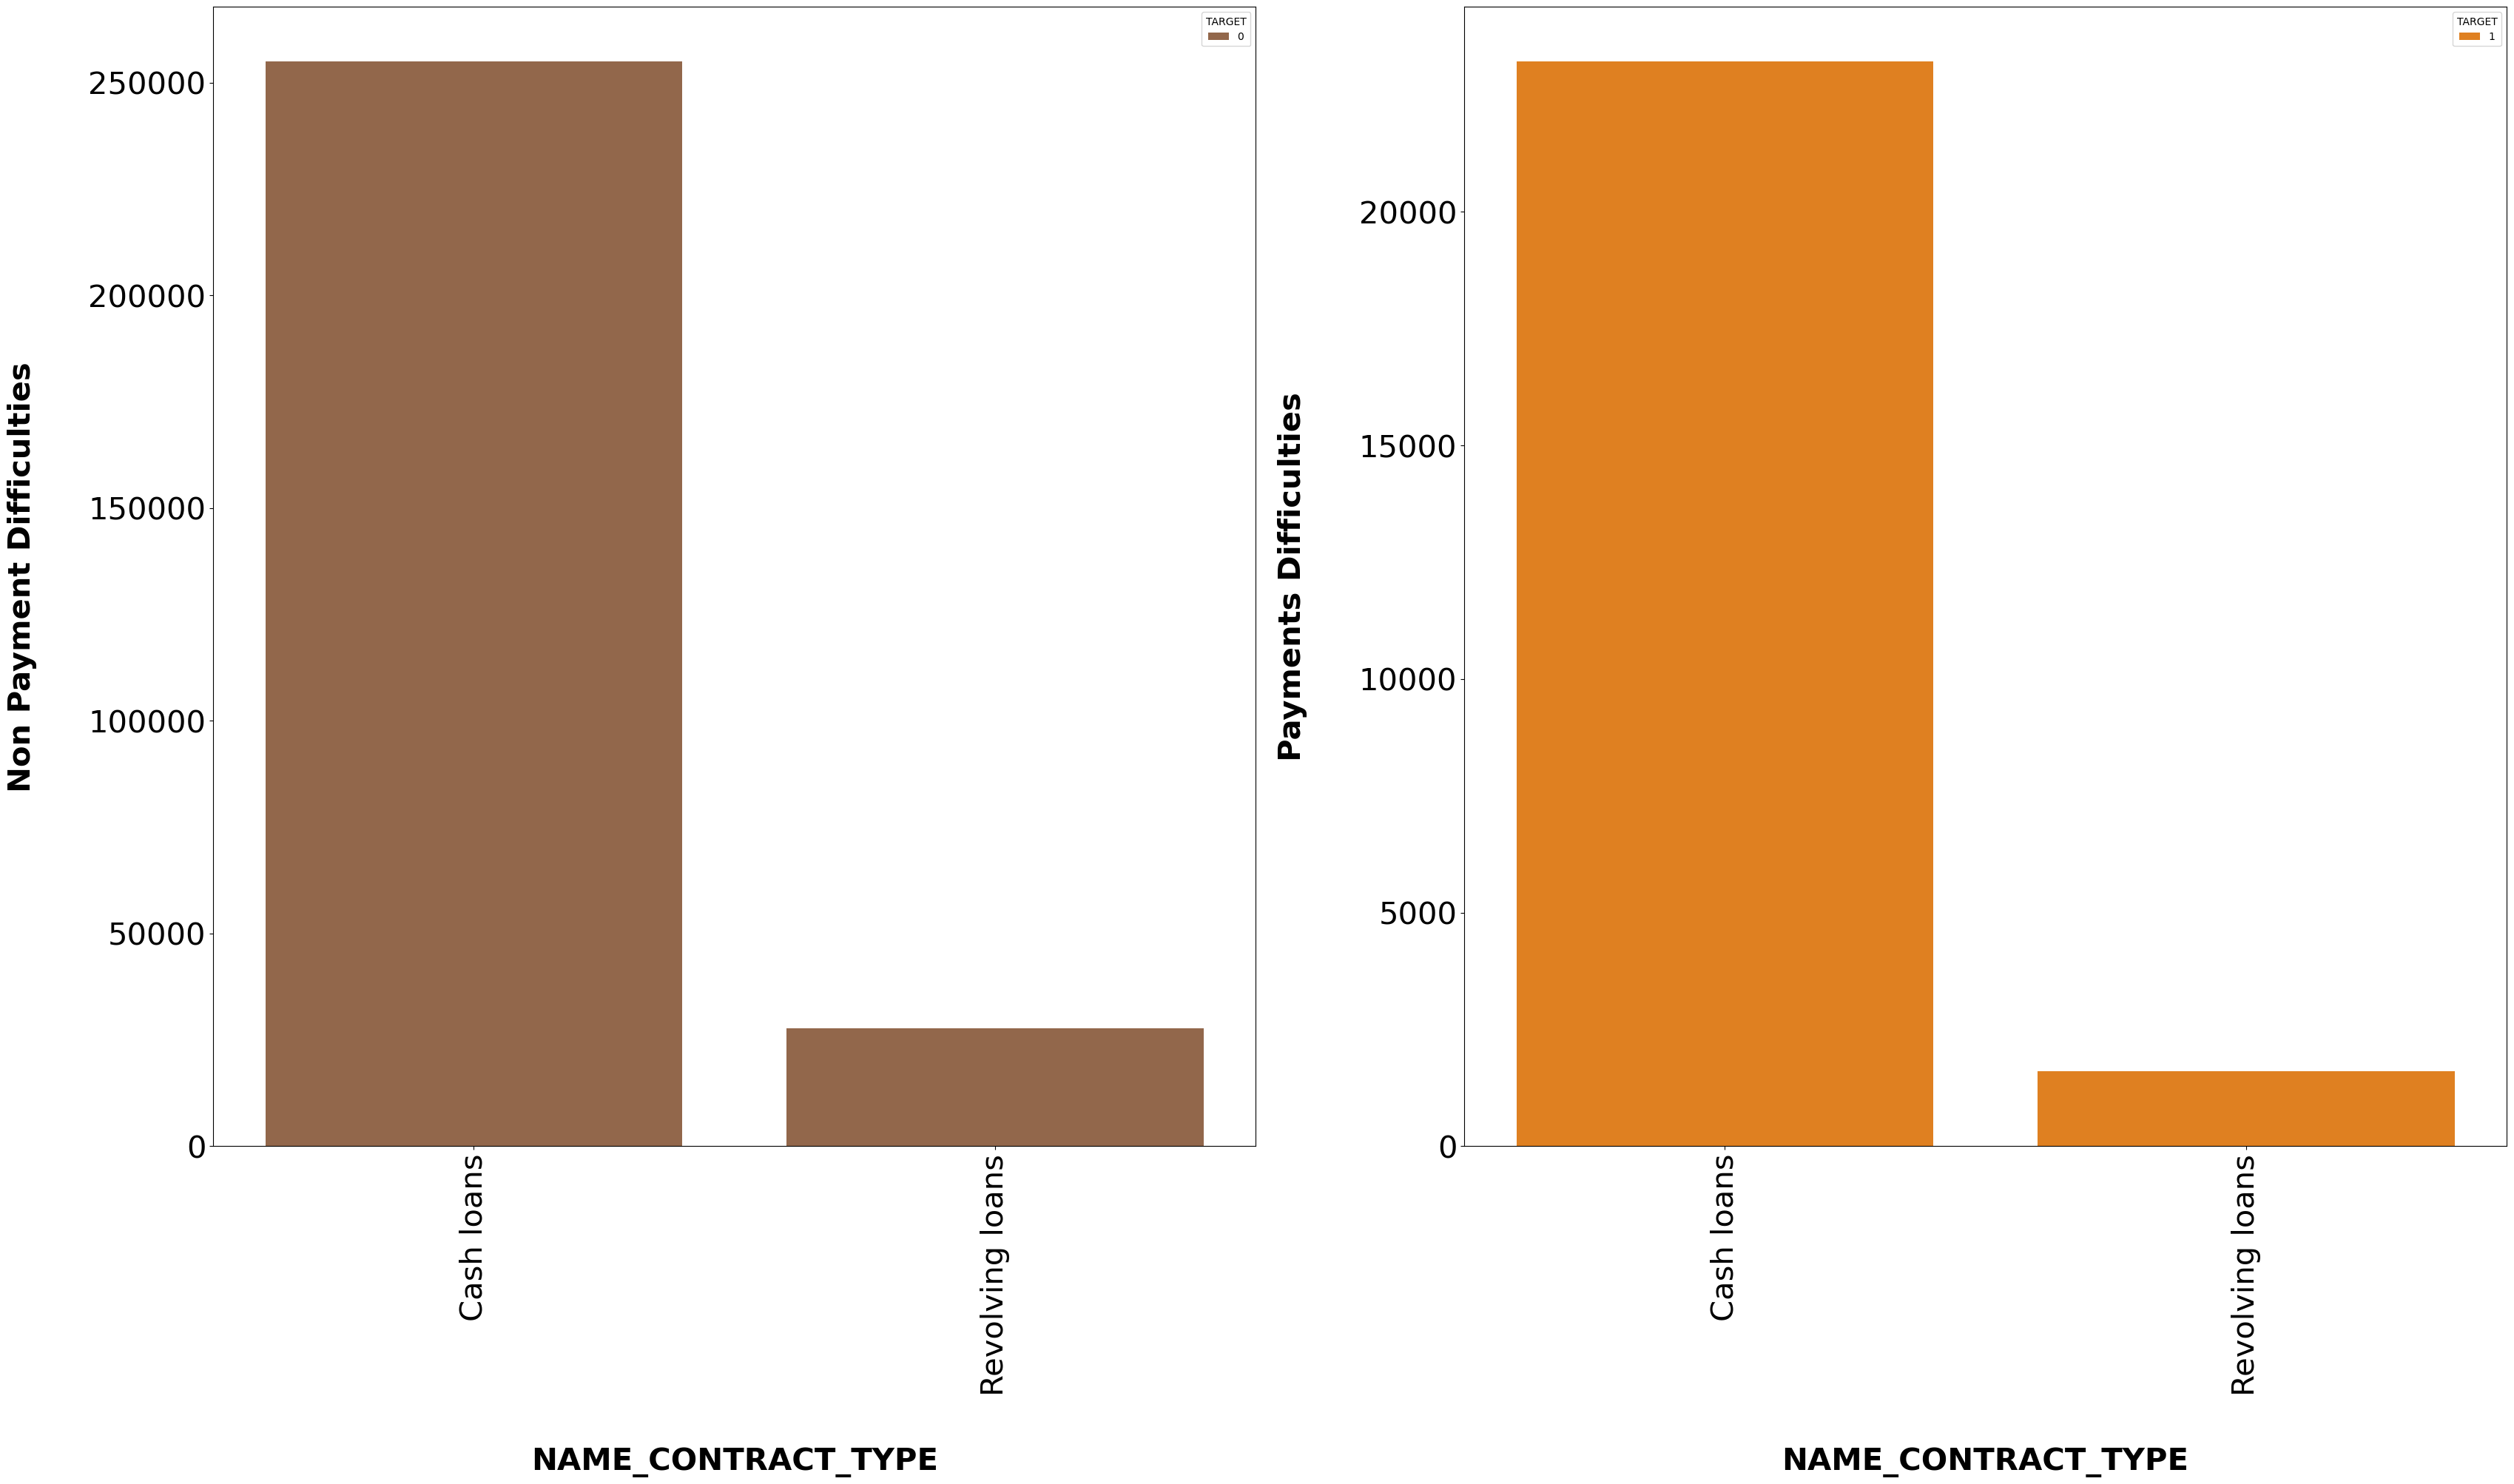

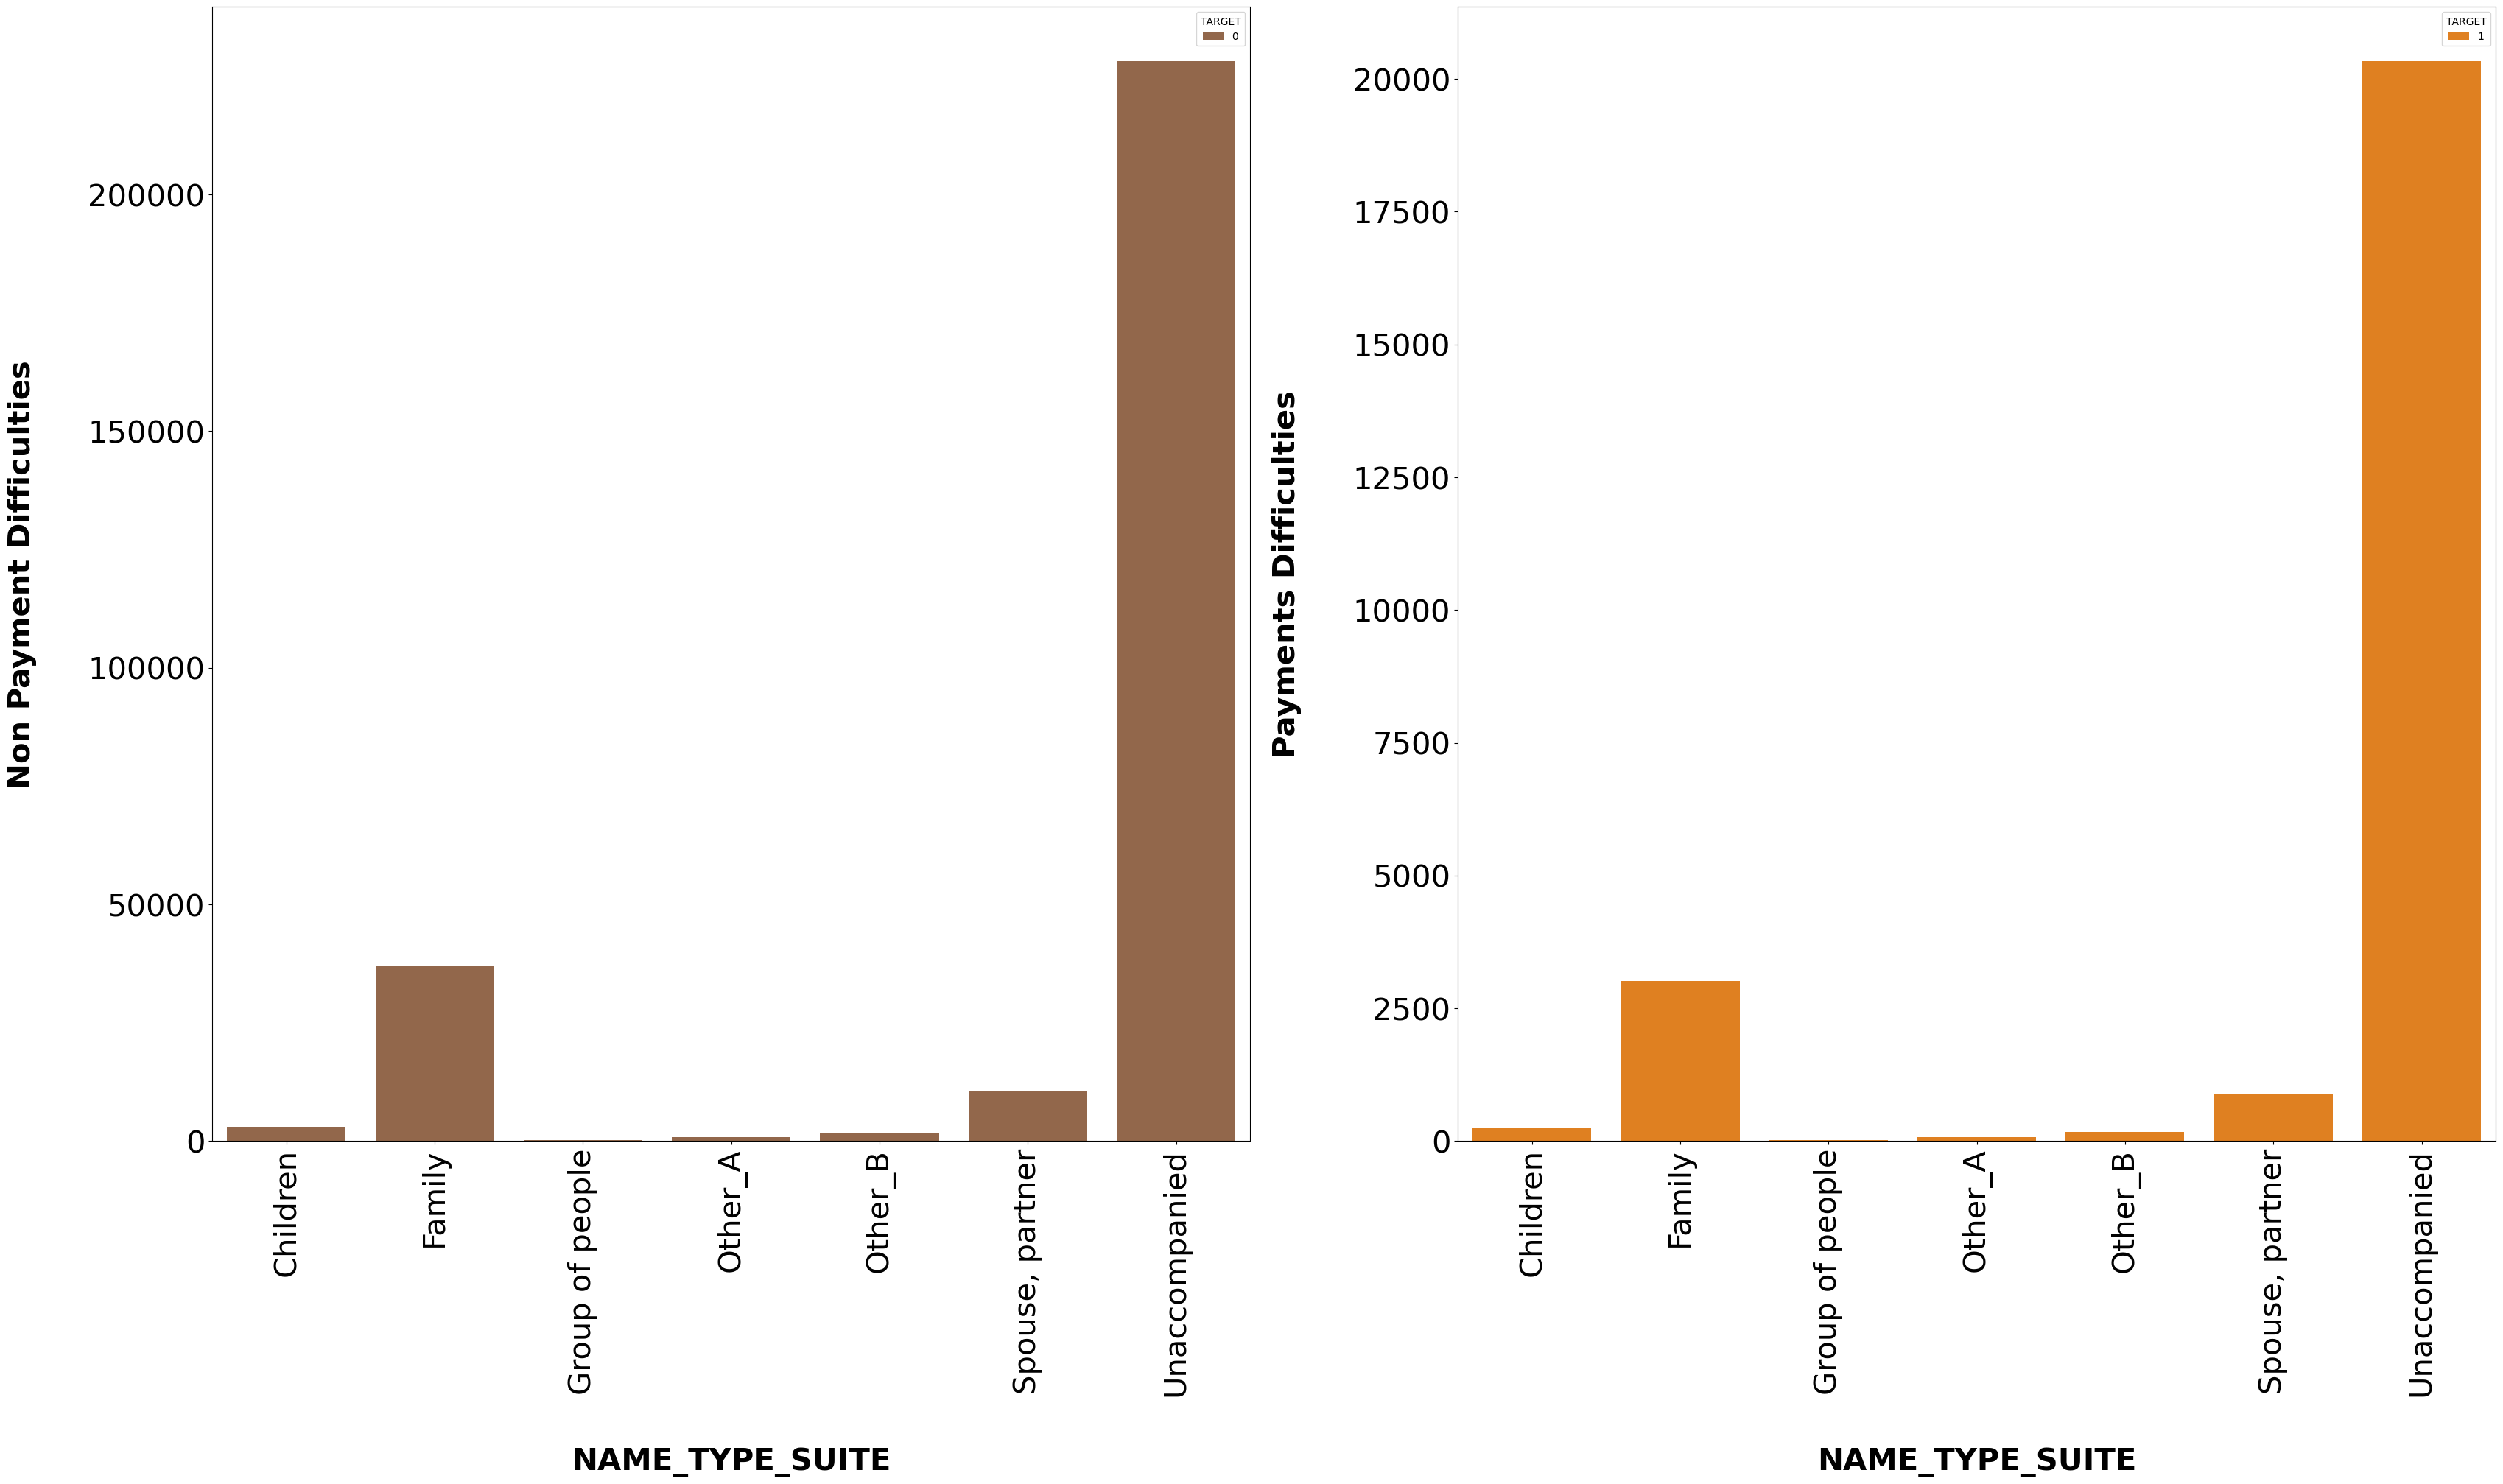

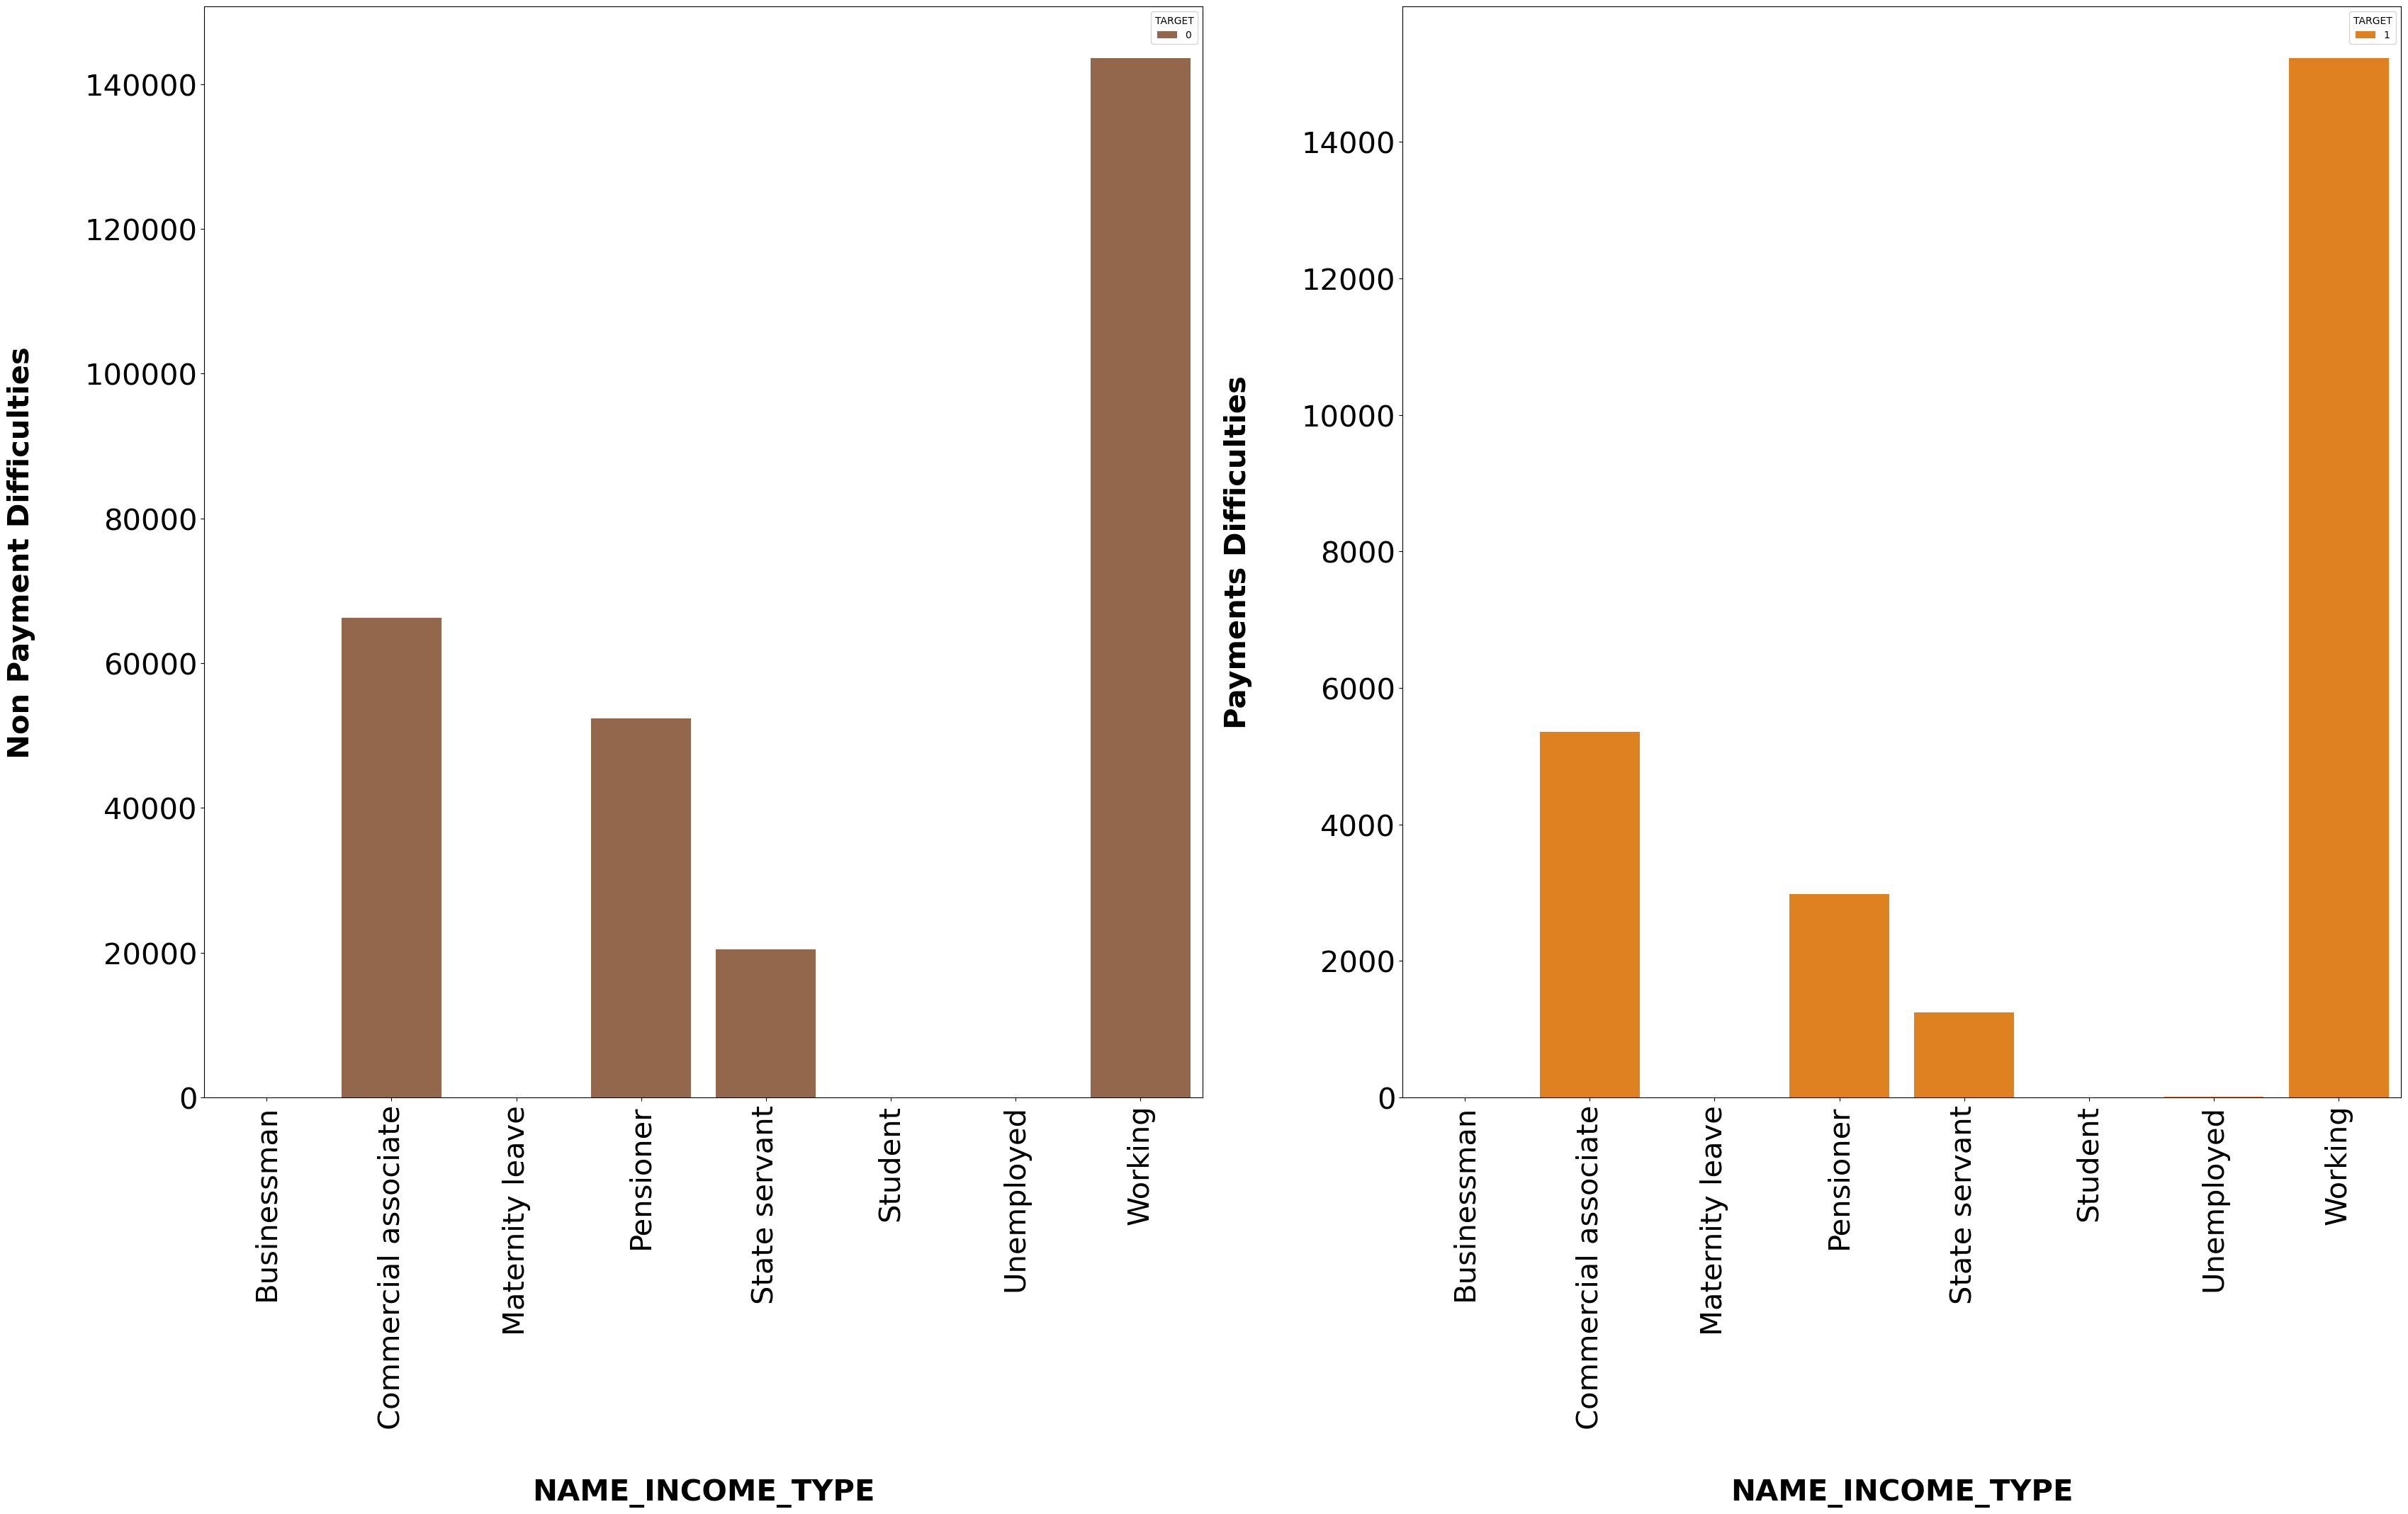

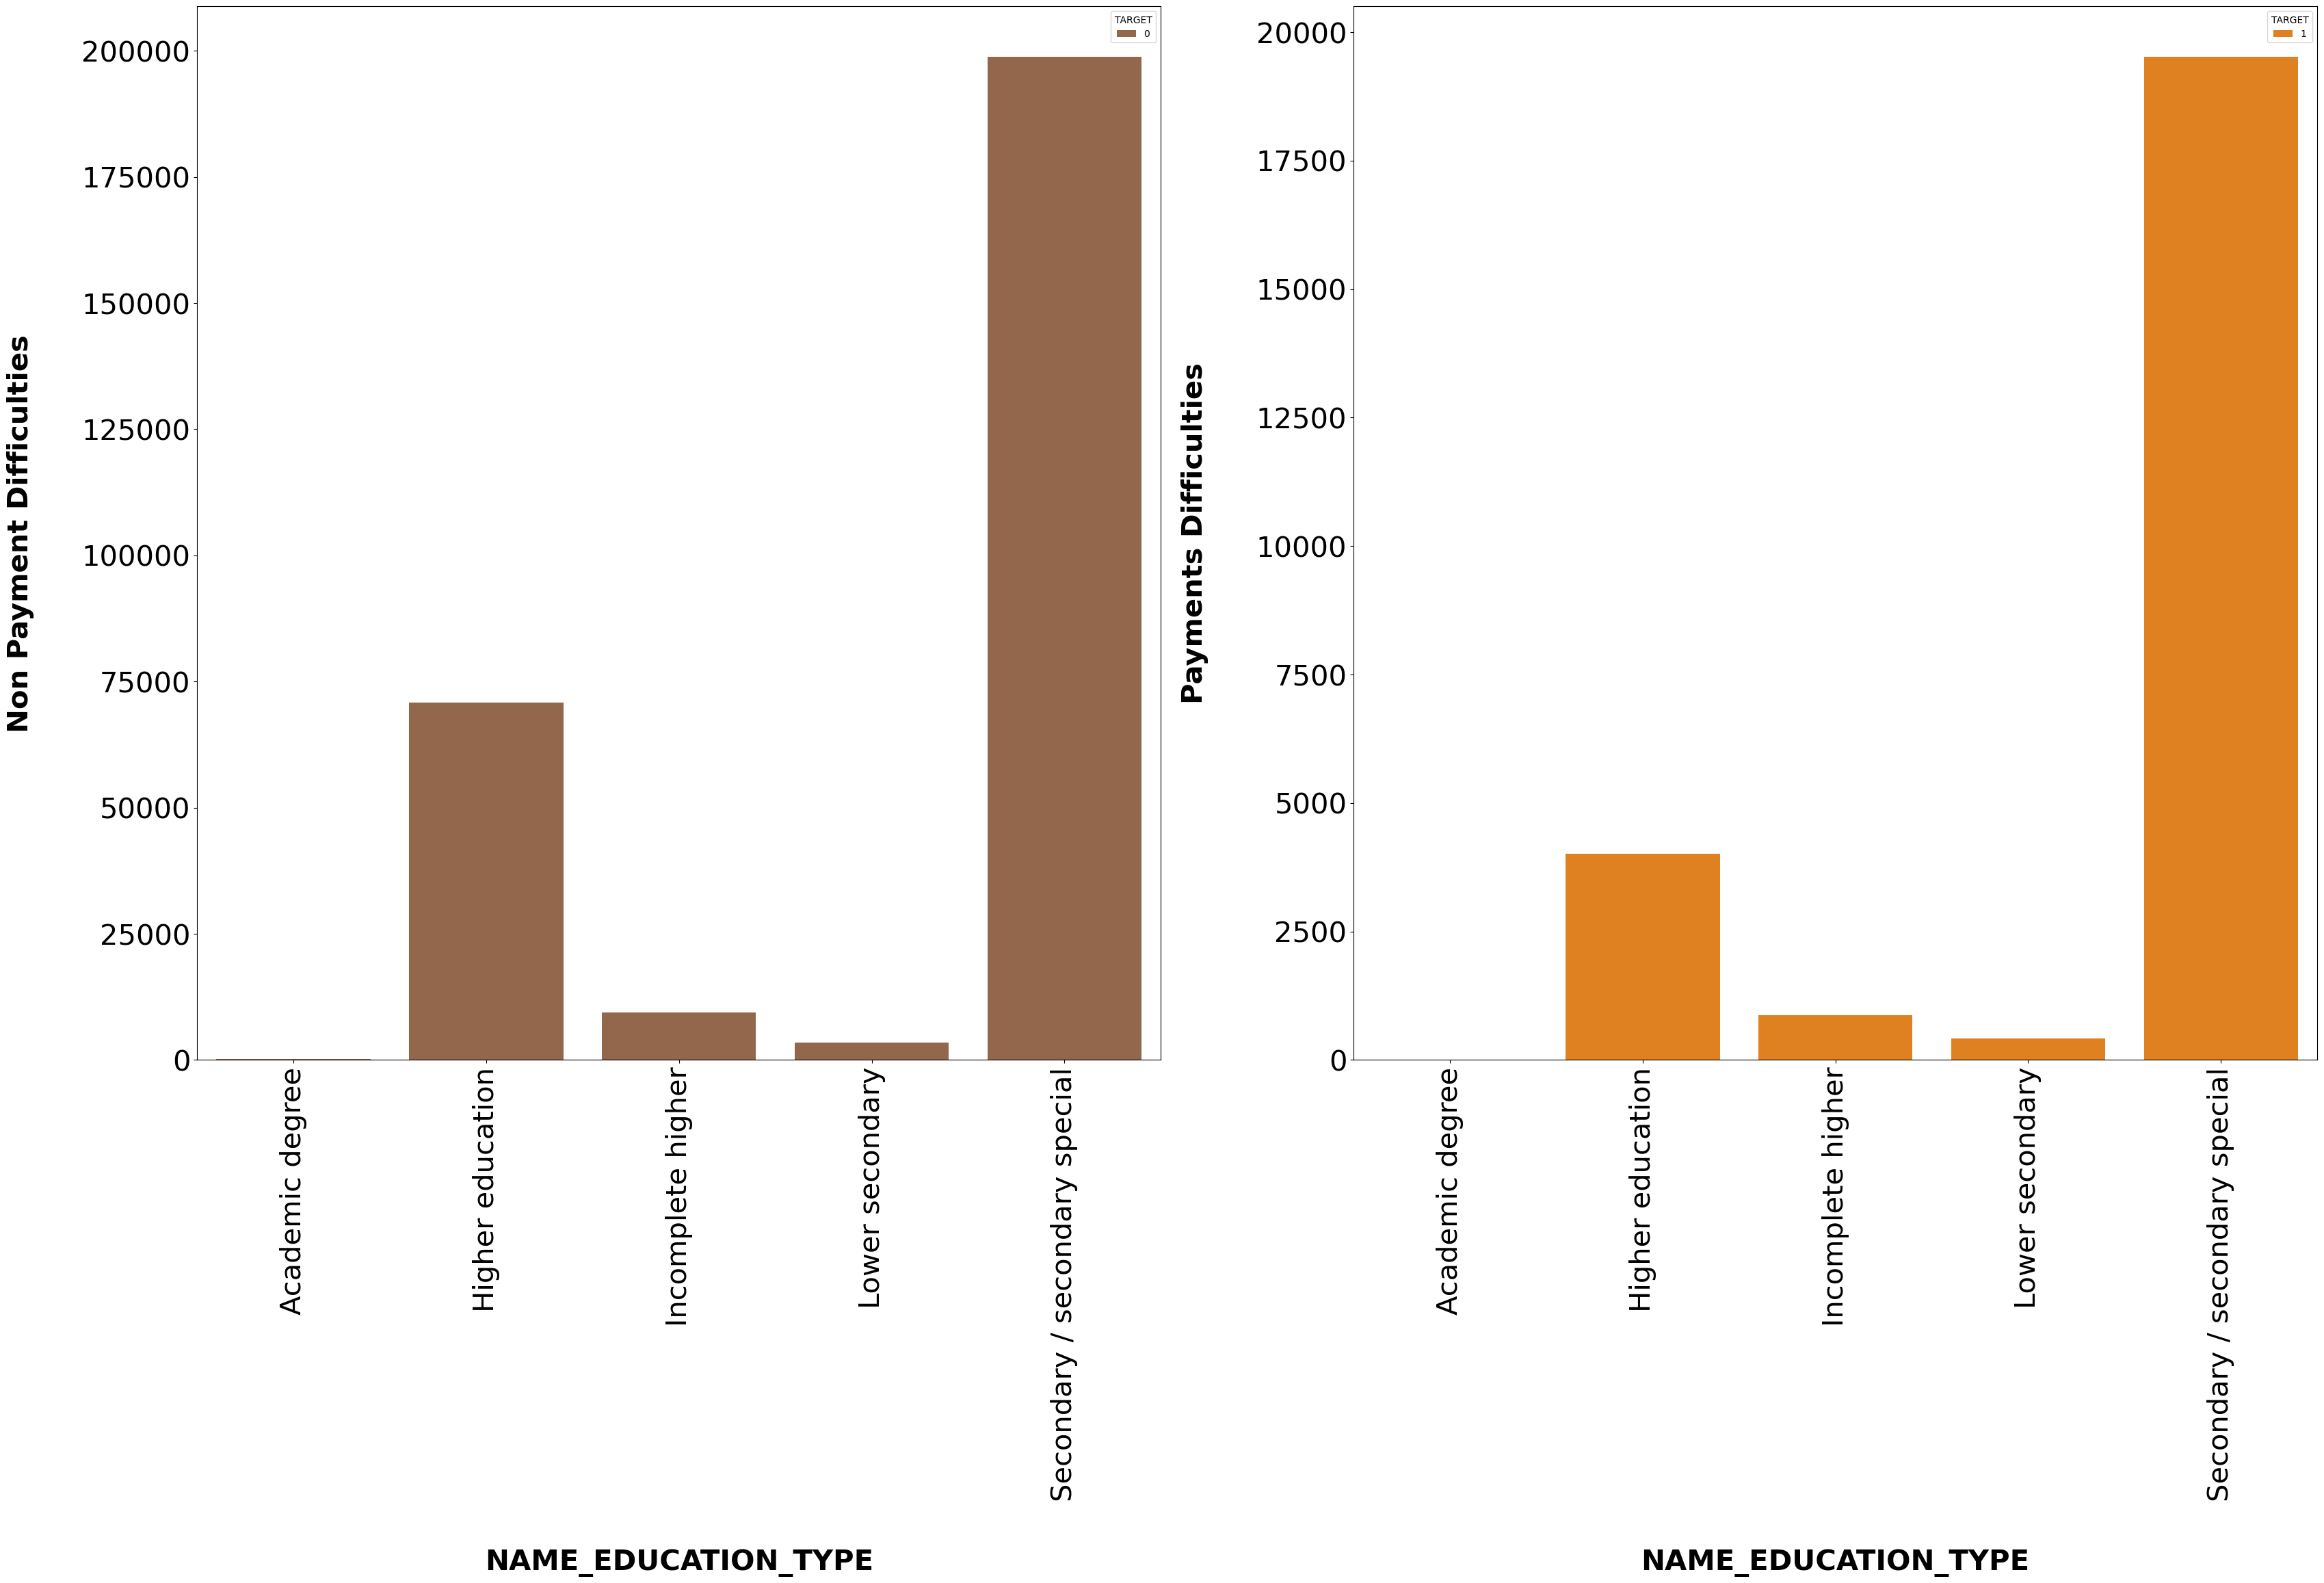

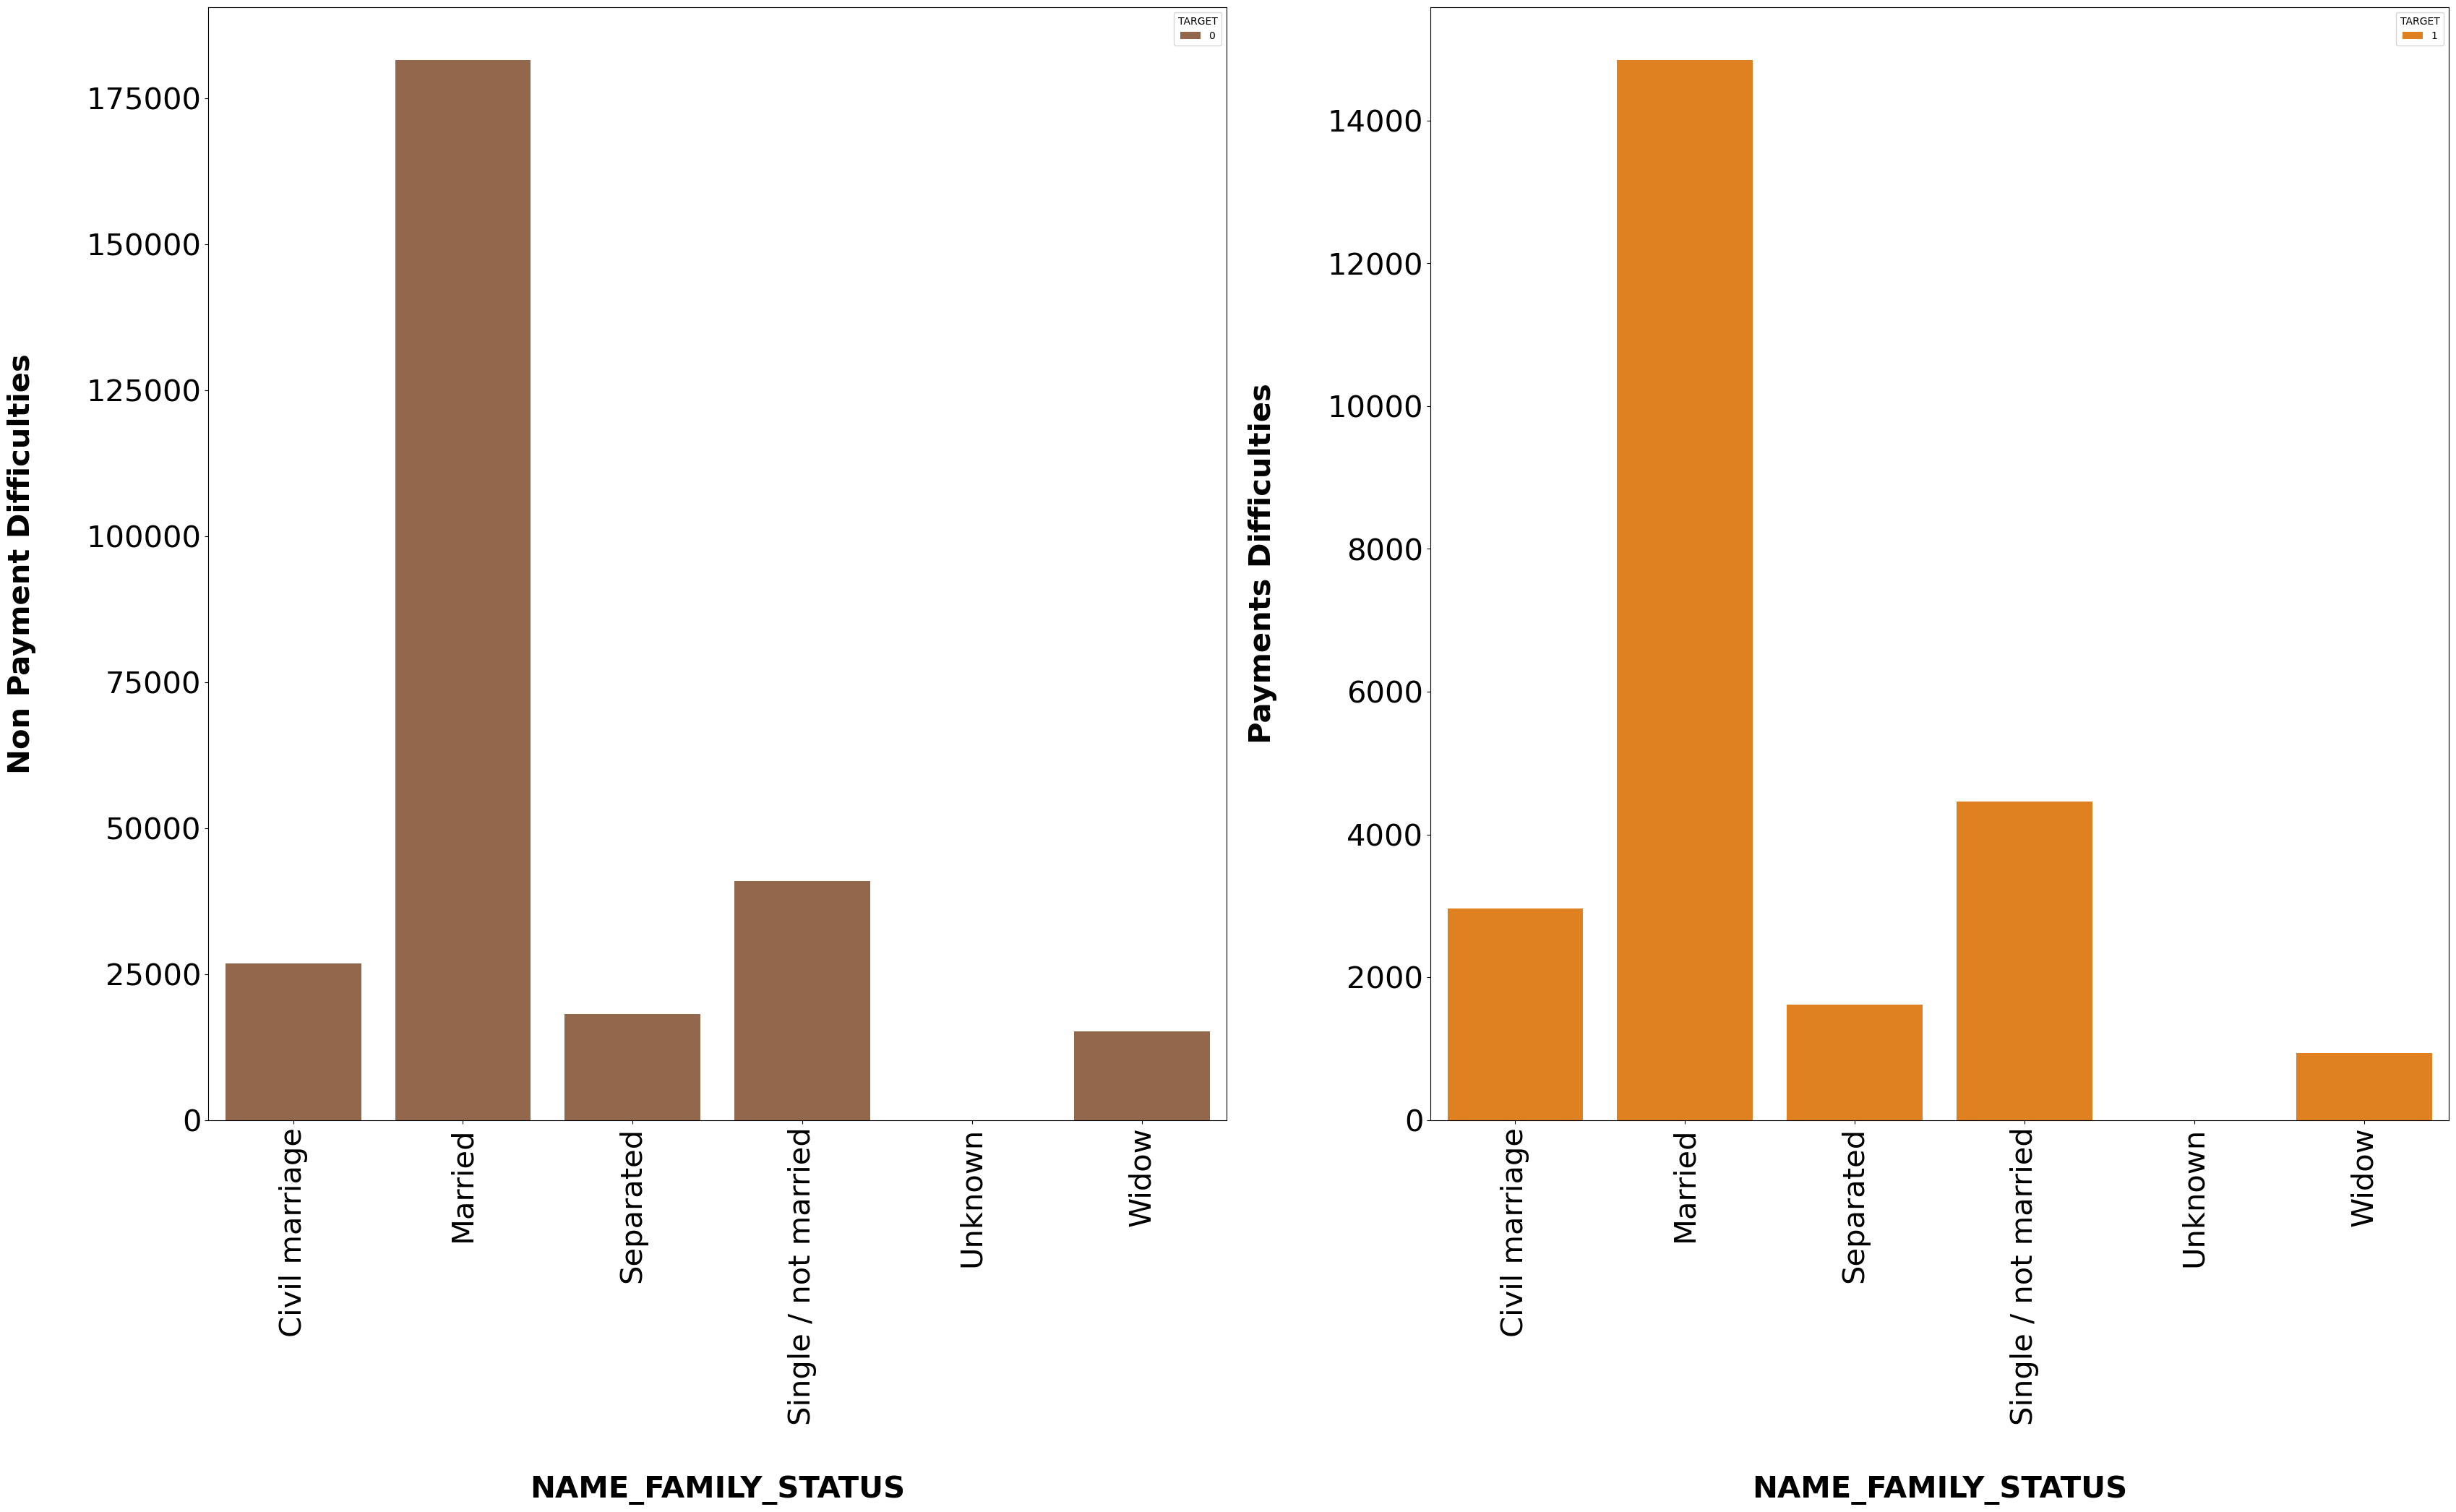

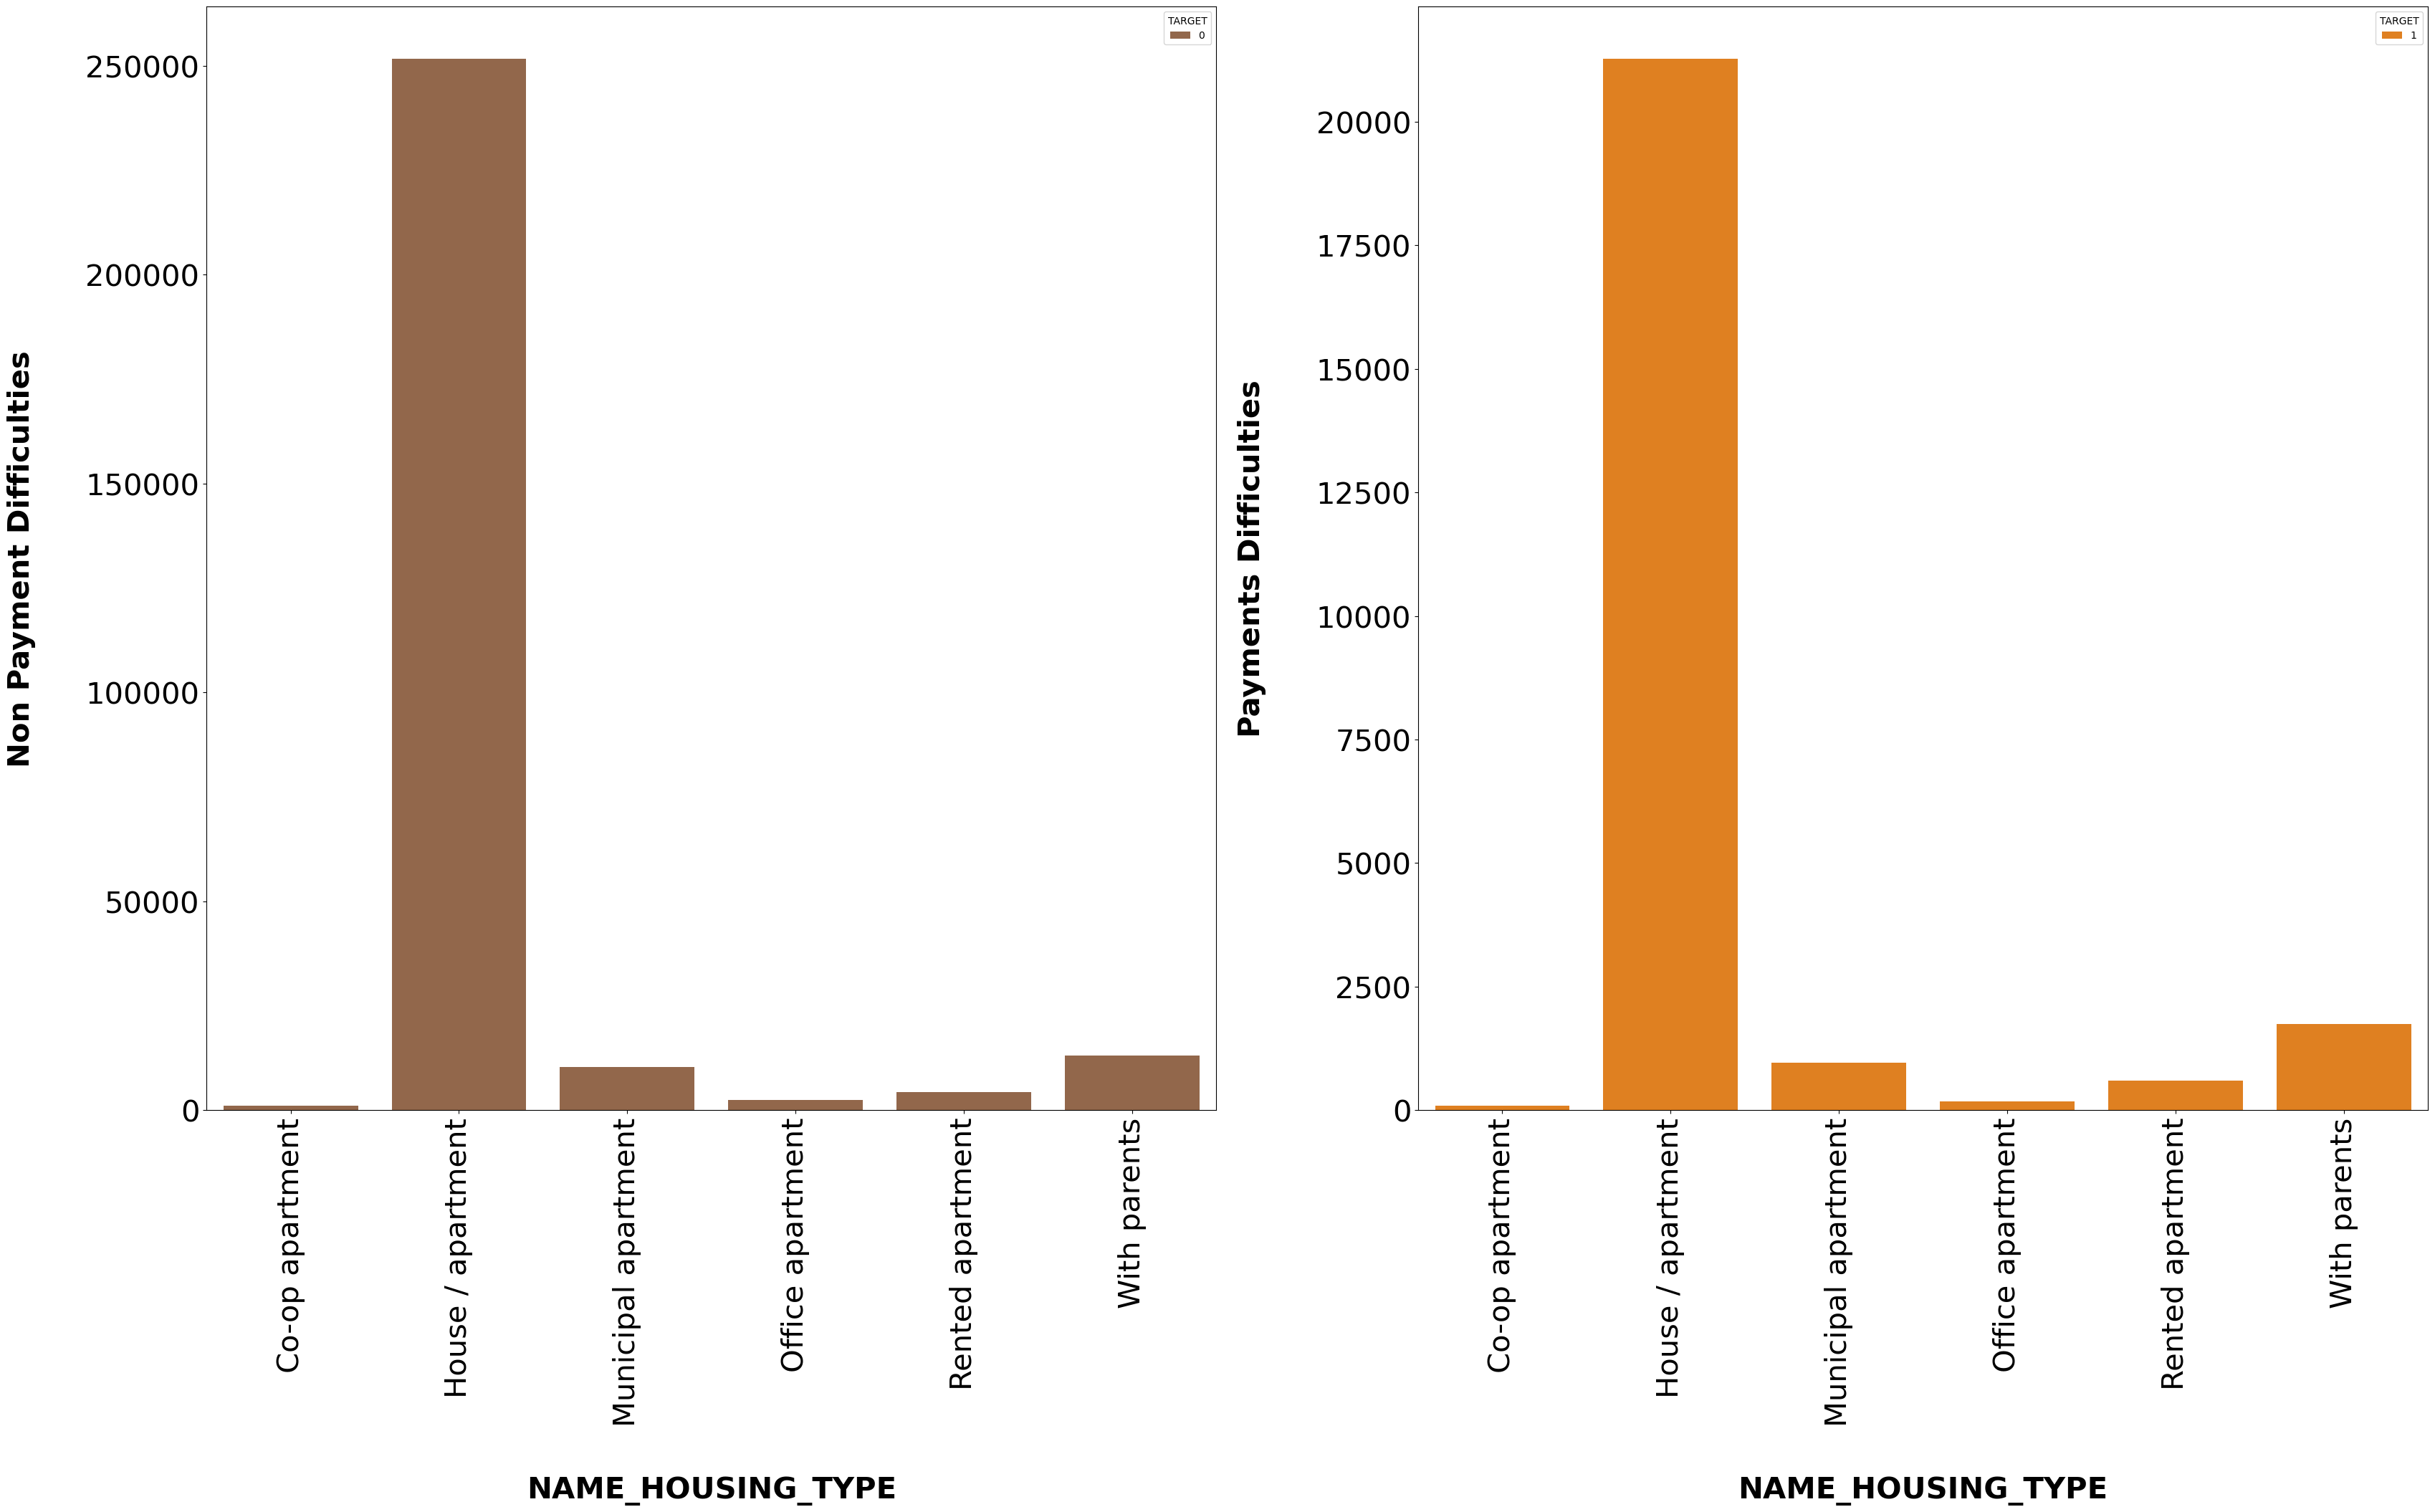

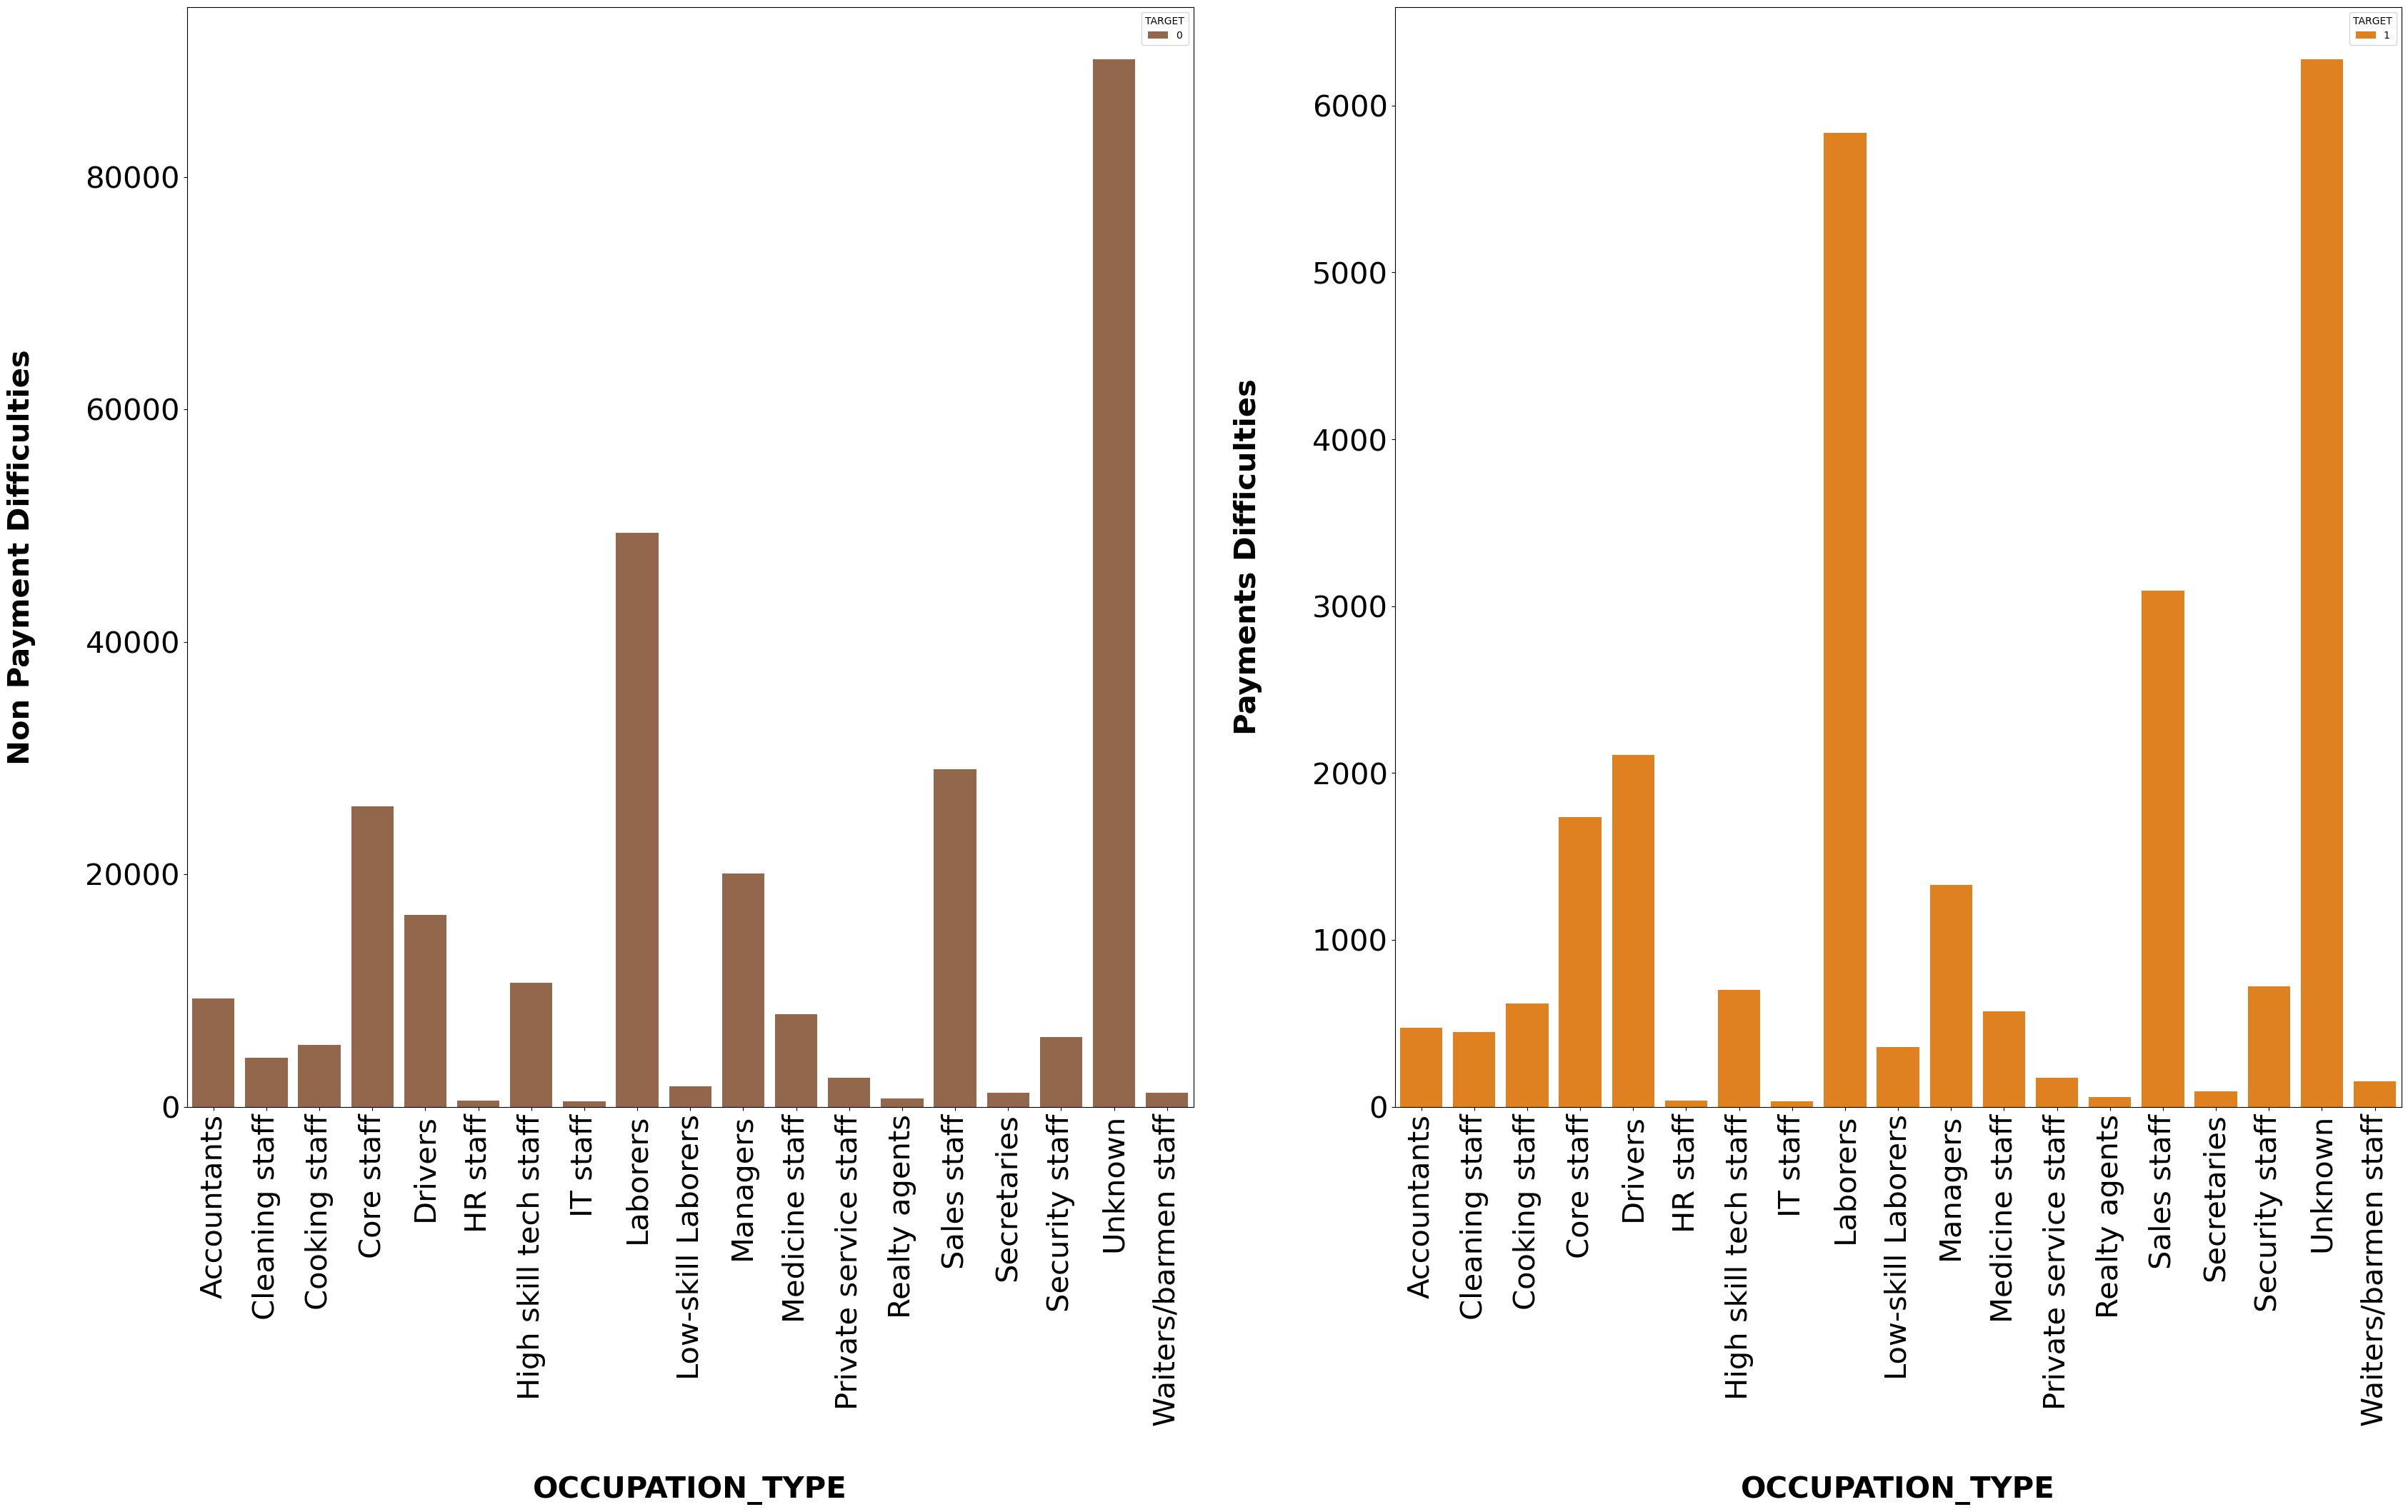

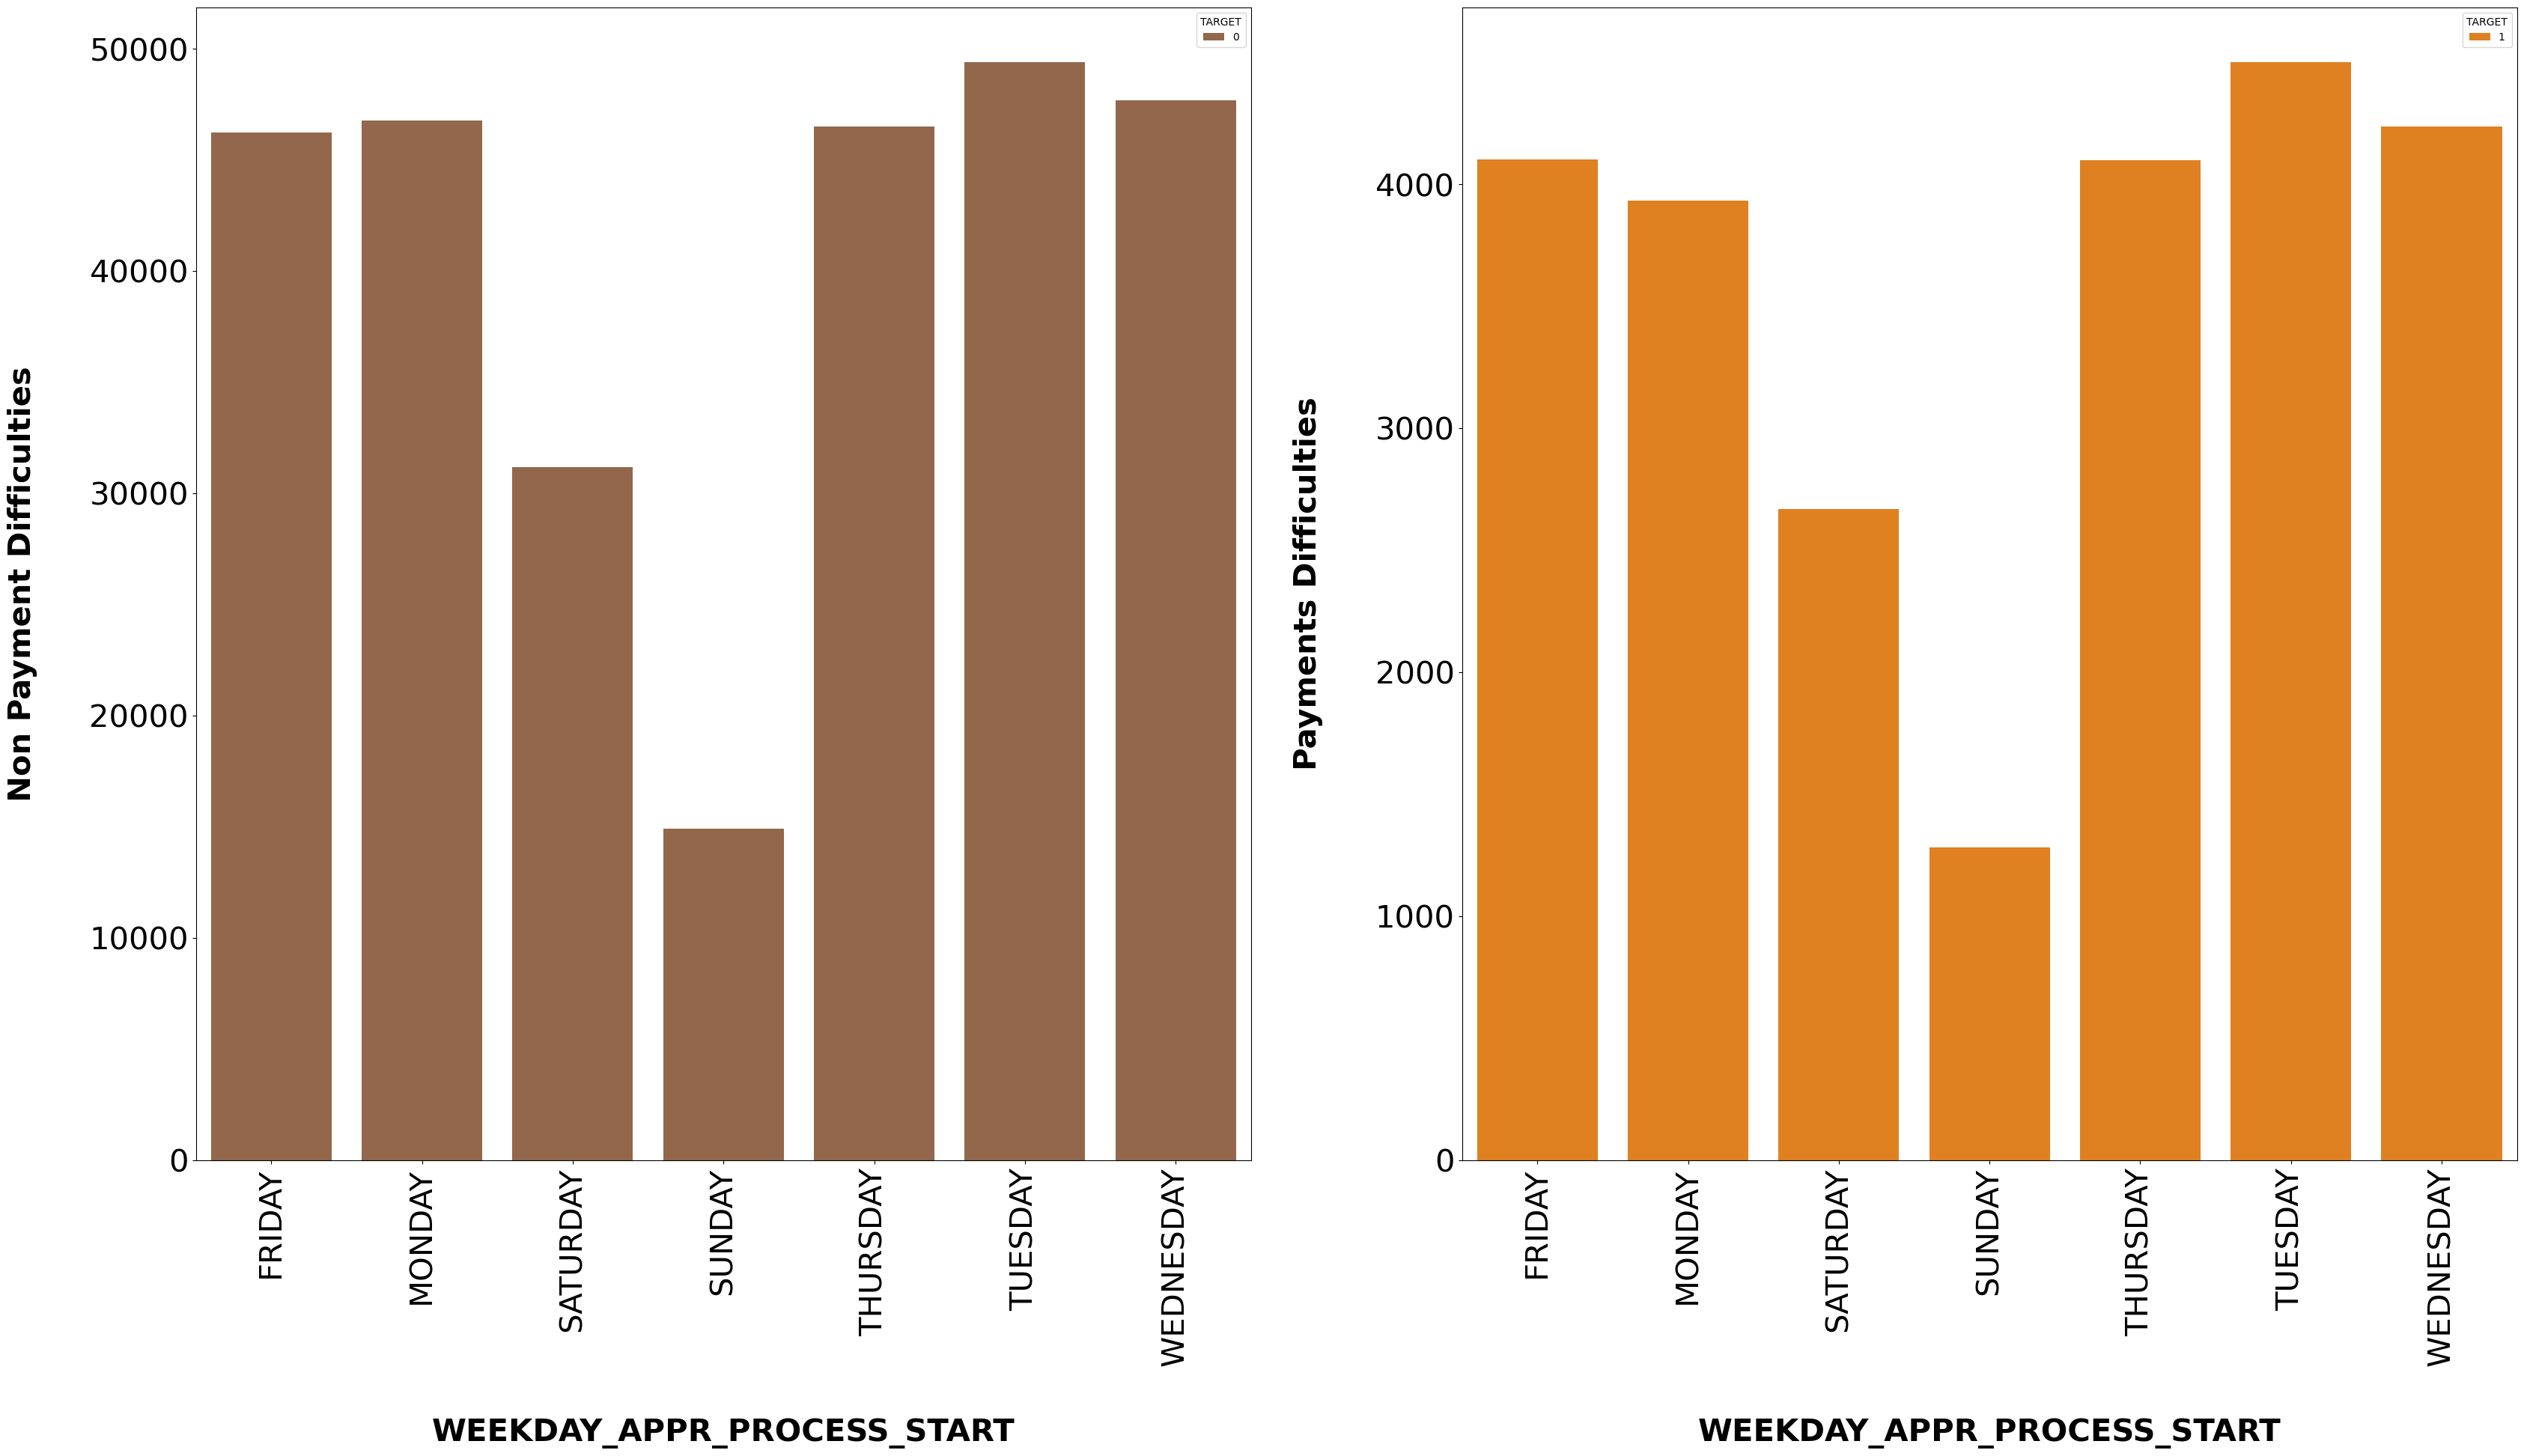

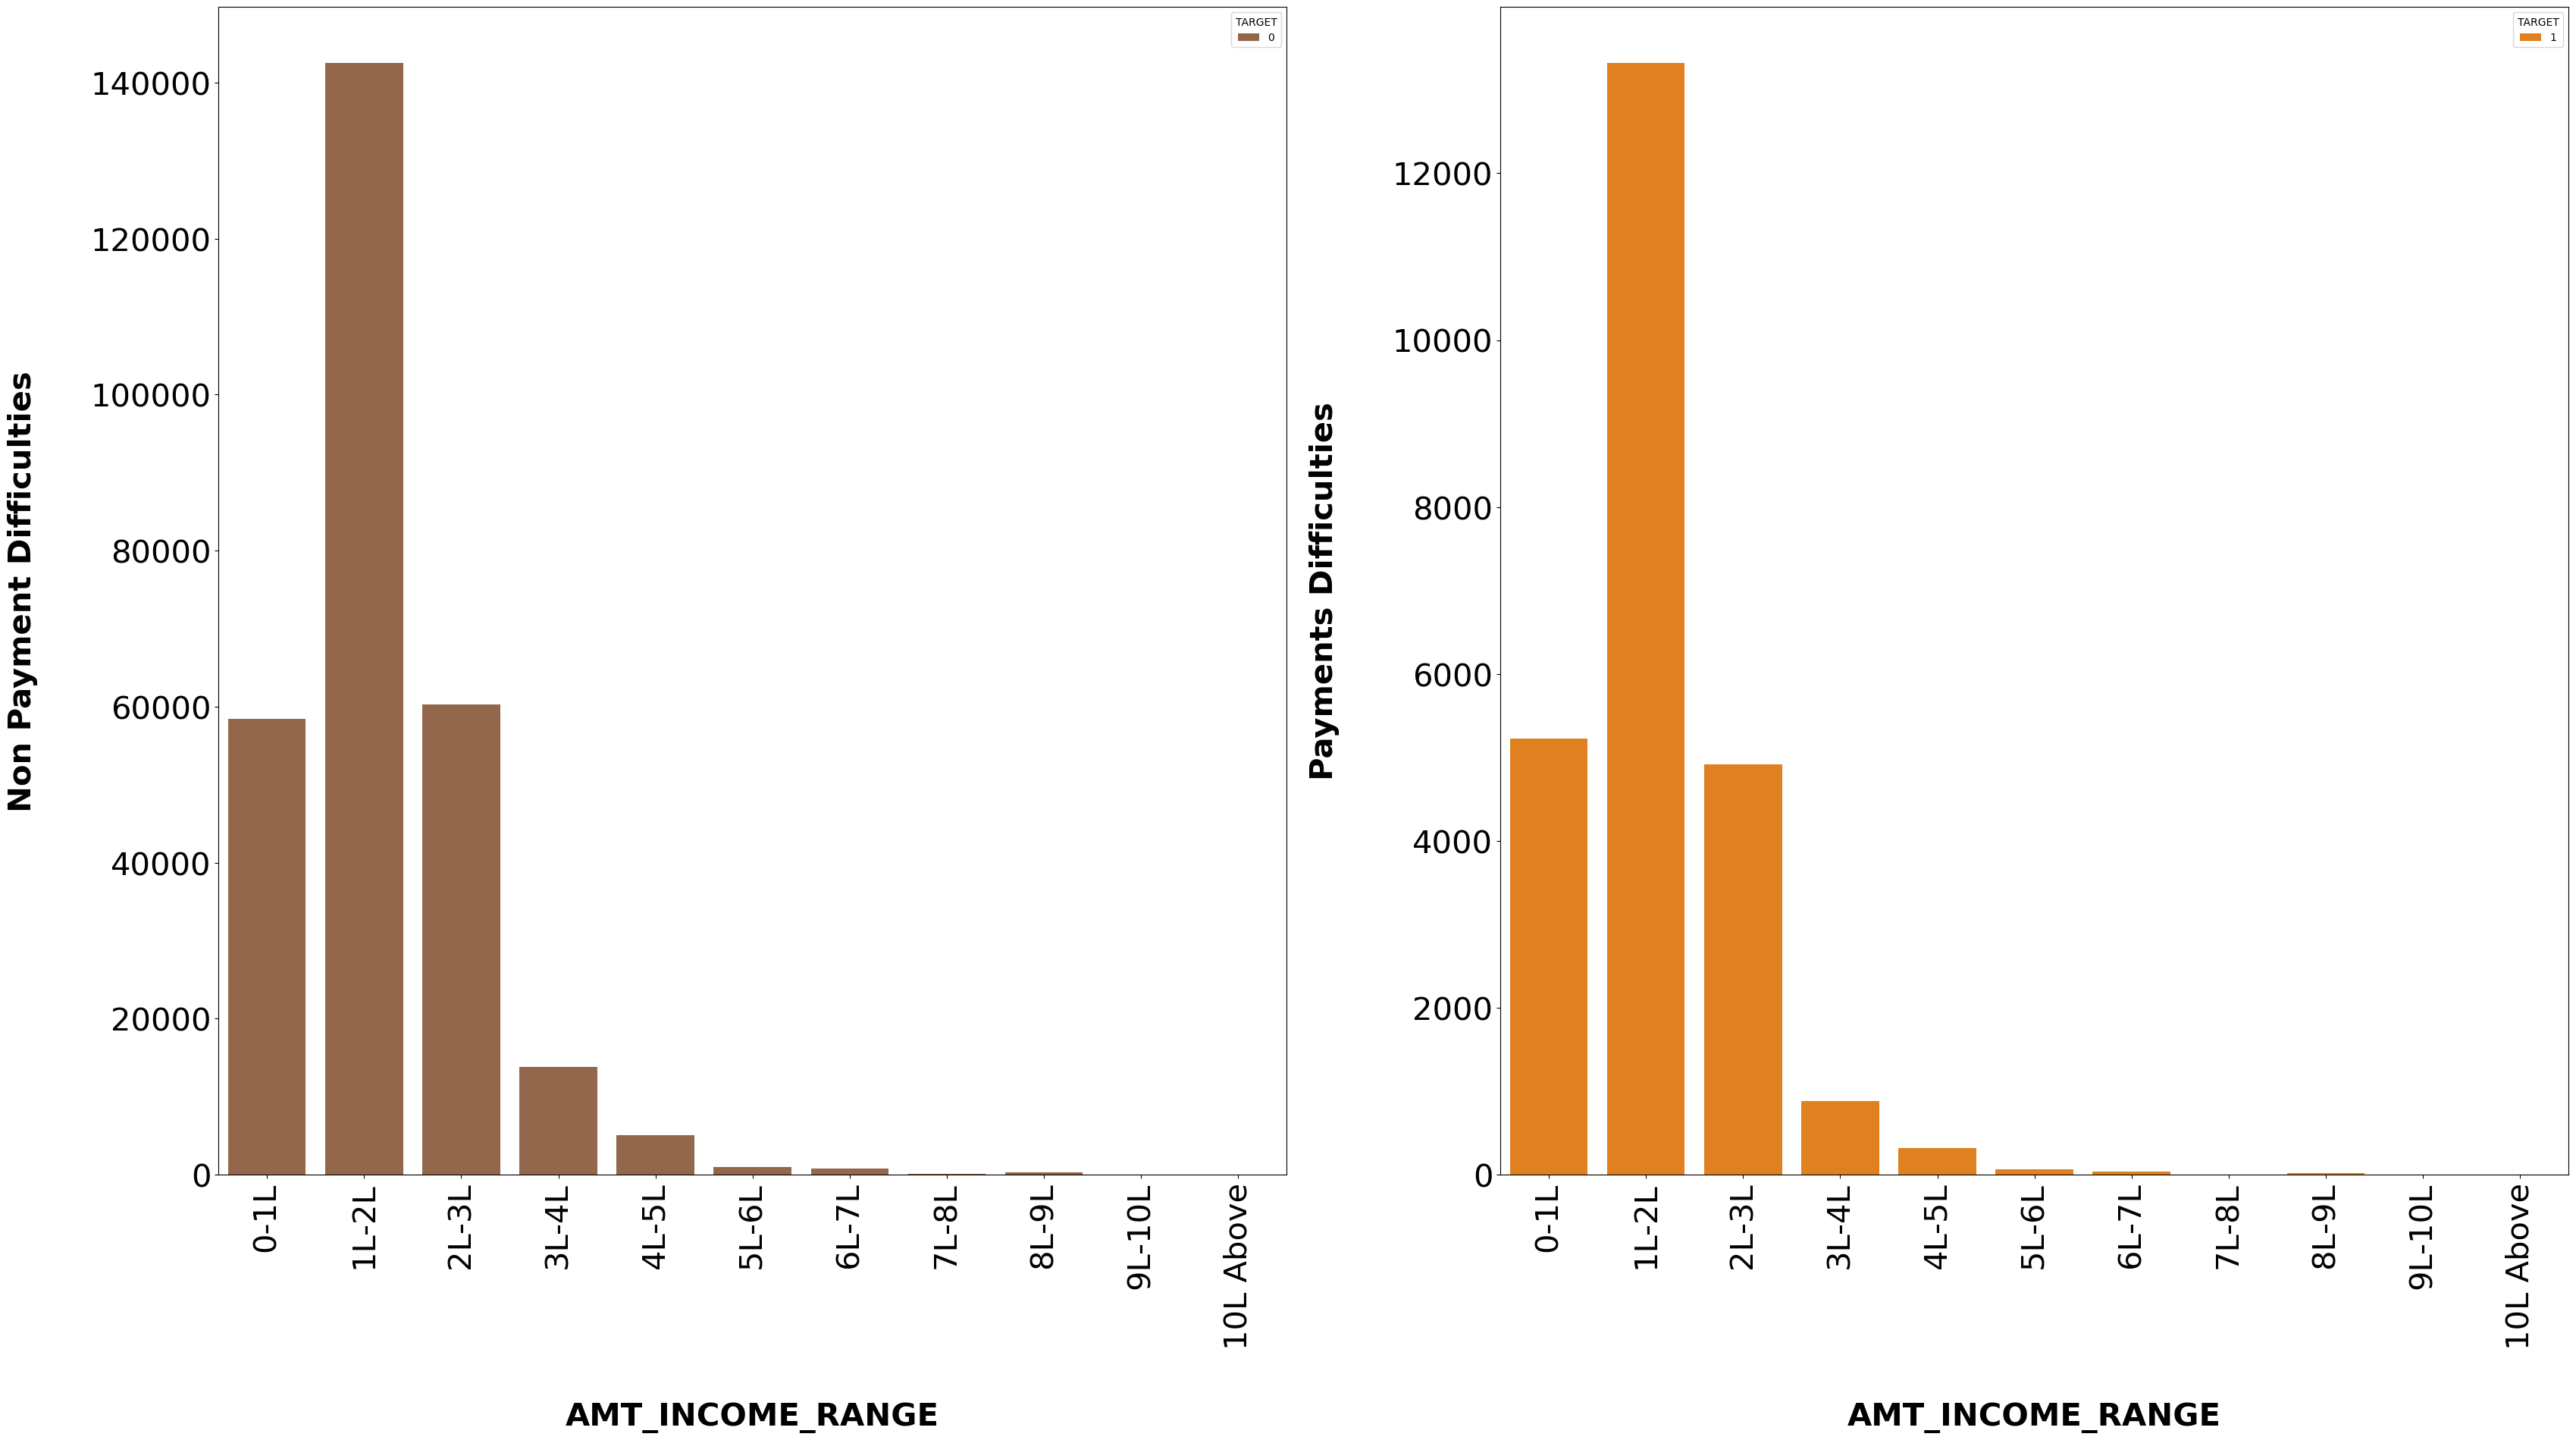

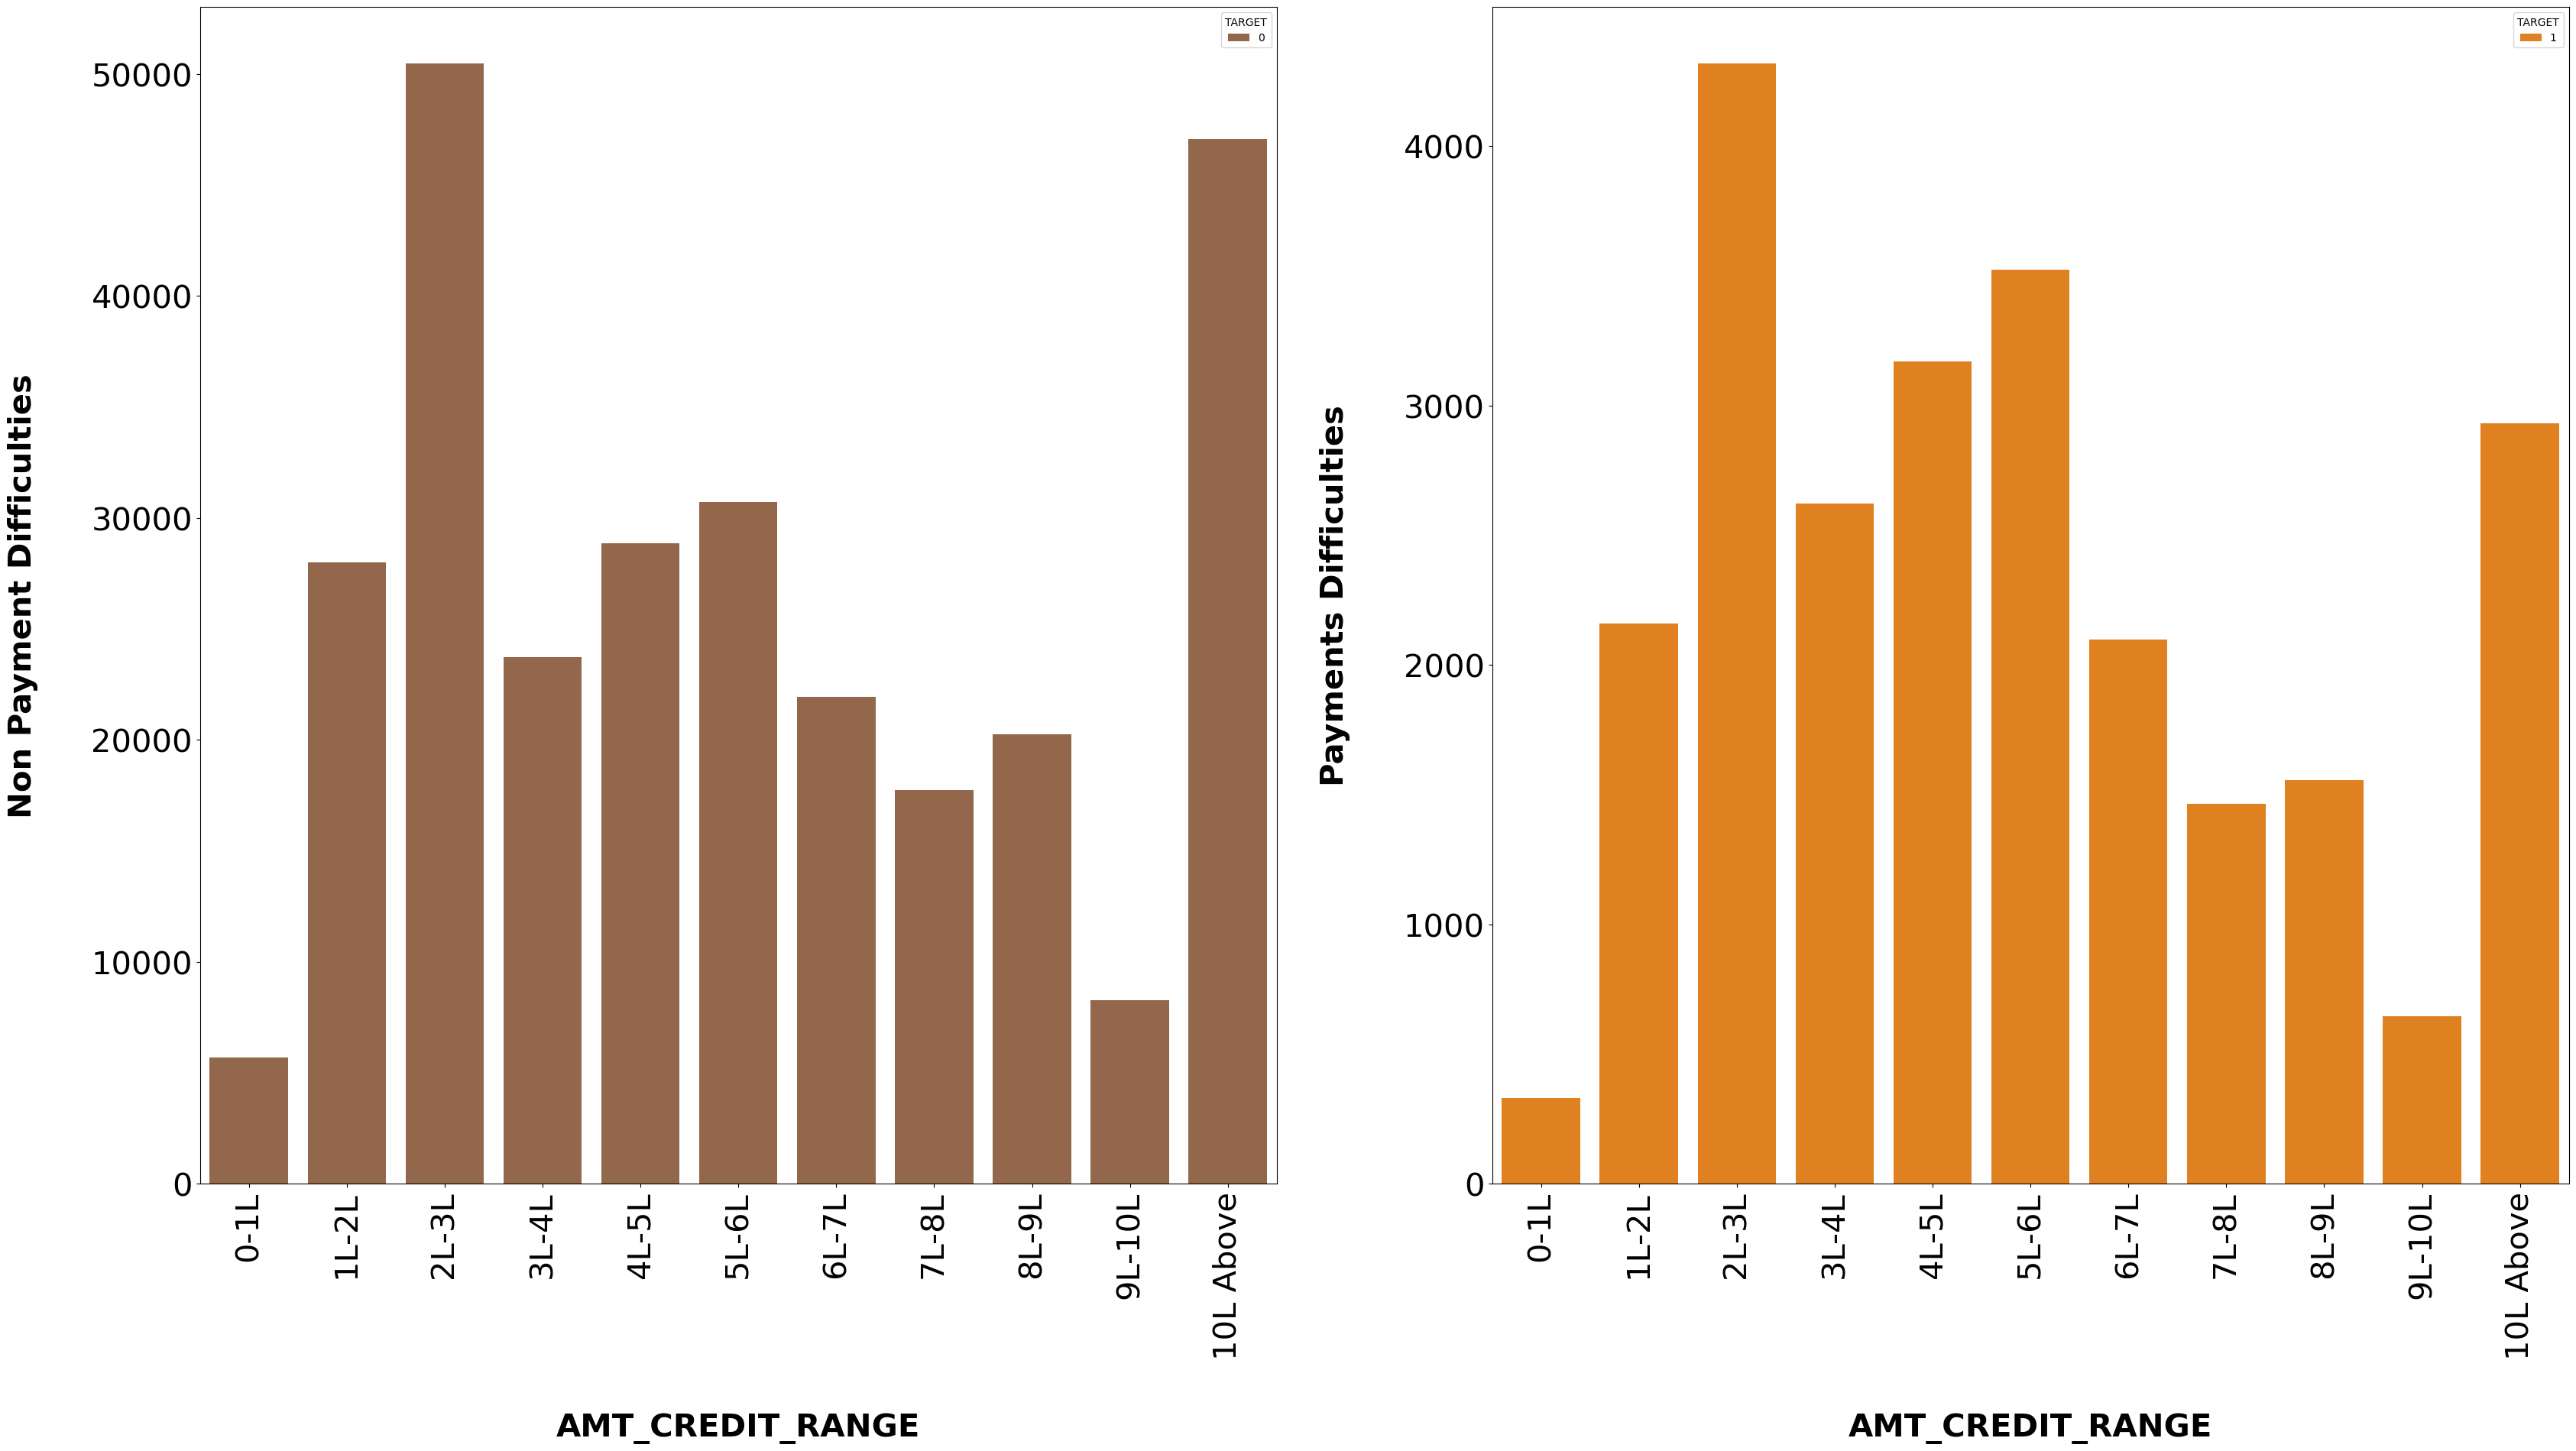

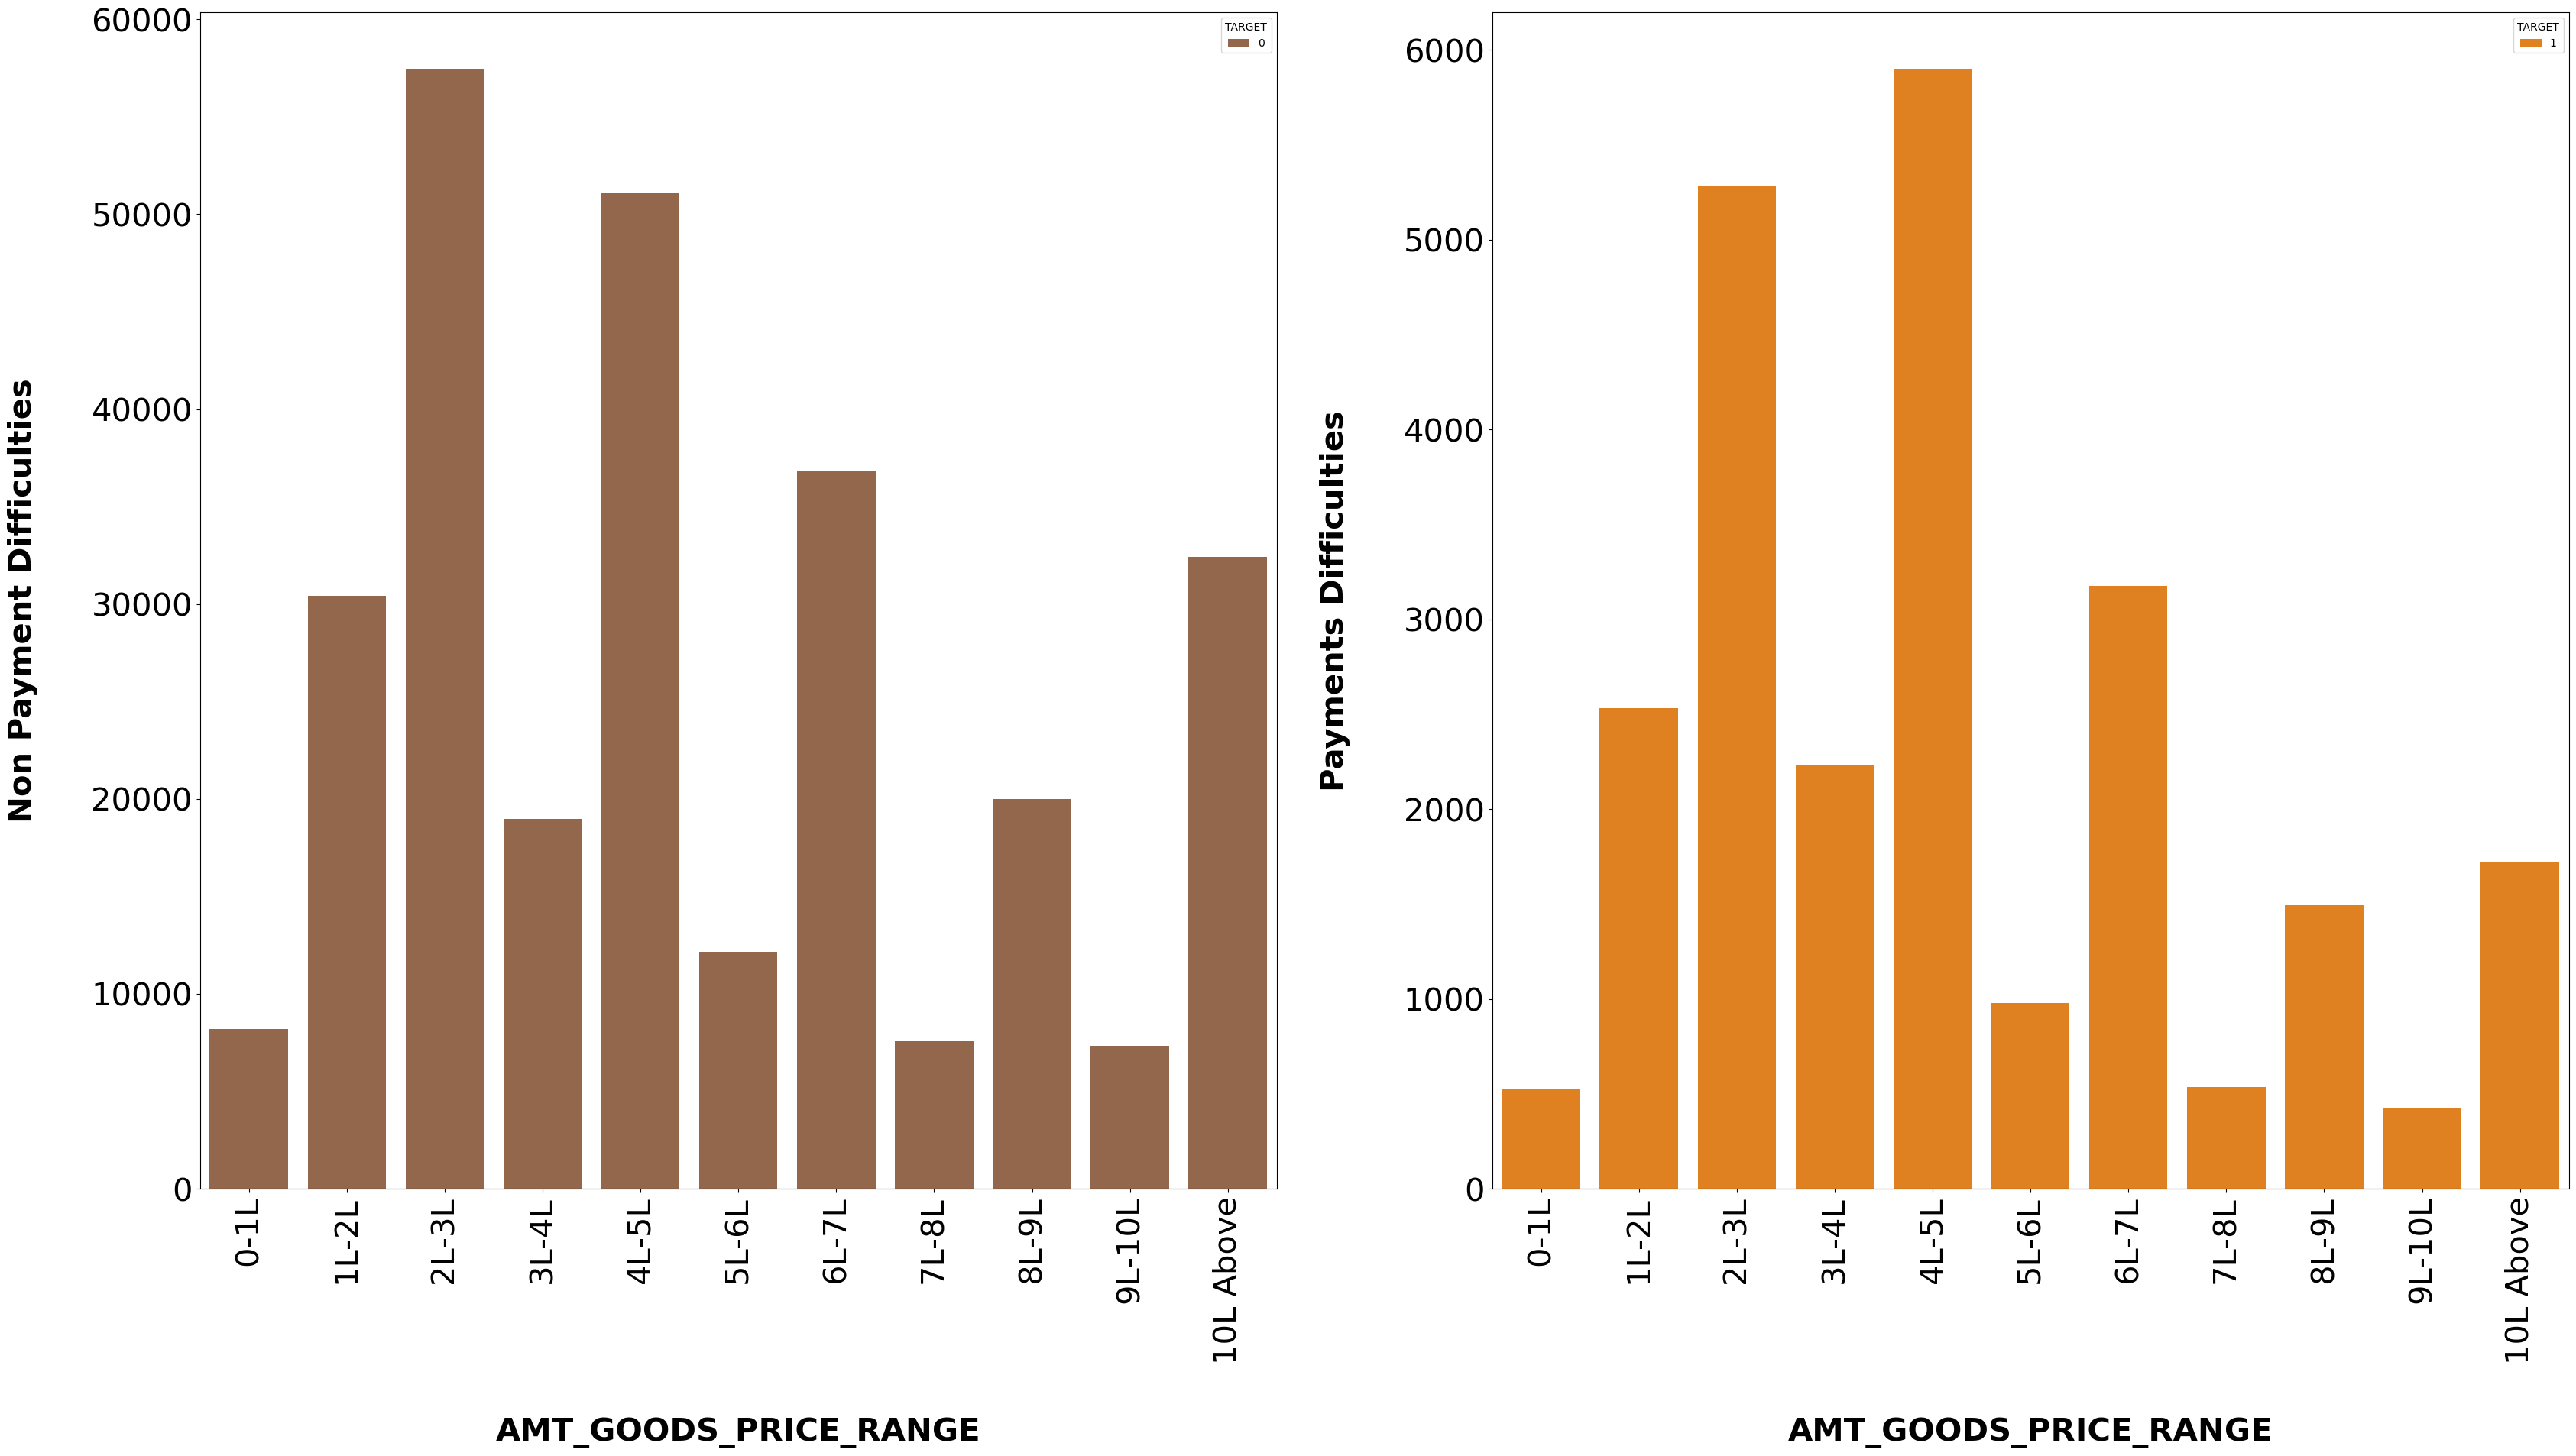

In [86]:
for cat in categorical_col:
    categorical_plot(cat, Target0, Target1)

***Examination of Loan Types in Loan Application Data Analysis:***

***--- Most applicants, both defaulters and non-defaulters, predominantly applied for Cash Loans, with a relatively small proportion opting for Revolving loans. The choice of loan type does not significantly impact the likelihood of default.***

***Analysis of Accompaniment during Loan Application Process:***

***--- The majority of clients were accompanied, either by someone else or a family member, during the loan application process. However, the presence of an accompanying person does not seem to have a discernible effect on default rates. Both defaulters and non-defaulters exhibit similar proportions in terms of accompanied applications.***

***Exploration of Applicant Income Types in Loan Application Data:***

***--- Applicants with income from Working, Commercial Associate, and Pensioner categories are more likely to apply for loans, with the working class being the most prominent.***

***--- Businessmen, students, and unemployed individuals are less likely to apply. Interestingly, the Working class faces a higher risk of default, while State Servants exhibit minimal default risk.***

***Educational Background Analysis in Loan Application Data:***

***--- Clients with Secondary or Secondary Special education are more inclined to apply for loans. However, this group also faces a higher risk of default, while other education categories show minimal risk.***

***Analysis of Family Status in Loan Application:***

***--- Married clients have the highest loan application rate, and in the case of defaulters, those with a single relationship status pose less risk. Widows, on the other hand, show minimal default risk.***

***Housing Situation Analysis in Loan Application:***

***--- Most applicants, regardless of default status, own a house or live in an apartment. Housing type doesn't seem to be a significant factor influencing default rates.***

***Occupational Analysis in Loan Application:***

***--- Unknown lead in loan applications for both defaulters and non-defaulters. Unknown and laborers face a higher risk of default, with pensioners having the highest risk***

***Evaluation of Loan Application Timing by Weekday:***

***--- There is no considerable difference in loan application patterns on different days of the week for both defaulters and non-defaulters.***

***Assessment of Applicant Income Levels in Loan Application:***

***--- Applicants with a medium salary range are more likely to apply for loans. However, those with low and medium incomes are at a higher risk of default.***

***Evaluation of Credit Amounts in Loan Application:***

***--- The majority of clients apply for loans with a medium credit amount. Clients applying for both high and low credit amounts are at a higher risk of default.***

# Univariate Analysis of Numerical Columns with Respect to Loan Payment Difficulties

***--- Univariate Analysis of Numerical Columns W.R.T Target Variable involves exploring the distribution of individual numerical features in the dataset with respect to the target variable.***

***--- This analysis aims to uncover patterns, trends, and differences in the numerical characteristics of the data based on the target variable, which typically represents a binary outcome (e.g., Default or Non-Default).***

***--- For each numerical column, we create visualizations that illustrate the distribution of values for both Target 0 and Target 1.***

***--- The primary goal is to identify any discernible patterns or differences in the distribution of numerical data between applicants who experienced payment difficulties and those who did not.***

In [87]:
# Comparison of Numerical Feature Distribution in Loan Applicants with and without Payment Difficulties

def uni(col):
    sns.set(style="darkgrid")
    plt.figure(figsize=(40, 20))

    plt.subplot(1, 2, 1)
    sns.boxenplot(x='TARGET', y=col, data=Target0, palette='afmhot')
    plt.xlabel('TARGET', fontsize=30, fontweight="bold")
    plt.ylabel(col, fontsize=30, fontweight="bold")
    plt.title('Distribution in Non-Payment Difficulties', fontsize=30, fontweight="bold")

    plt.subplot(1, 2, 2)
    sns.boxenplot(x='TARGET', y=col, data=Target1, palette='gist_yarg')
    plt.xlabel('TARGET', fontsize=30, fontweight="bold")
    plt.ylabel(col, fontsize=30, fontweight="bold")
    plt.title('Distribution in Payment Difficulties', fontsize=30, fontweight="bold")

    plt.show()

***Boxen Plot***

***--- Using a boxen plot for univariate analysis allows to visually explore and interpret the distribution of a single numerical variable with enhanced detail, making it a valuable tool in understanding the characteristics of the data.***

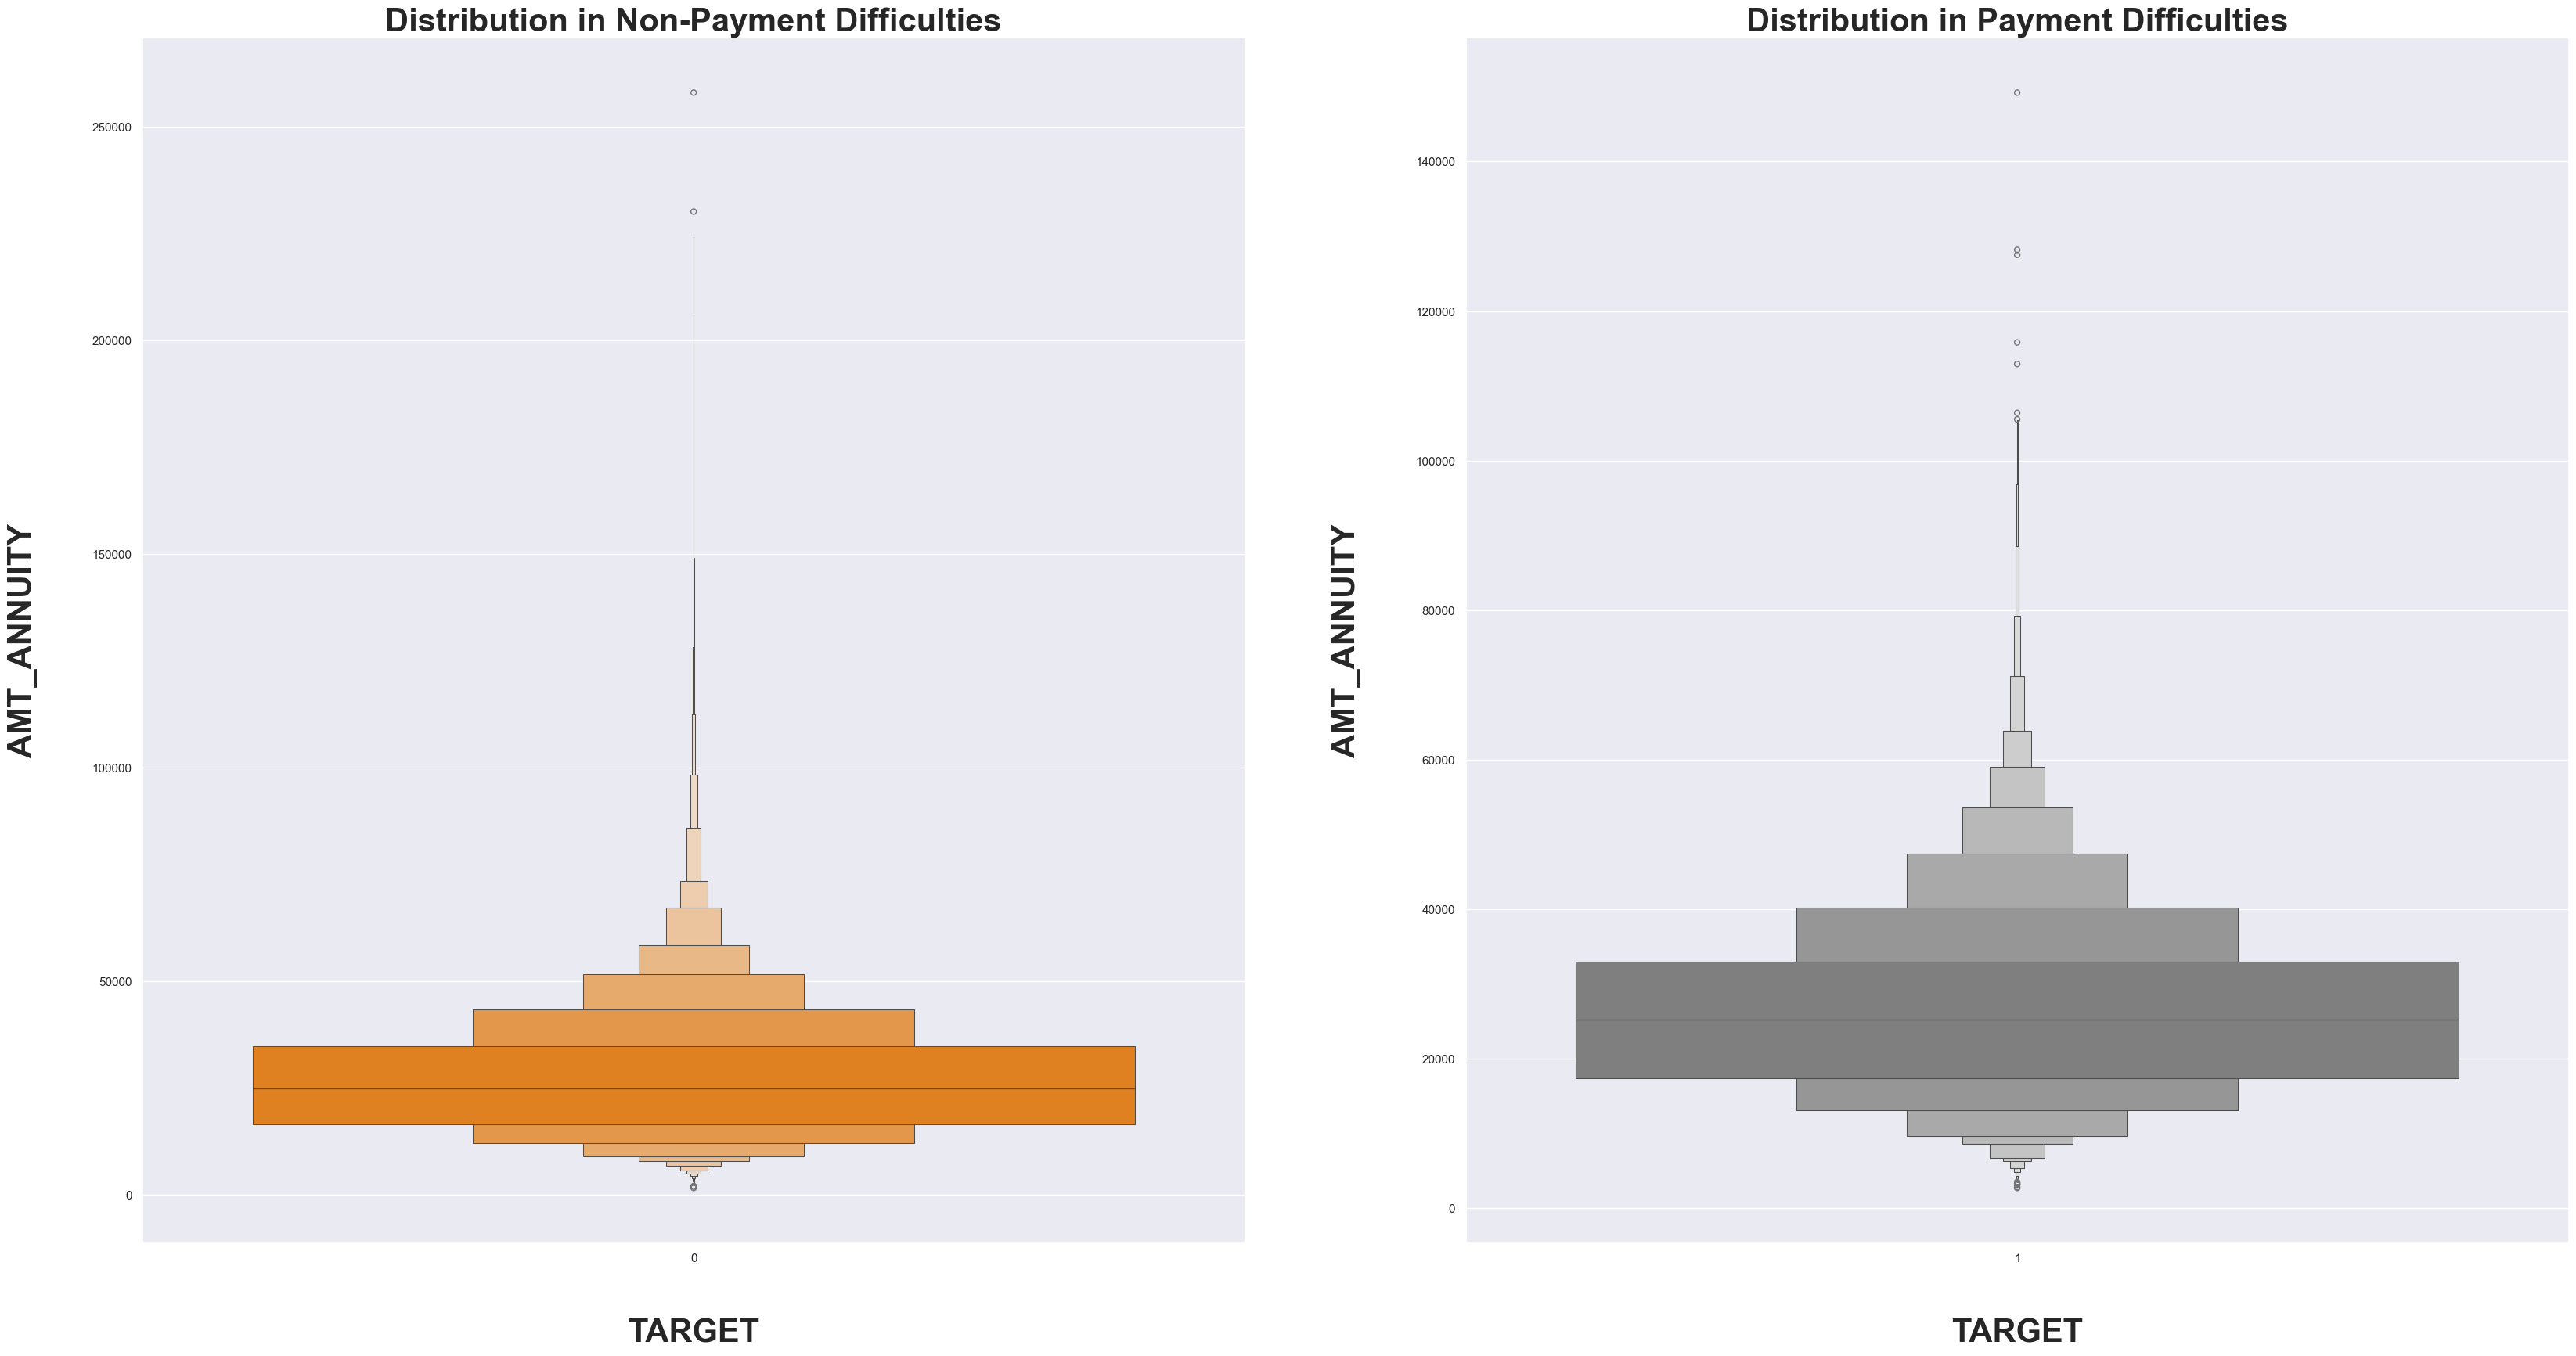

In [88]:
uni(col='AMT_ANNUITY')

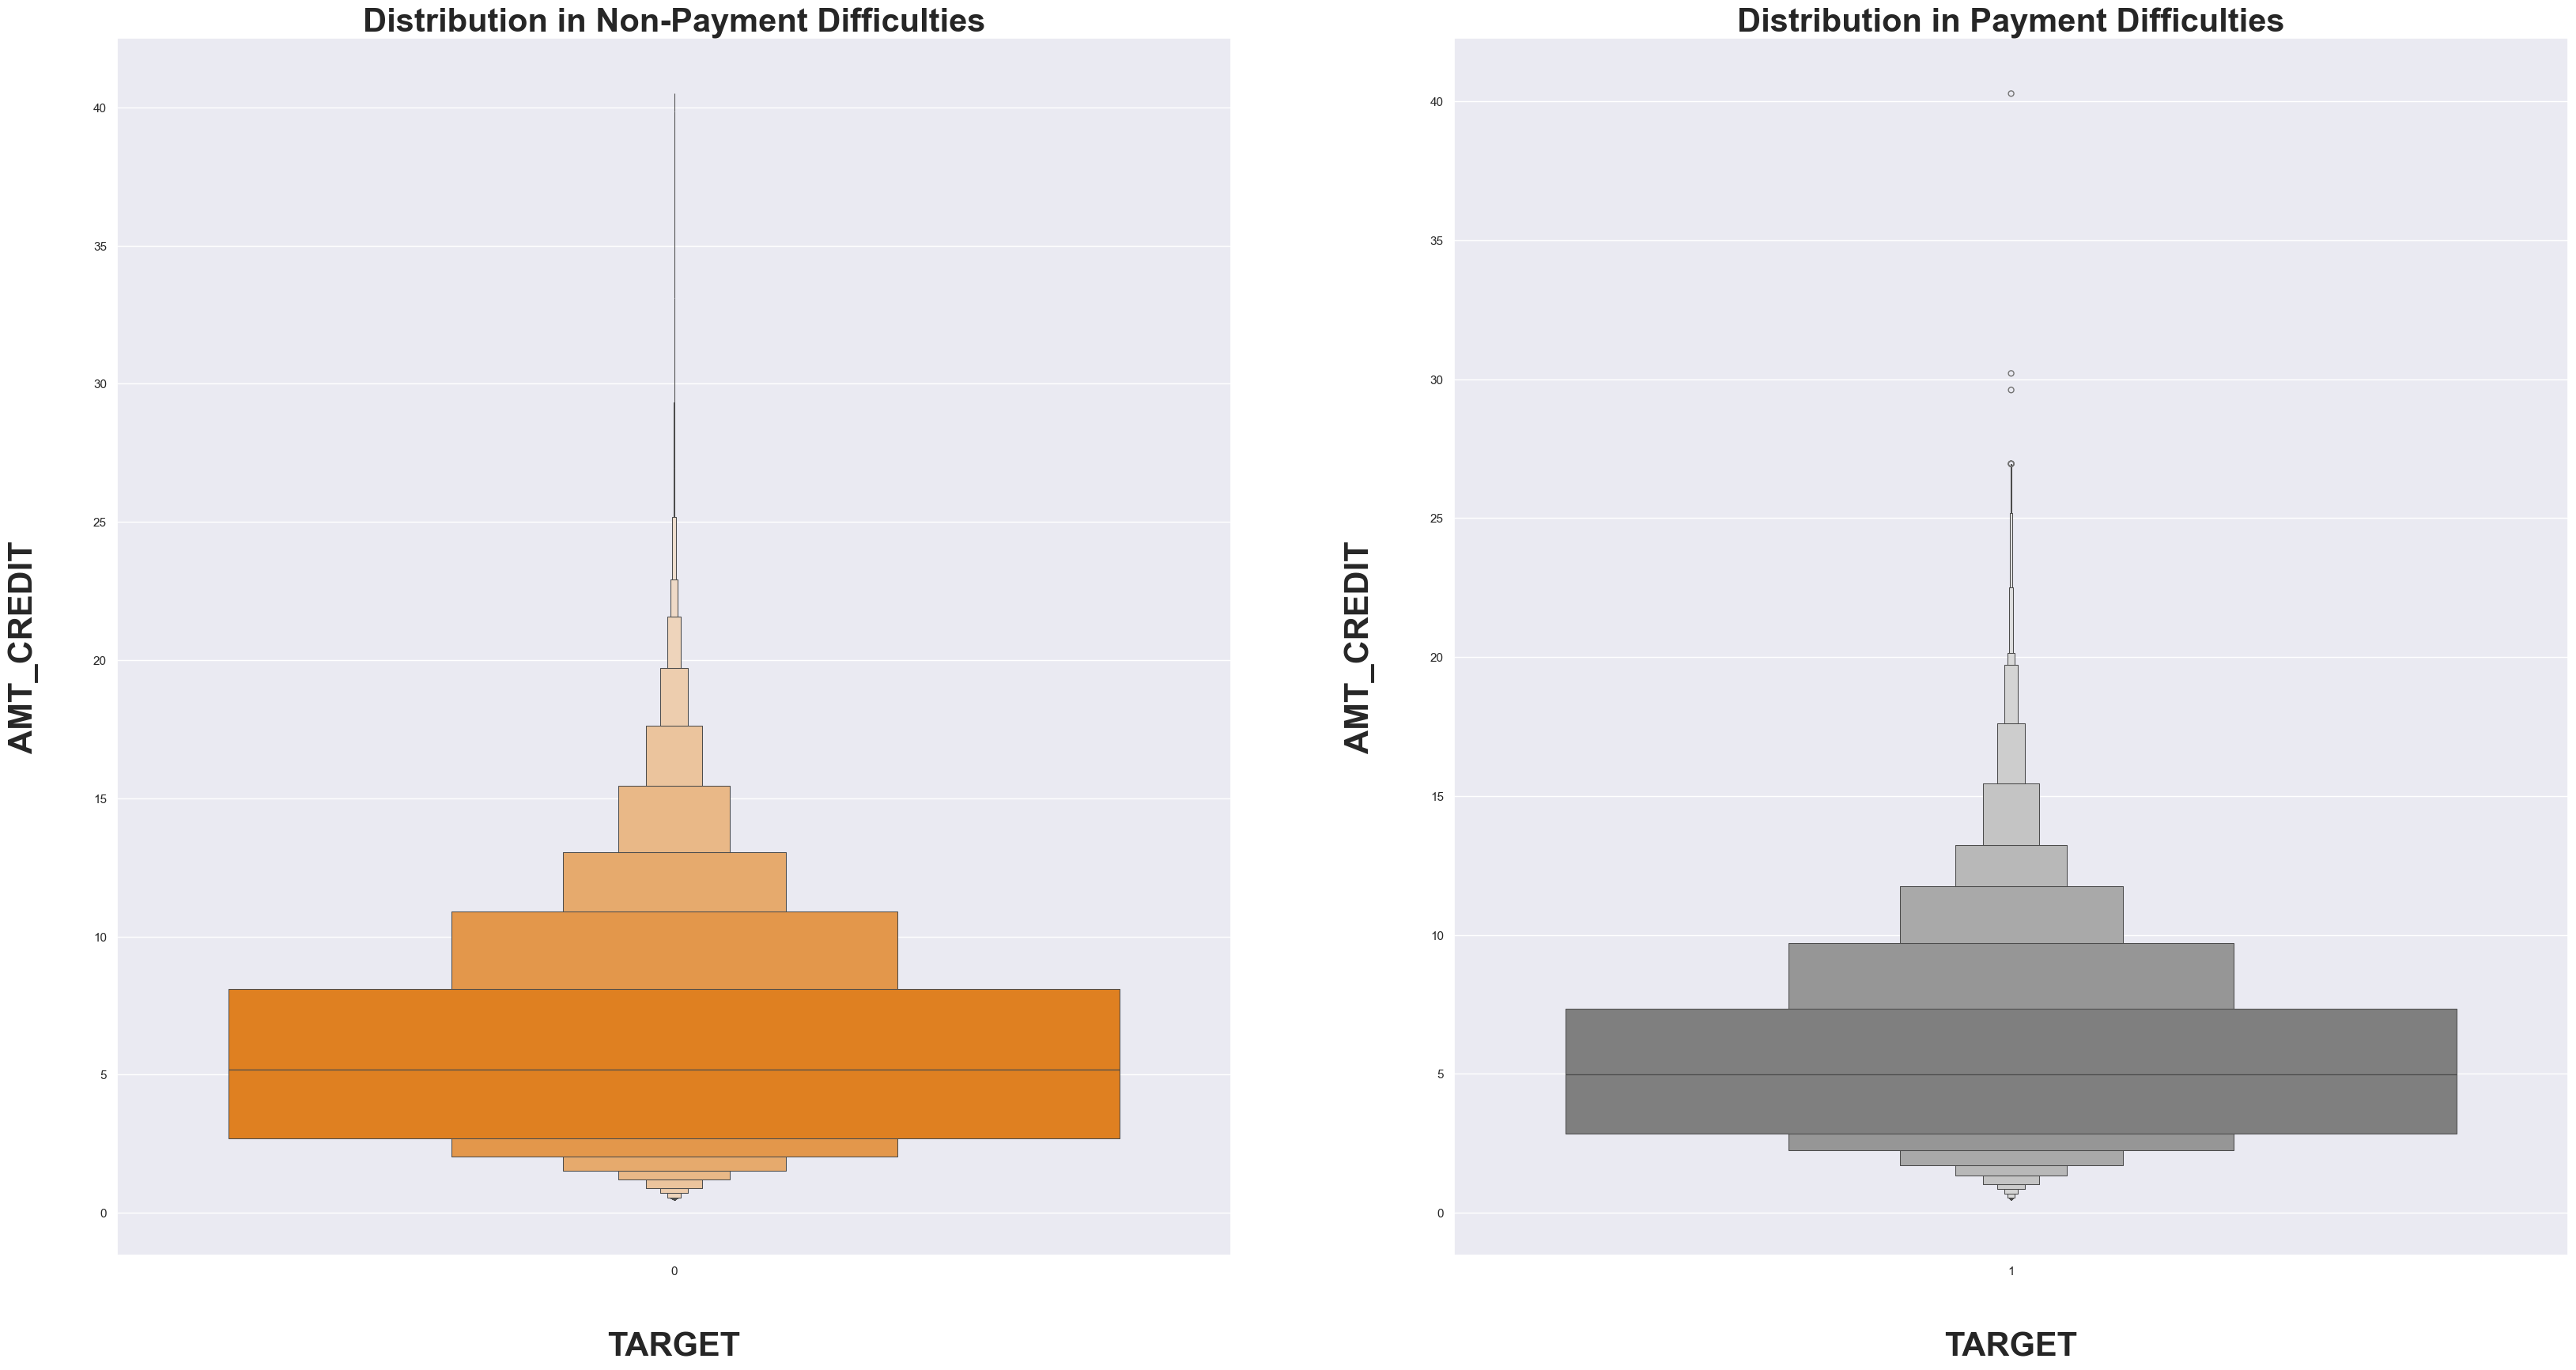

In [89]:
uni(col='AMT_CREDIT')

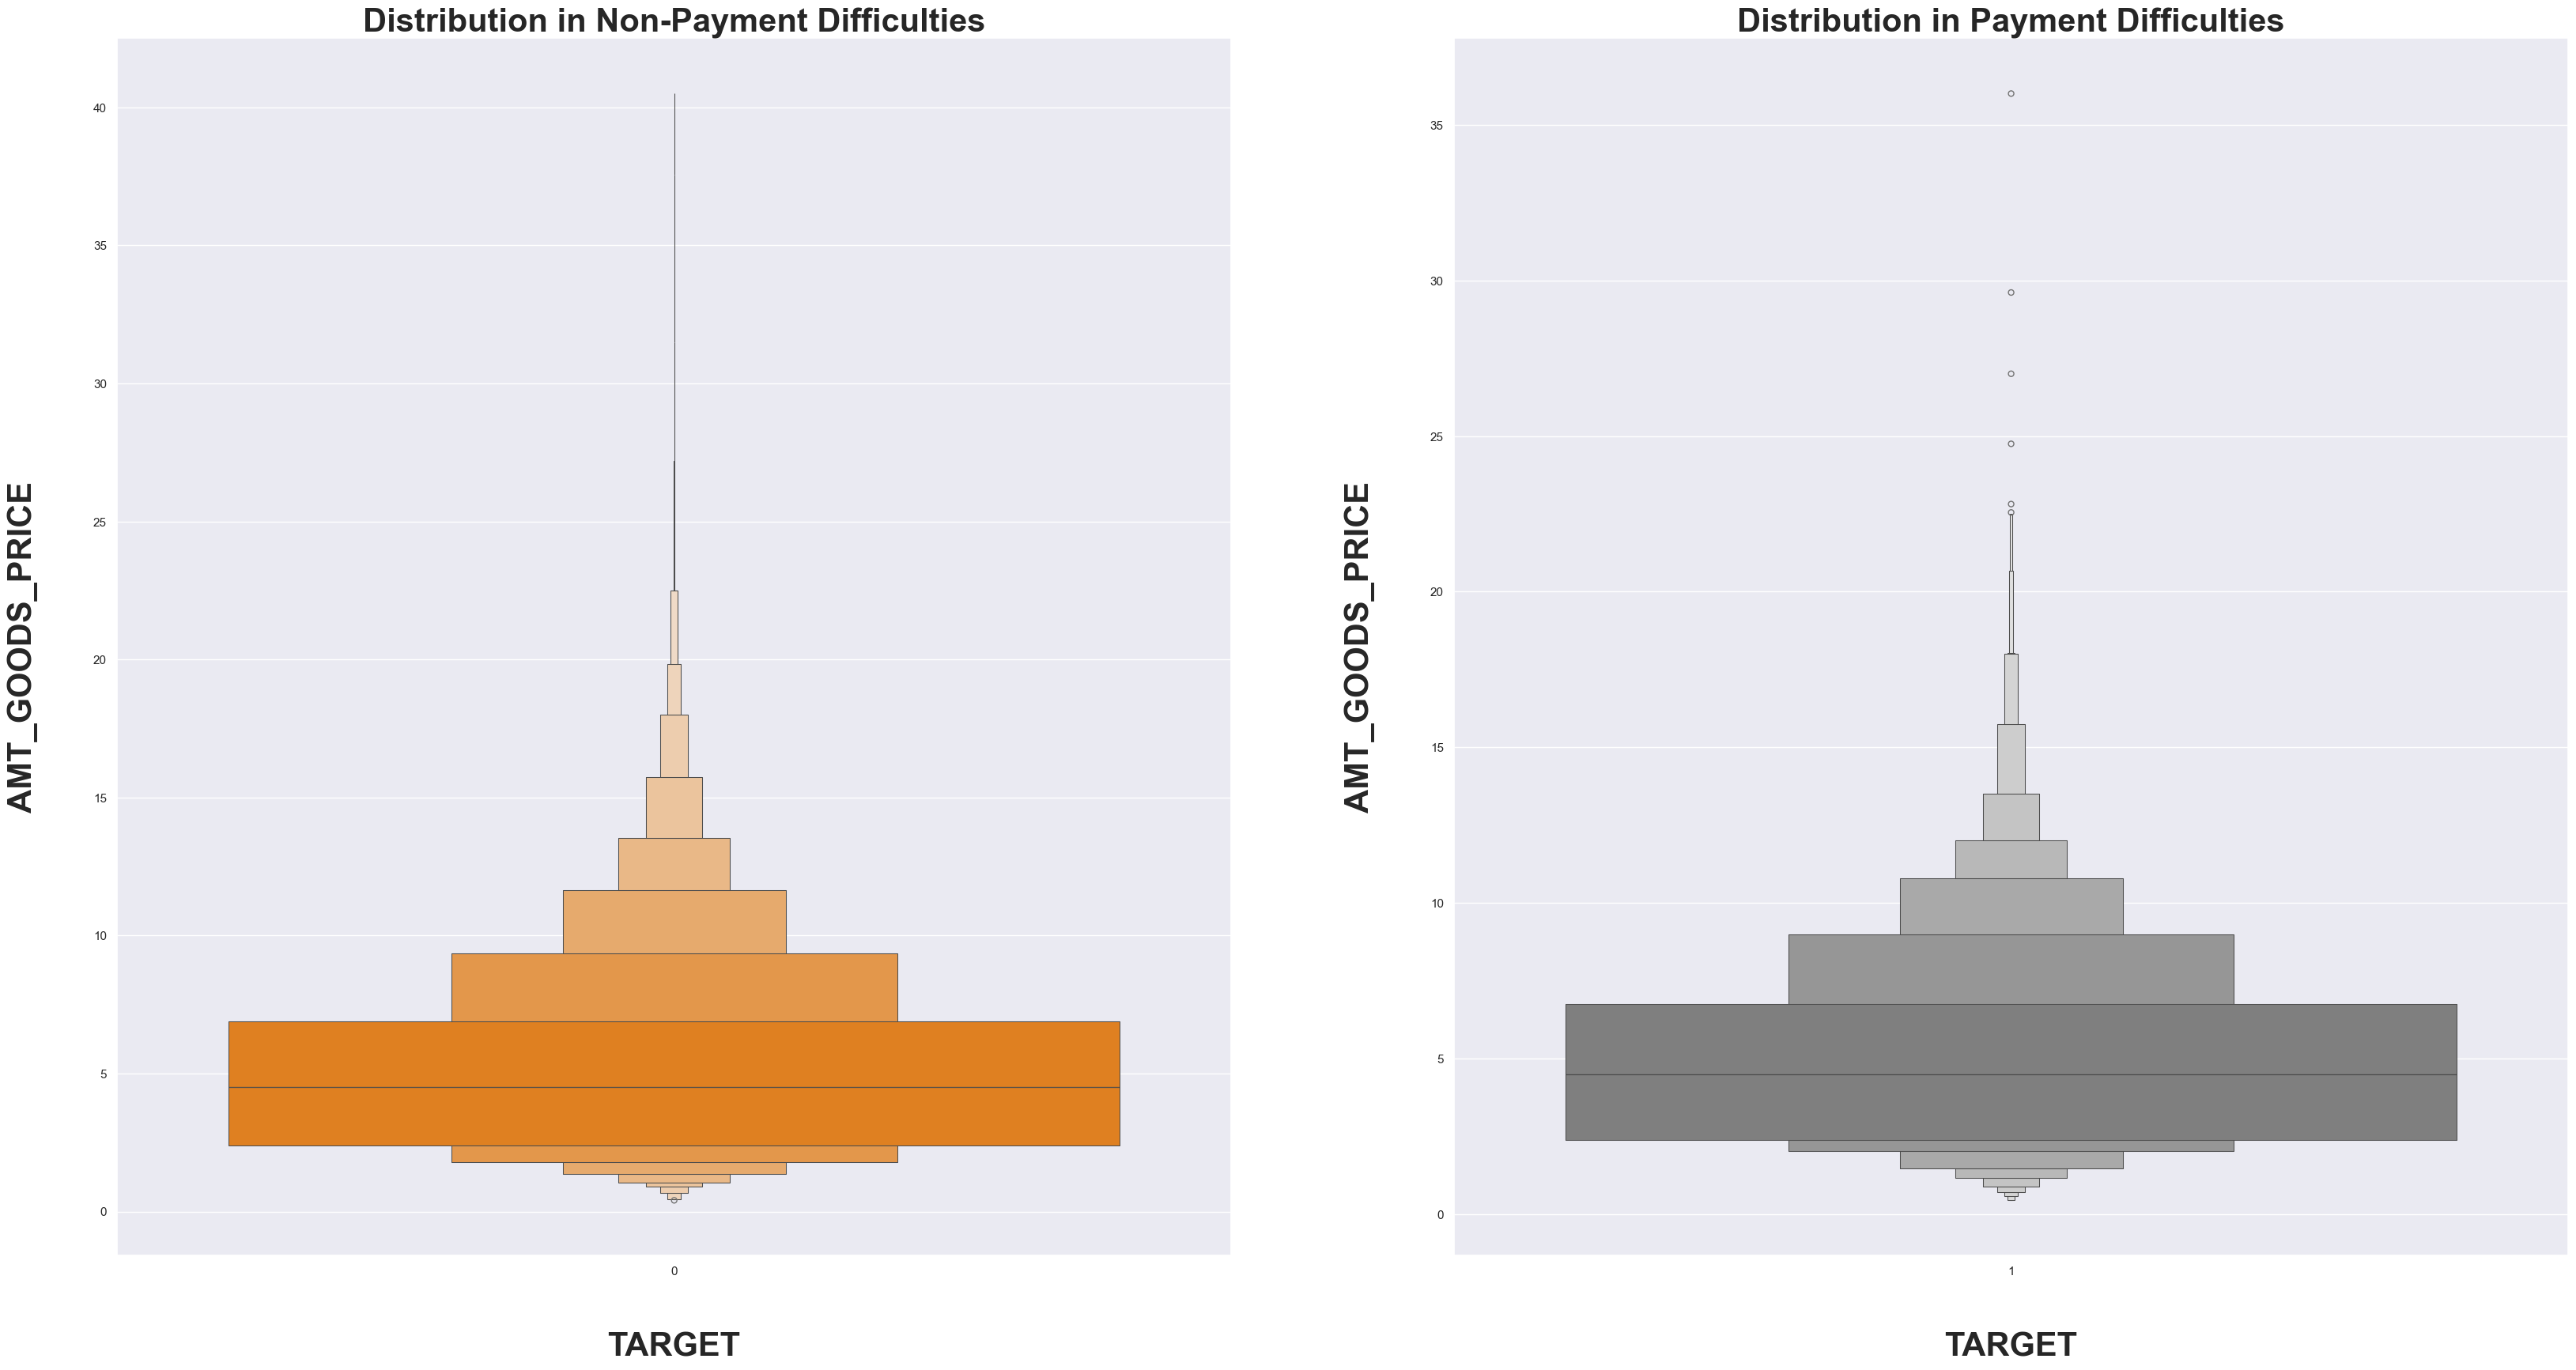

In [90]:
uni(col='AMT_GOODS_PRICE')


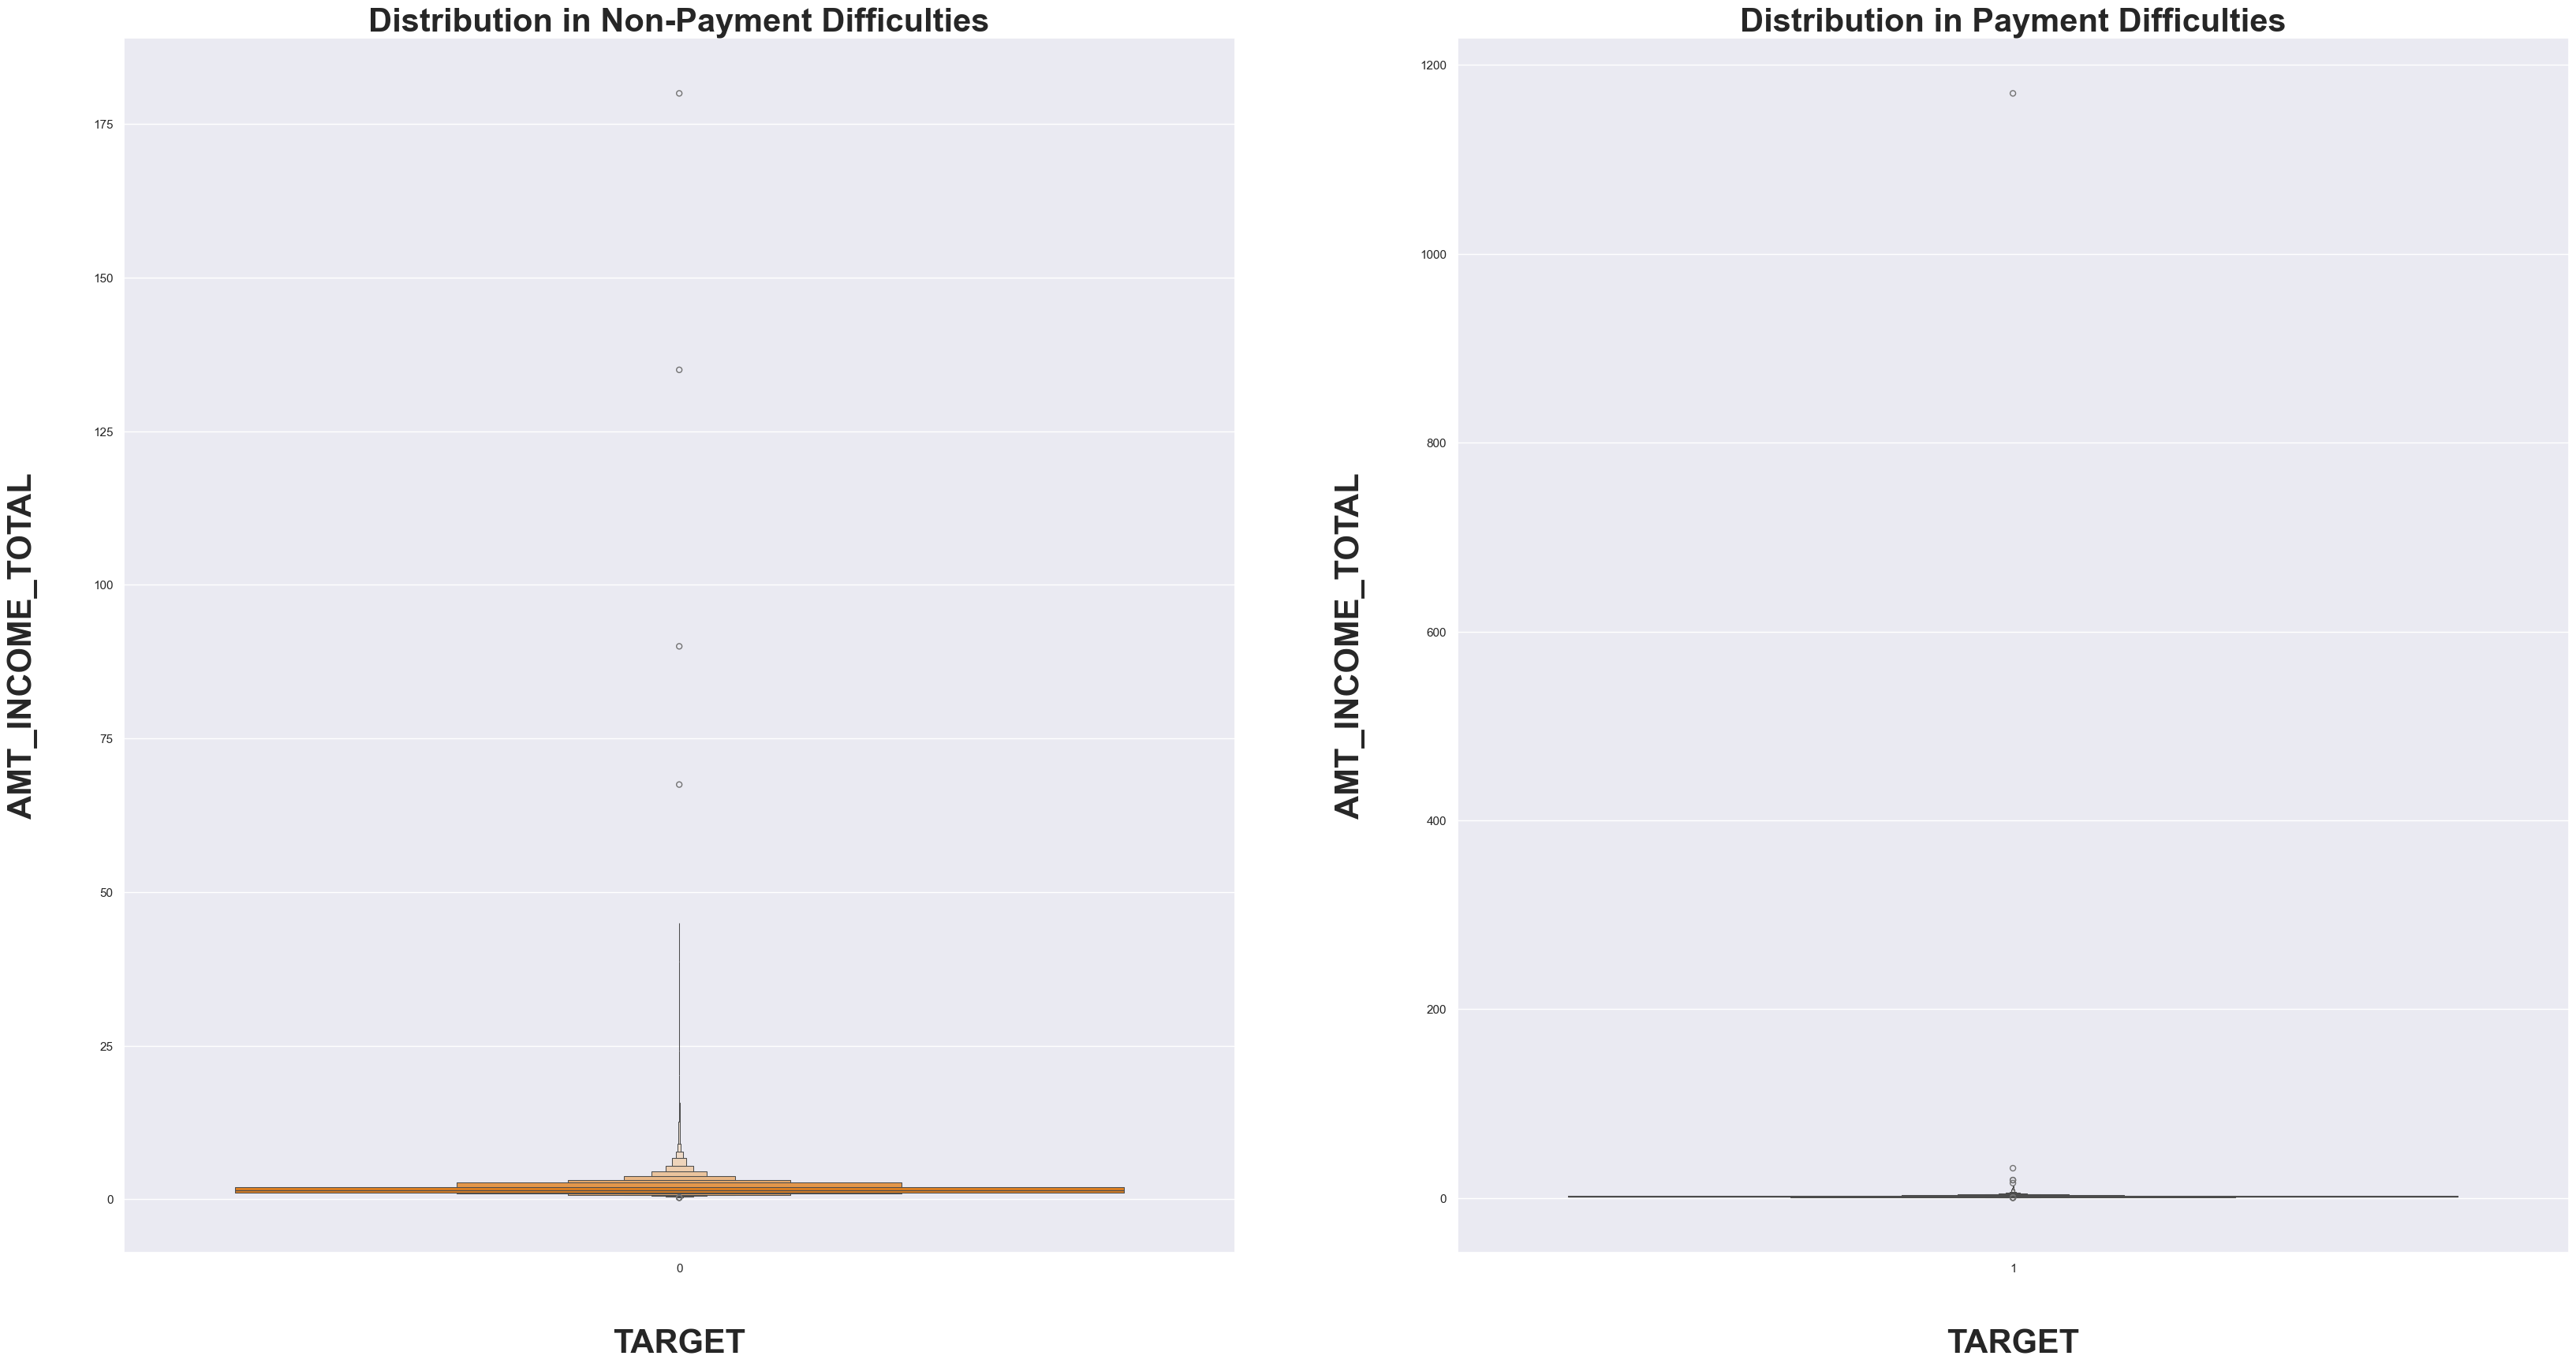

In [91]:
uni(col='AMT_INCOME_TOTAL')

***Boxen Plot Analysis:***

***Observation:***

***--- Boxen plots reveal distinct patterns in income, annuity, credit, and goods price for both Target 0 and Target 1.***

***Income Total:***

***--- The boxen plot for Target 1 exhibits a more staggered and wider distribution compared to Target 0, indicating greater variability in income among individuals facing payment difficulties.***

***Annuity, Credit, and Goods Price:***

***--- Similar boxen plot shapes for Target 0 and Target 1 suggest comparable distributions of annuity, credit, and goods price across both groups***

***Overall Shape:***

***--- The wider curve shape in the boxen plot for Target 1 signifies a broader and more spread-out distribution, implying higher variability in these financial metrics among individuals experiencing payment difficulties.***

***Well-Defined Edges:***

***--- The narrower and well-defined edges in the boxen plot for Target 0 suggest a more concentrated and predictable distribution in comparison to Target 1.***

***--- In summary, the boxen plot analysis provides a detailed view of the distributional characteristics of financial metrics, highlighting differences between individuals with and without payment difficulties.***

# Bivariate Categorical Analysis: 

***Distribution of Amount Income Range and Loan-Payment Difficulties:***

***--- The objective of this bivariate categorical analysis is to explore the relationship between the "Amount Income Range" category and the likelihood of loan-payment difficulties, represented by the "Loan-Payment Difficulties" variable.***

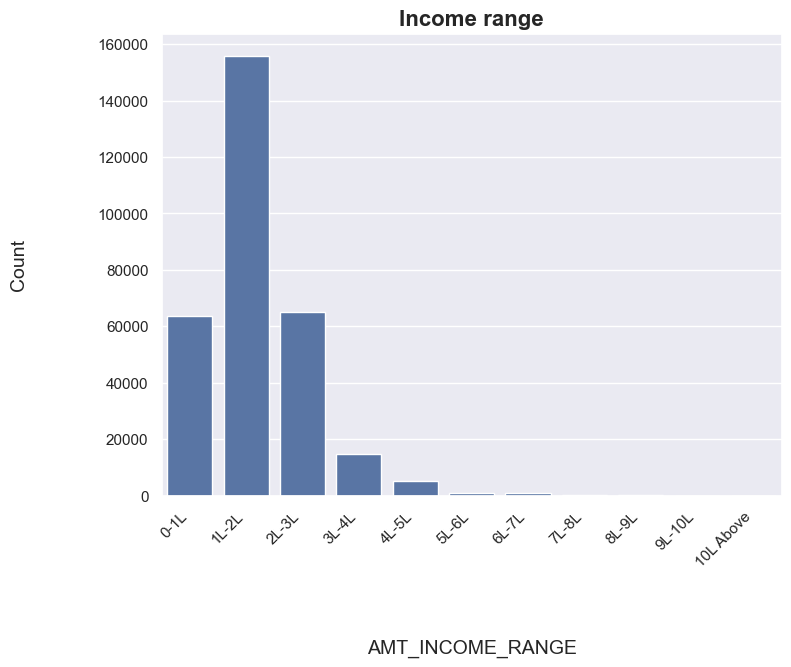

In [92]:
# #Distribution of Amount Income Range and the category with maximum % Loan-Payment Difficulties

def biplot(df, feature, title):
    plt.figure(figsize=(8, 6))

    # Check if the feature exists in the DataFrame
    if feature not in df.columns:
        print(f"Error: '{feature}' not found in the DataFrame columns.")
        return

    # Create a count plot
    sns.countplot(x=feature, data=df)
    
    plt.title(title, fontsize=16, fontweight="bold")
    plt.xlabel(feature, fontsize=14)
    plt.ylabel("Count", fontsize=14)
    
    # Rotate x-axis labels for better visibility
    plt.xticks(rotation=45, ha='right')
    
    # Show the plot
    plt.show()

biplot(df_appdata, 'AMT_INCOME_RANGE', 'Income range')

***Distribution of Type of Income and Loan-Payment Difficulties:***

***--- The objective of this bivariate categorical analysis is to explore the relationship between the "Type of Income" category and the likelihood of loan-payment difficulties, represented by the "Loan-Payment Difficulties" variable.***

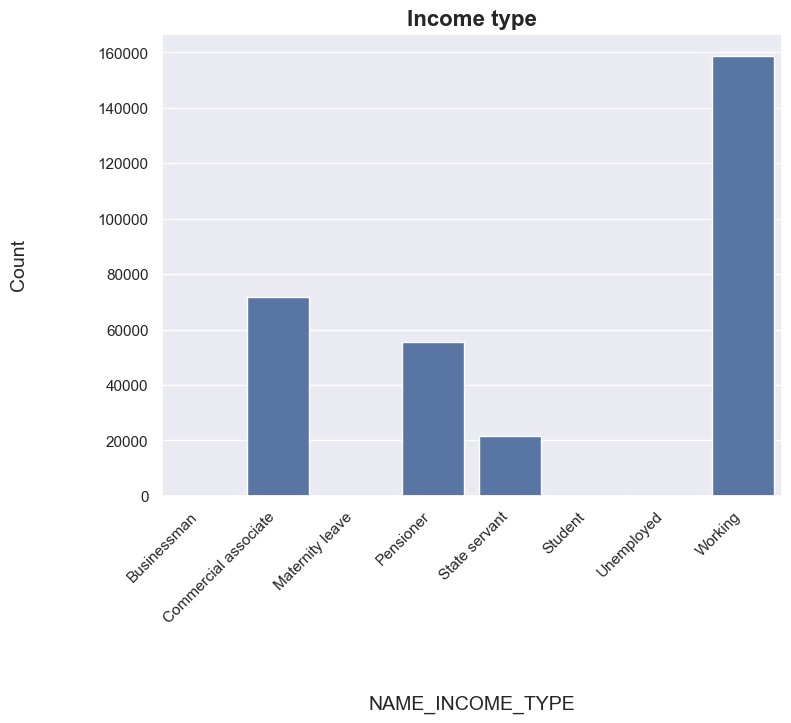

In [93]:
# Distribution of Type of Income and the category with maximum Loan-Payment Difficulties

biplot(df_appdata, 'NAME_INCOME_TYPE', 'Income type')

***Distribution of Contract Type and Loan-Payment Difficulties:***

***--- The objective of this bivariate categorical analysis is to explore the relationship between the "Contract Type" category and the likelihood of loan-payment difficulties, represented by the "Loan-Payment Difficulties" variable.***

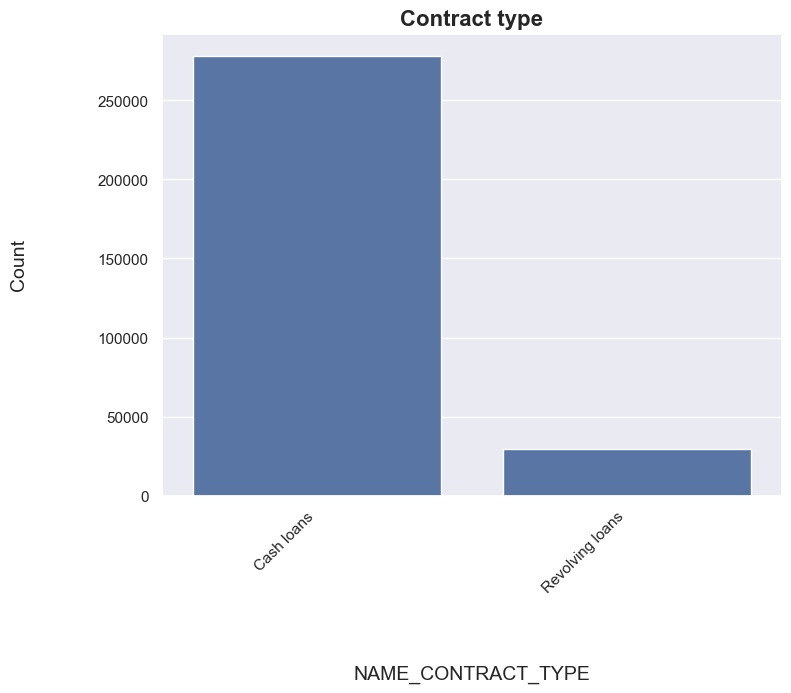

In [94]:
# Distribution of Contract Type and the category with maximum Loan-Payment Difficulties

biplot(df_appdata, 'NAME_CONTRACT_TYPE', 'Contract type')

***Distribution of Education Type and Loan-Payment Difficulties:***

***--- The objective of this bivariate categorical analysis is to explore the relationship between the "Education Type" category and the likelihood of loan-payment difficulties, represented by the "Loan-Payment Difficulties" variable.***

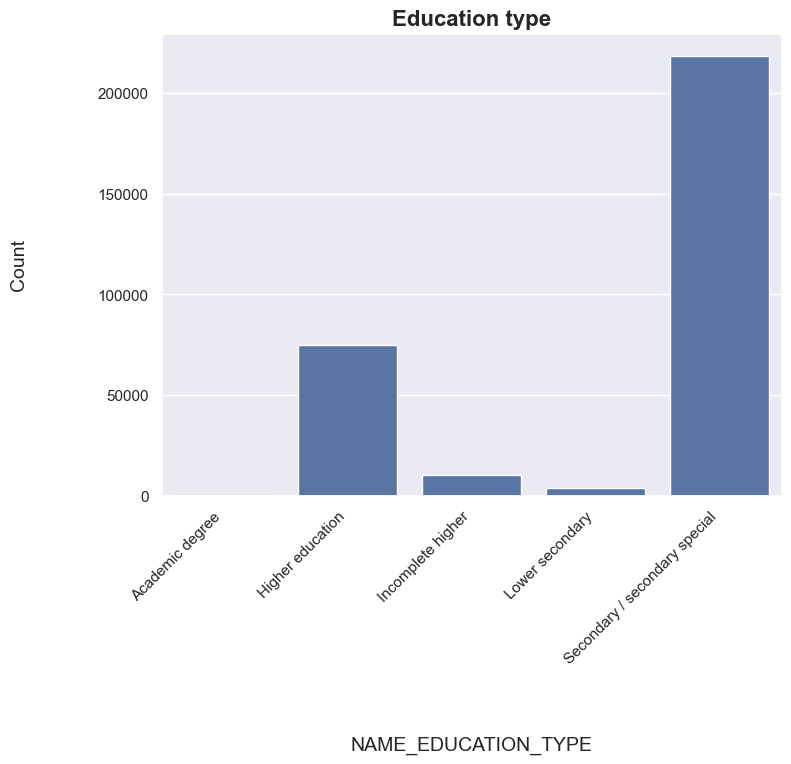

In [95]:
# Distribution of Education Type and the category with maximum Loan-Payment Difficulties
    
biplot(df_appdata, 'NAME_EDUCATION_TYPE', 'Education type')

***Distribution of Occupation Type and Loan-Payment Difficulties:***

***--- The objective of this bivariate categorical analysis is to explore the relationship between the "Occupation Type" category and the likelihood of loan-payment difficulties, represented by the "Loan-Payment Difficulties" variable.***

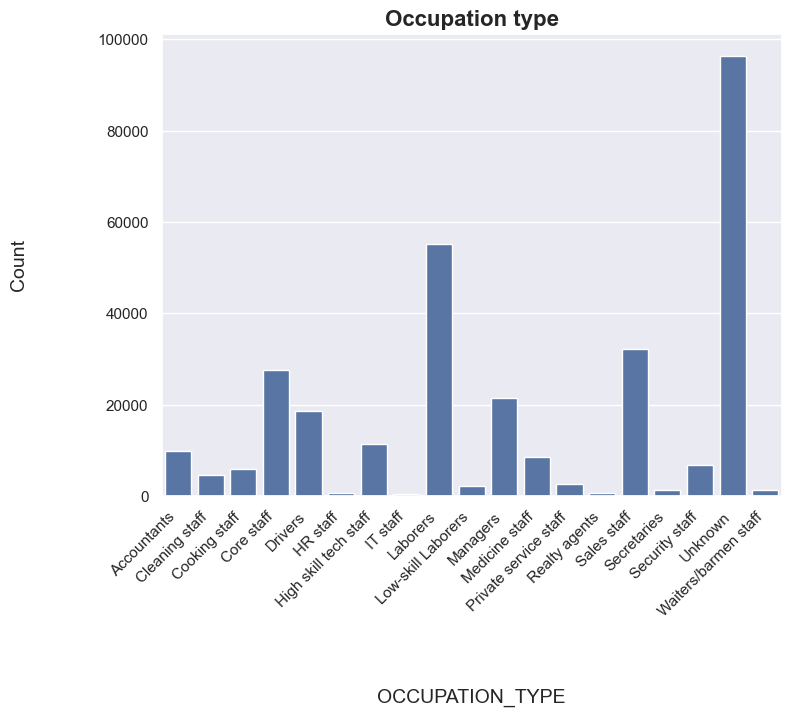

In [96]:
# Distribution of Occupation Type and the category with maximum Loan-Payment Difficulties

biplot(df_appdata, 'OCCUPATION_TYPE', 'Occupation type')

# Bivariate Analysis: Numerical and Categorical Variables in Relation to Target Variables

In [97]:
# Exploring the relationship between the target variable and key features, including income, education type, and 
# family status in the DataFrame df_appdata. 

df_appdata[["TARGET","AMT_INCOME_TOTAL","NAME_EDUCATION_TYPE","NAME_FAMILY_STATUS"]]

TARGET  AMT_INCOME_TOTAL            NAME_EDUCATION_TYPE  \
0            1             2.025  Secondary / secondary special   
1            0             2.700               Higher education   
2            0             0.675  Secondary / secondary special   
3            0             1.350  Secondary / secondary special   
4            0             1.215  Secondary / secondary special   
...        ...               ...                            ...   
307506       0             1.575  Secondary / secondary special   
307507       0             0.720  Secondary / secondary special   
307508       0             1.530               Higher education   
307509       1             1.710  Secondary / secondary special   
307510       0             1.575               Higher education   

          NAME_FAMILY_STATUS  
0       Single / not married  
1                    Married  
2       Single / not married  
3             Civil marriage  
4       Single / not married  
...                      ...  
307506             Separated  
307507                 Widow  
307508             Separated  
307509               Married  
307510               Married  

[307511 rows x 4 columns]

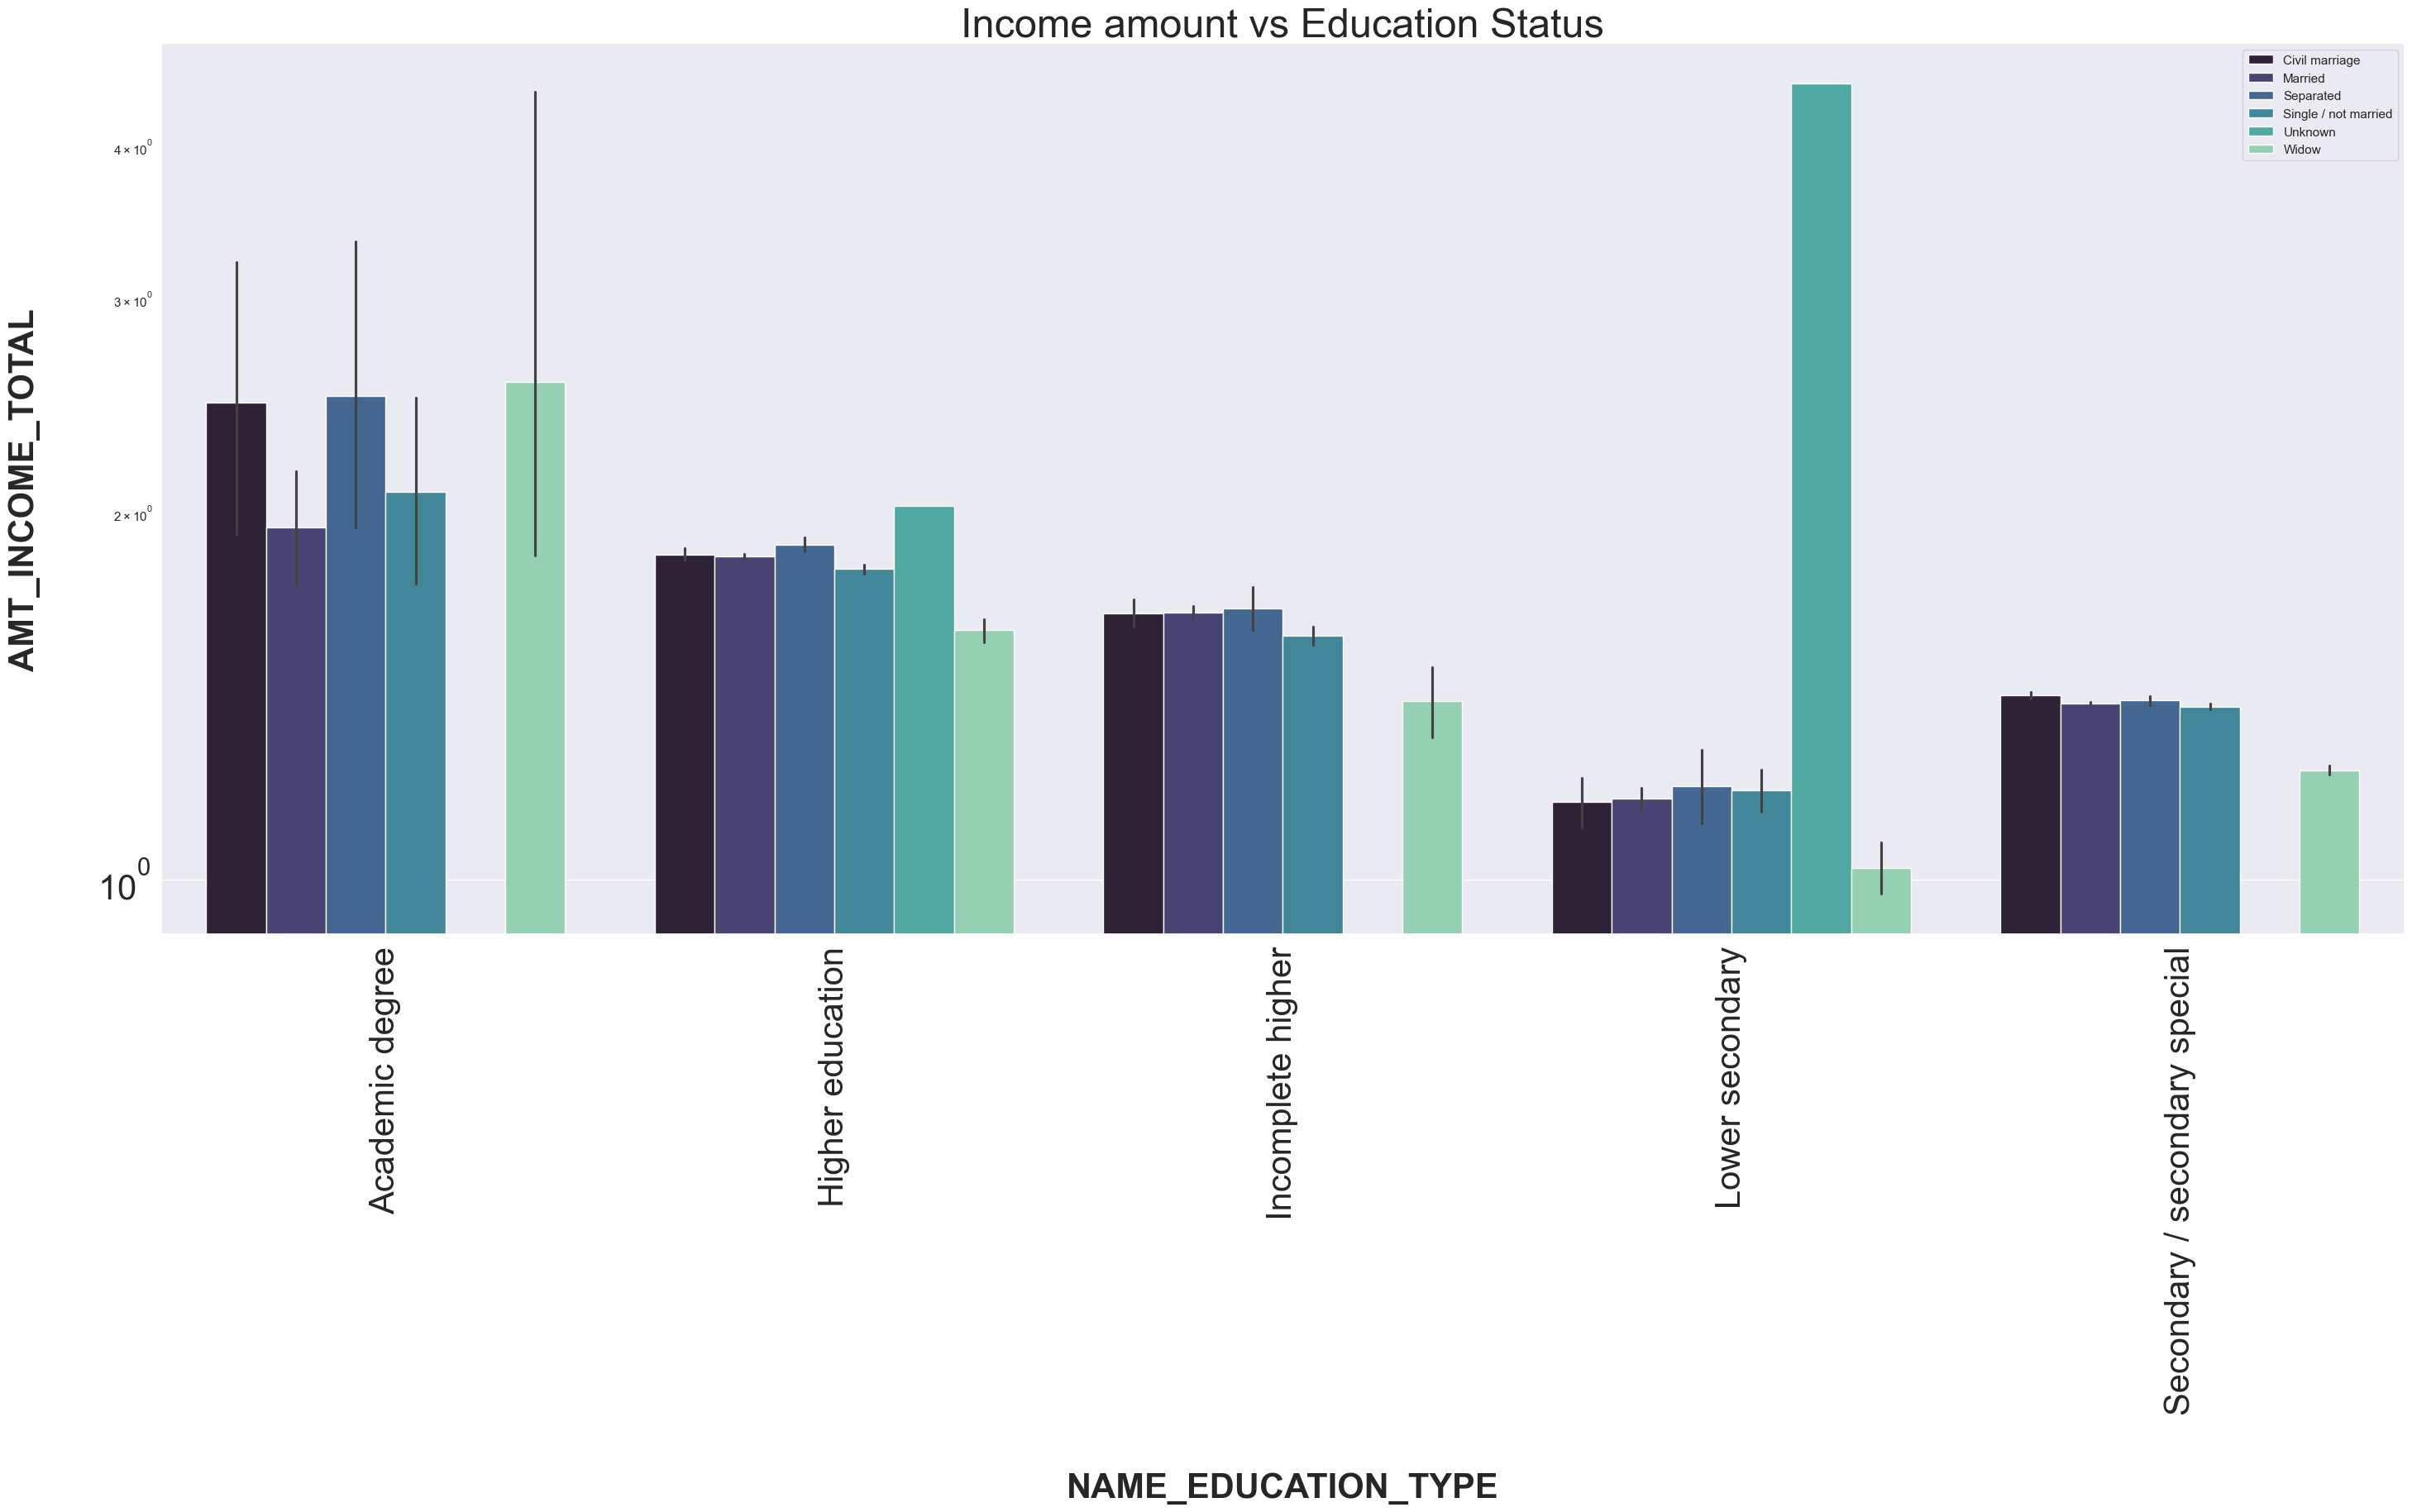

In [98]:
# Income Disparities Across Education Levels and Family Status

plt.figure(figsize=(35,14)) 
plt.yscale('log')                     #As the values are too large, it is convinient to use log for better analysis
plt.xticks(rotation = 90)


sns.barplot(data =Target0, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', 
            hue ='NAME_FAMILY_STATUS',orient='v',palette='mako')


plt.legend( loc = 'upper right')                                              
plt.title('Income amount vs Education Status',fontsize=35 )
plt.xlabel("NAME_EDUCATION_TYPE",fontsize= 30, fontweight="bold")
plt.ylabel("AMT_INCOME_TOTAL",fontsize= 30, fontweight="bold")
plt.xticks(rotation=90, fontsize=30)
plt.yticks(rotation=360, fontsize=30)

plt.show()

***Insights***

***--- Widow clients with academic degrees exhibit few outliers, lacking both the first and third quartiles.***

***--- Among various family statuses, those with academic degrees generally have fewer outliers compared to other education types.***

***--- In terms of income, clients with higher education, incomplete higher education, lower secondary education, and secondary/secondary special education tend to have incomes below the first quartile, with a notable number of outliers.***

***--- Interestingly, clients with higher education often have the highest incomes, while some clients without completed higher education also show higher incomes.***

***--- Additionally, clients with secondary/secondary special education can have higher incomes, indicating diverse income patterns among different education levels and family statuses.***

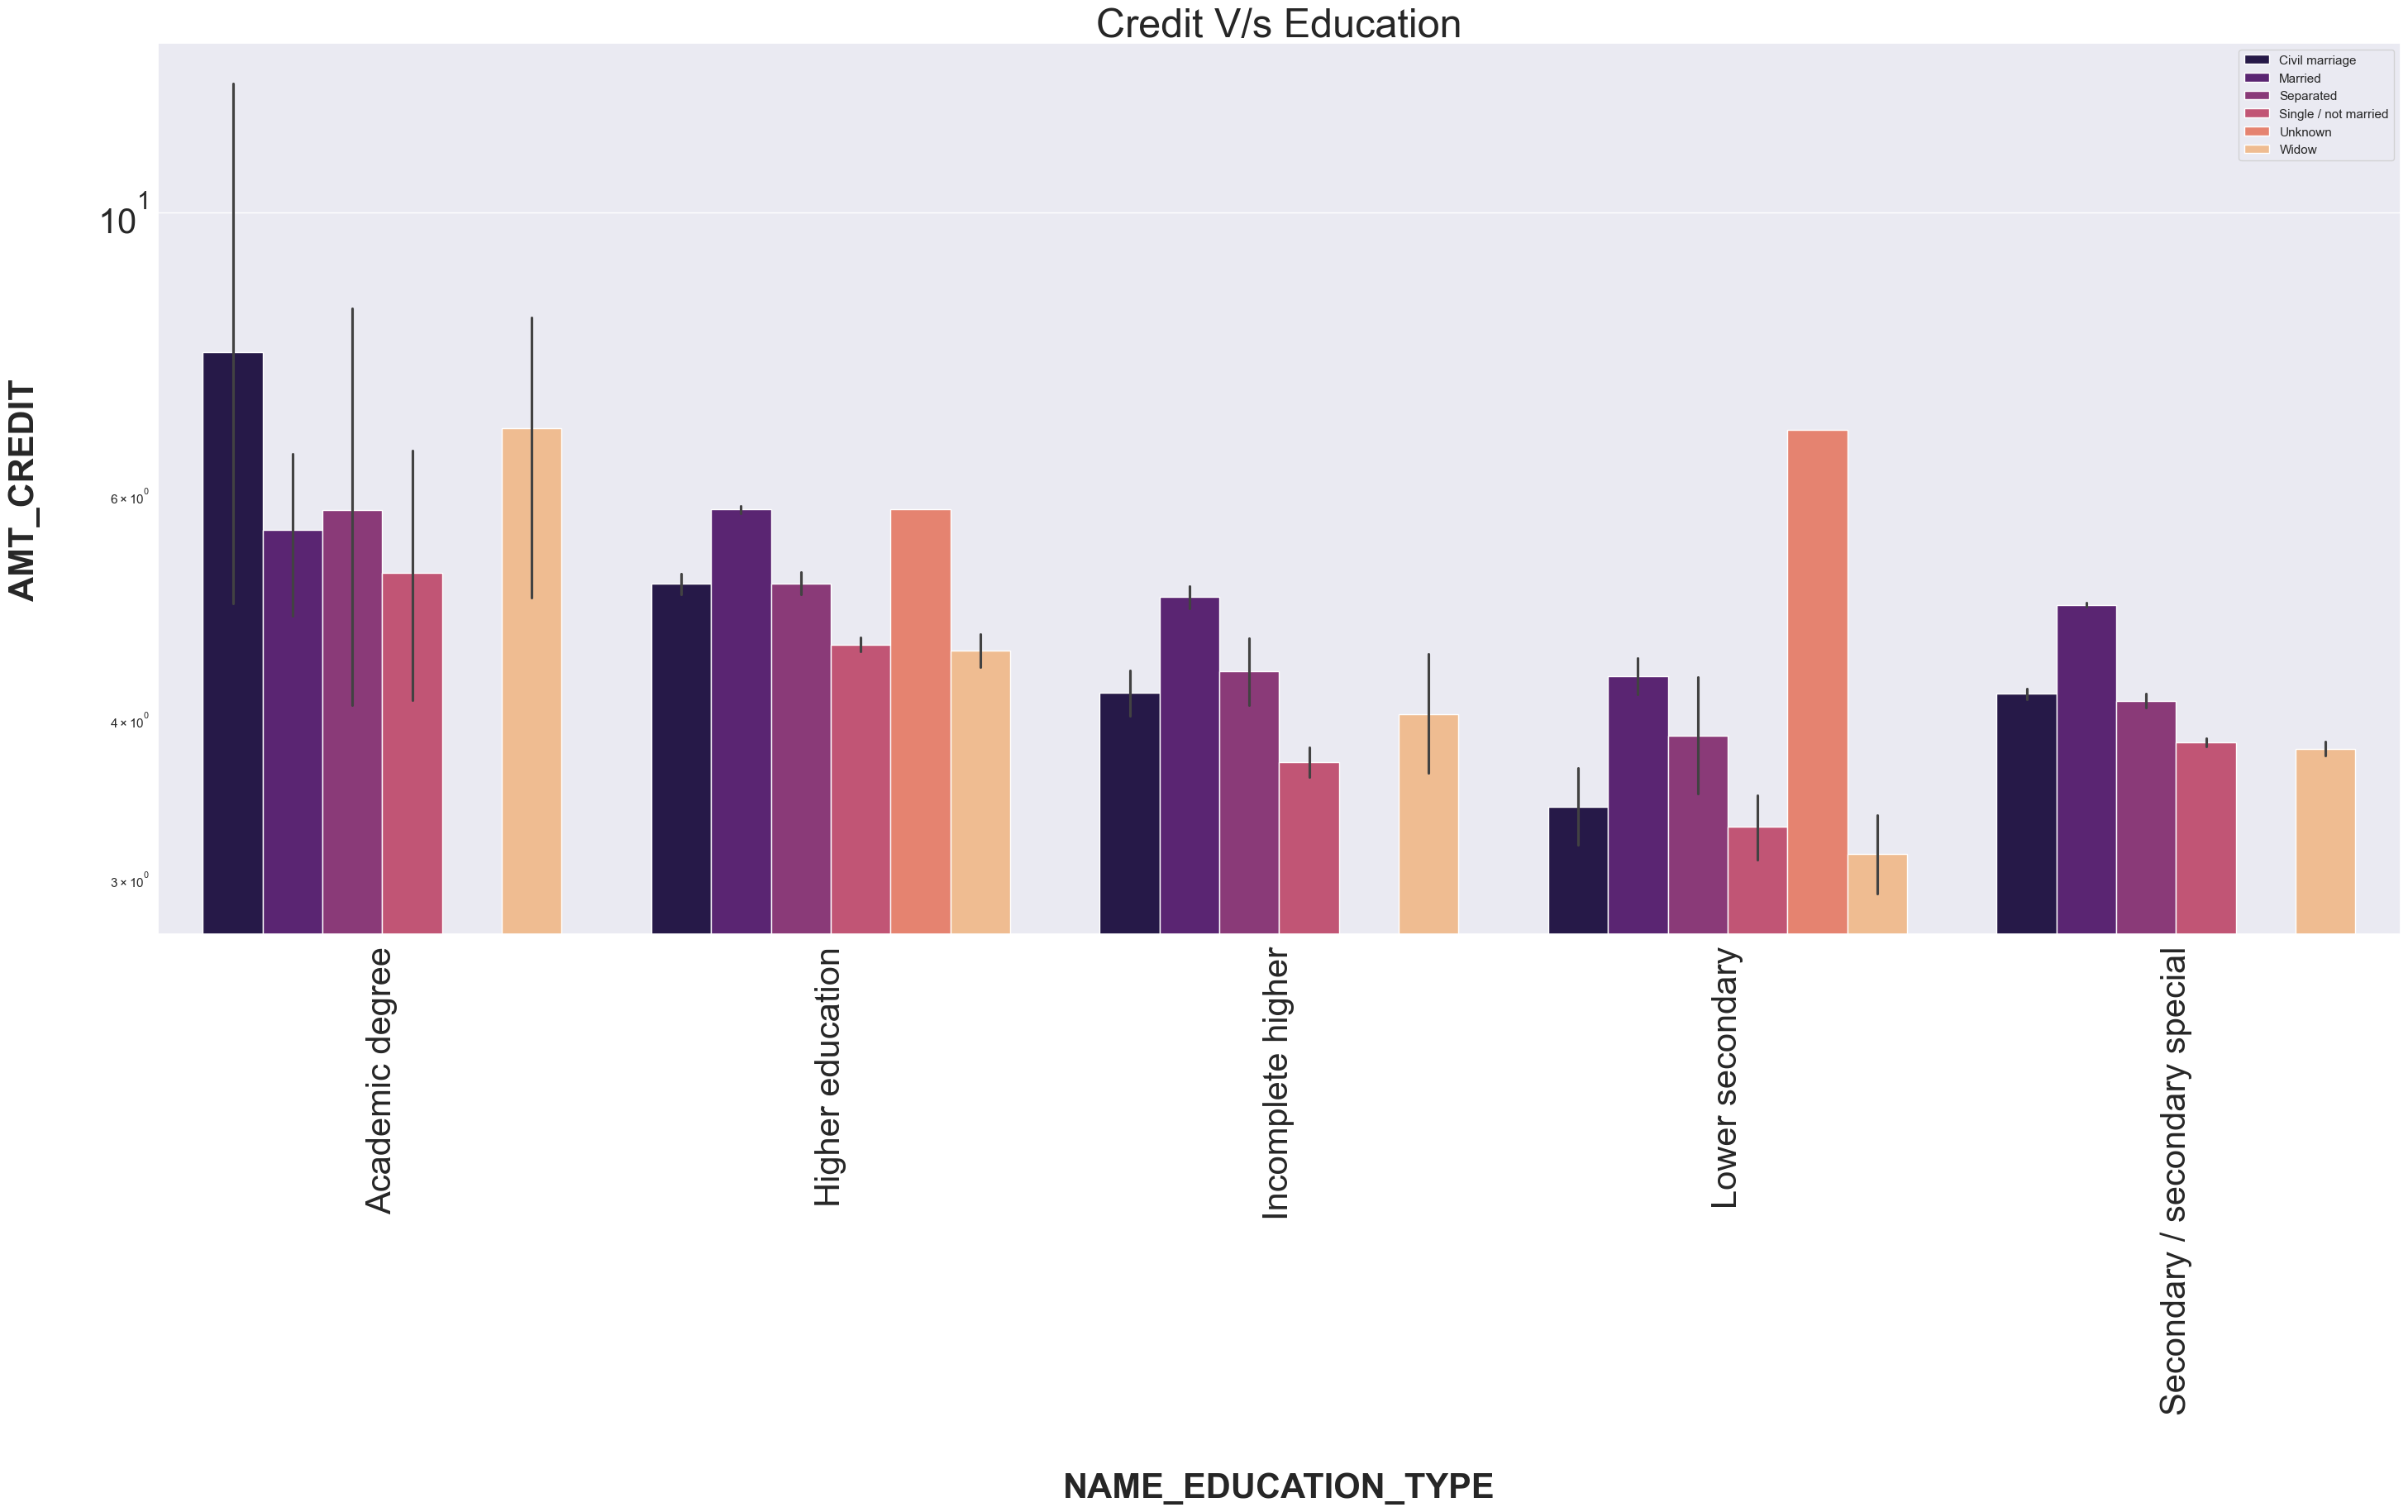

In [99]:
# Credit Allocation Based on Education and Family Status

plt.figure(figsize=(35,14))
plt.yscale('log')                     
plt.xticks(rotation = 90)


sns.barplot(data =Target0, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT',           
            hue ='NAME_FAMILY_STATUS',orient='v',palette='magma')


plt.legend(loc = 'upper right')            #Adjusting legend position
plt.title('Credit V/s Education',fontsize=35 )
plt.xlabel("NAME_EDUCATION_TYPE",fontsize= 30, fontweight="bold")
plt.ylabel("AMT_CREDIT",fontsize= 30, fontweight="bold")
plt.xticks(rotation=90, fontsize=30)
plt.yticks(rotation=360, fontsize=30)

plt.show()

***Insights***

***--- The majority of clients have credit amounts below the 25th percentile. Notably, clients with an academic degree and those who are widowed tend to apply for higher credit loans.***

***--- Additionally, clients with higher education, incomplete higher education, lower secondary education, and secondary/secondary special education also show a propensity for higher credit amounts, highlighting diverse borrowing patterns across different education levels and marital statuses.***

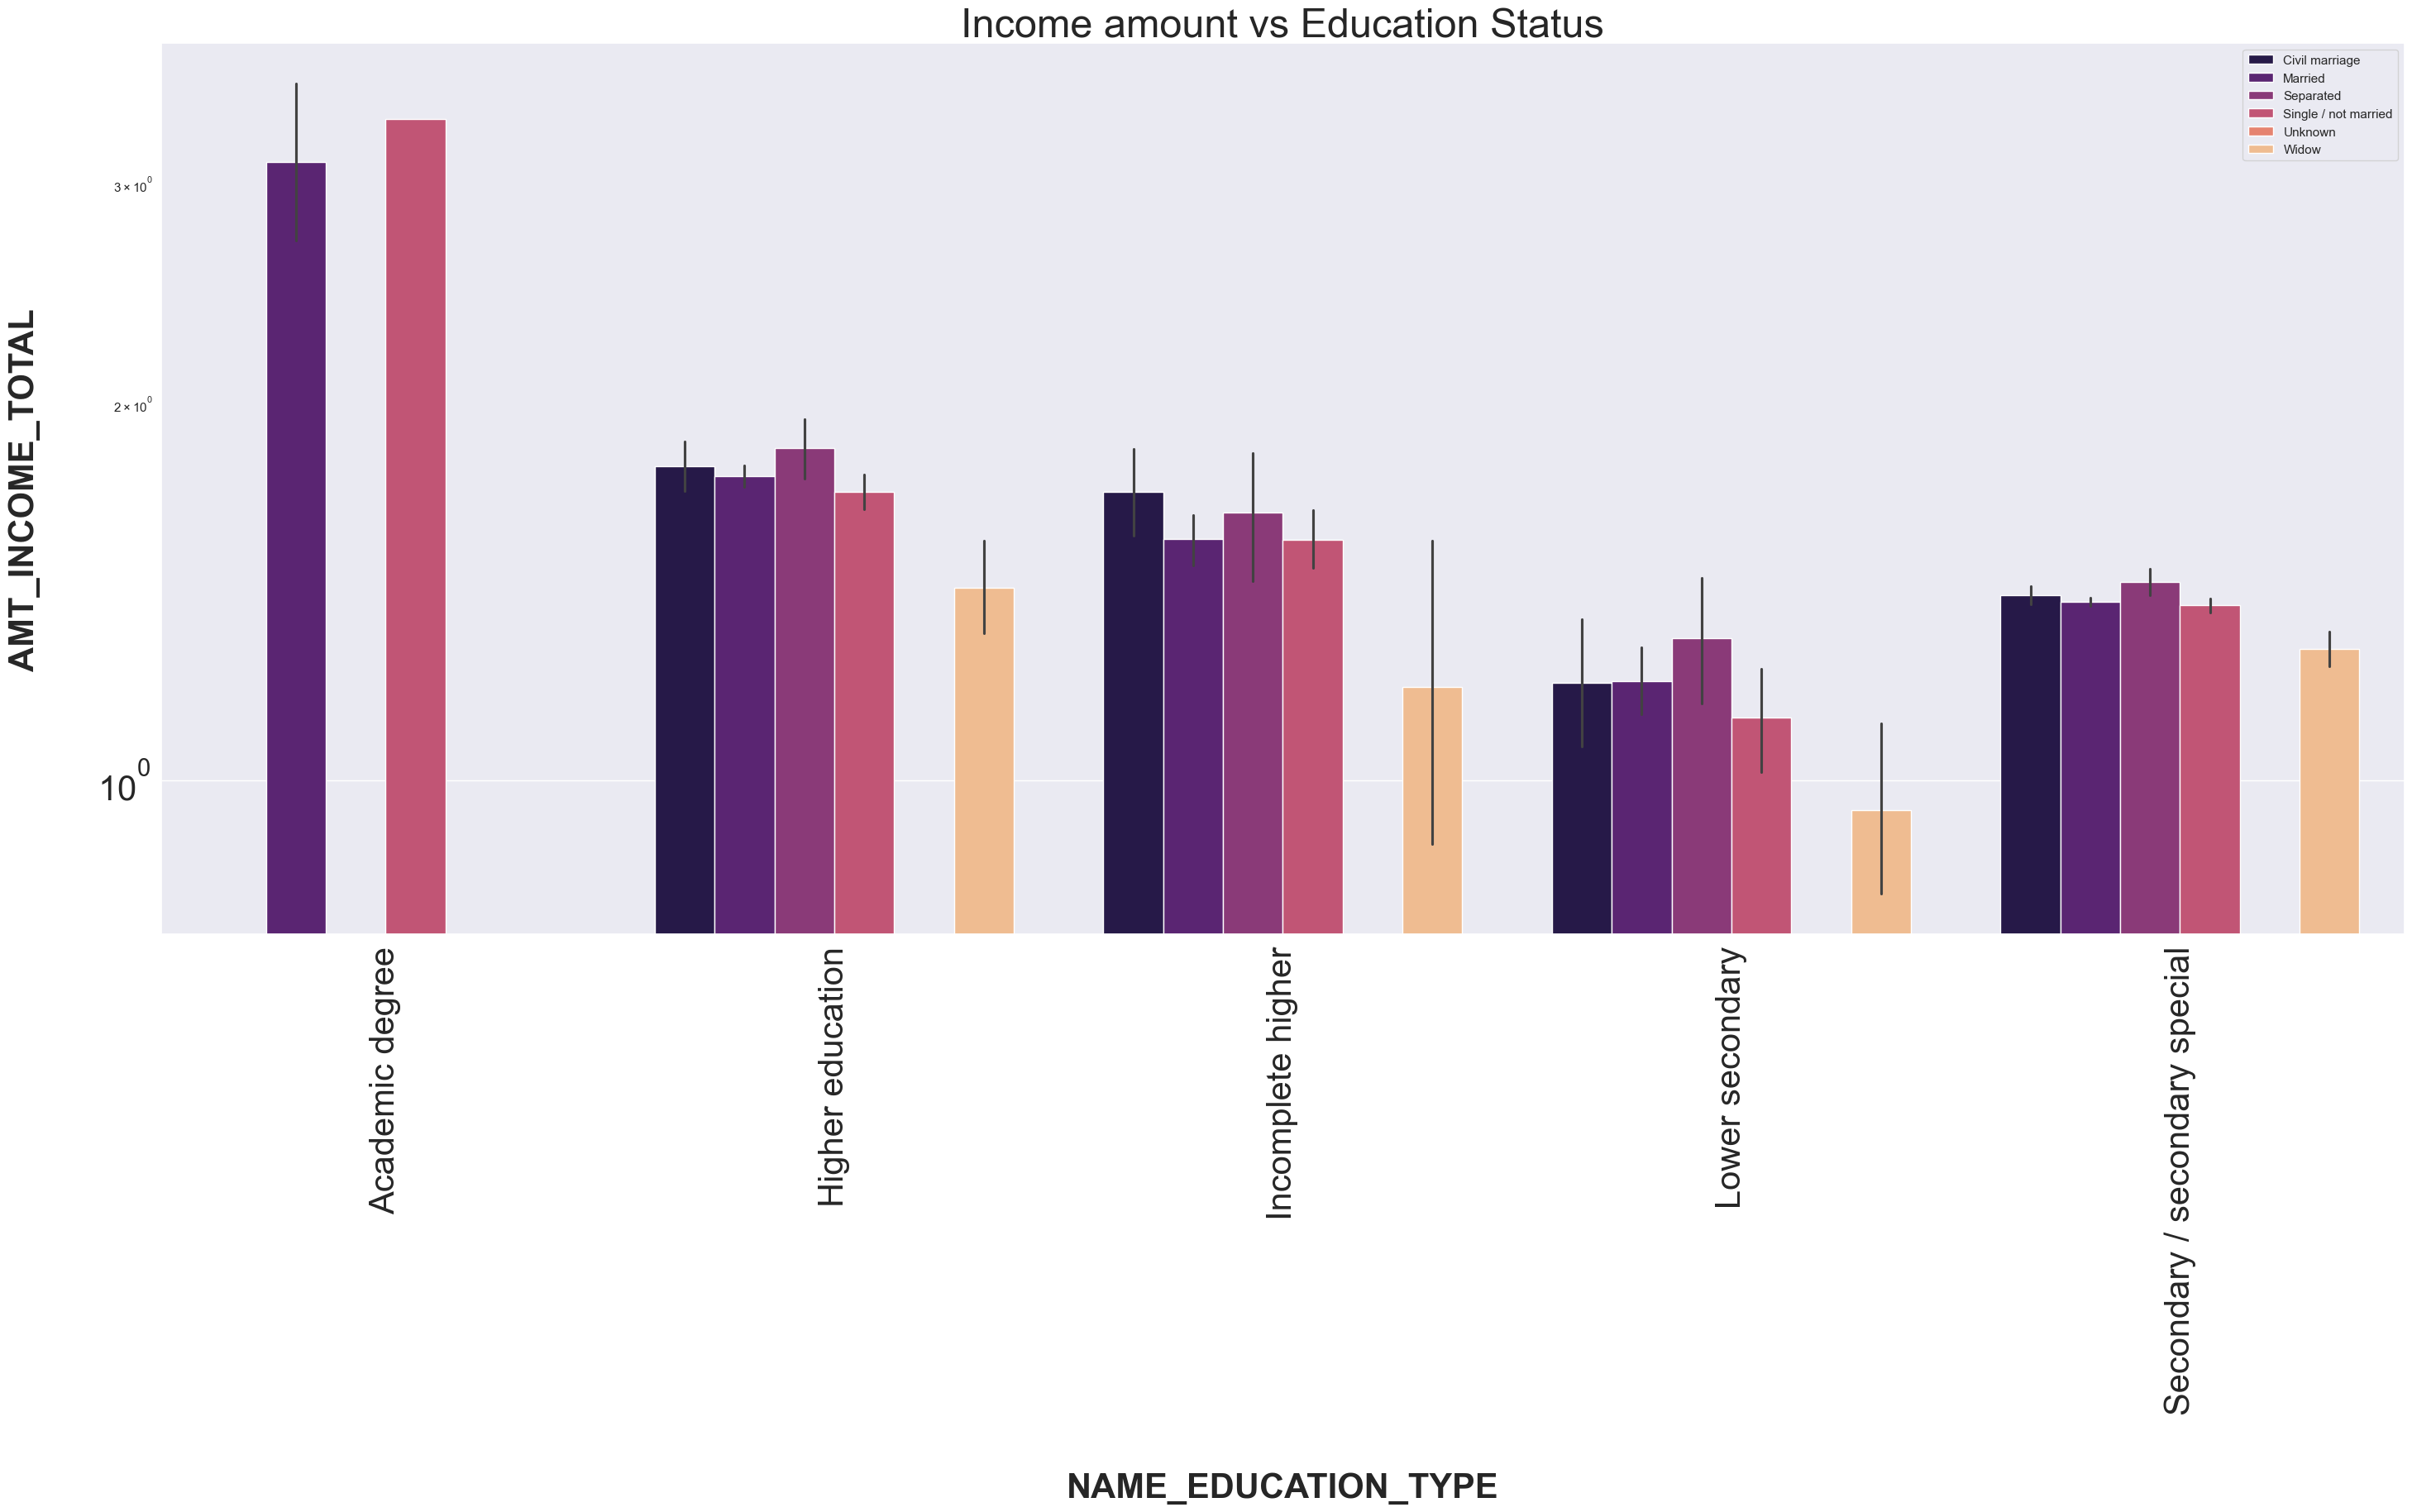

In [100]:
# Income Disparities Across Education Levels and Family Status for Defaulters

plt.figure(figsize=(35,14)) 
plt.yscale('log')                     
plt.xticks(rotation = 90)


sns.barplot(data =Target1, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL',   
            hue ='NAME_FAMILY_STATUS',orient='v',palette='magma')


plt.legend(loc = 'upper right')                                              
plt.title('Income amount vs Education Status',fontsize= 35)
plt.xlabel("NAME_EDUCATION_TYPE",fontsize= 30, fontweight="bold")
plt.ylabel("AMT_INCOME_TOTAL",fontsize= 30, fontweight="bold")
plt.xticks(rotation=90, fontsize=30)
plt.yticks(rotation=360, fontsize=30)

plt.show()

***Insights***

***--- Married clients holding academic degrees show notably higher incomes compared to counterparts with different education levels.***

***---  Additionally, within the defaulter category, clients tend to have relatively lower incomes compared to those classified as non-defaulters.***

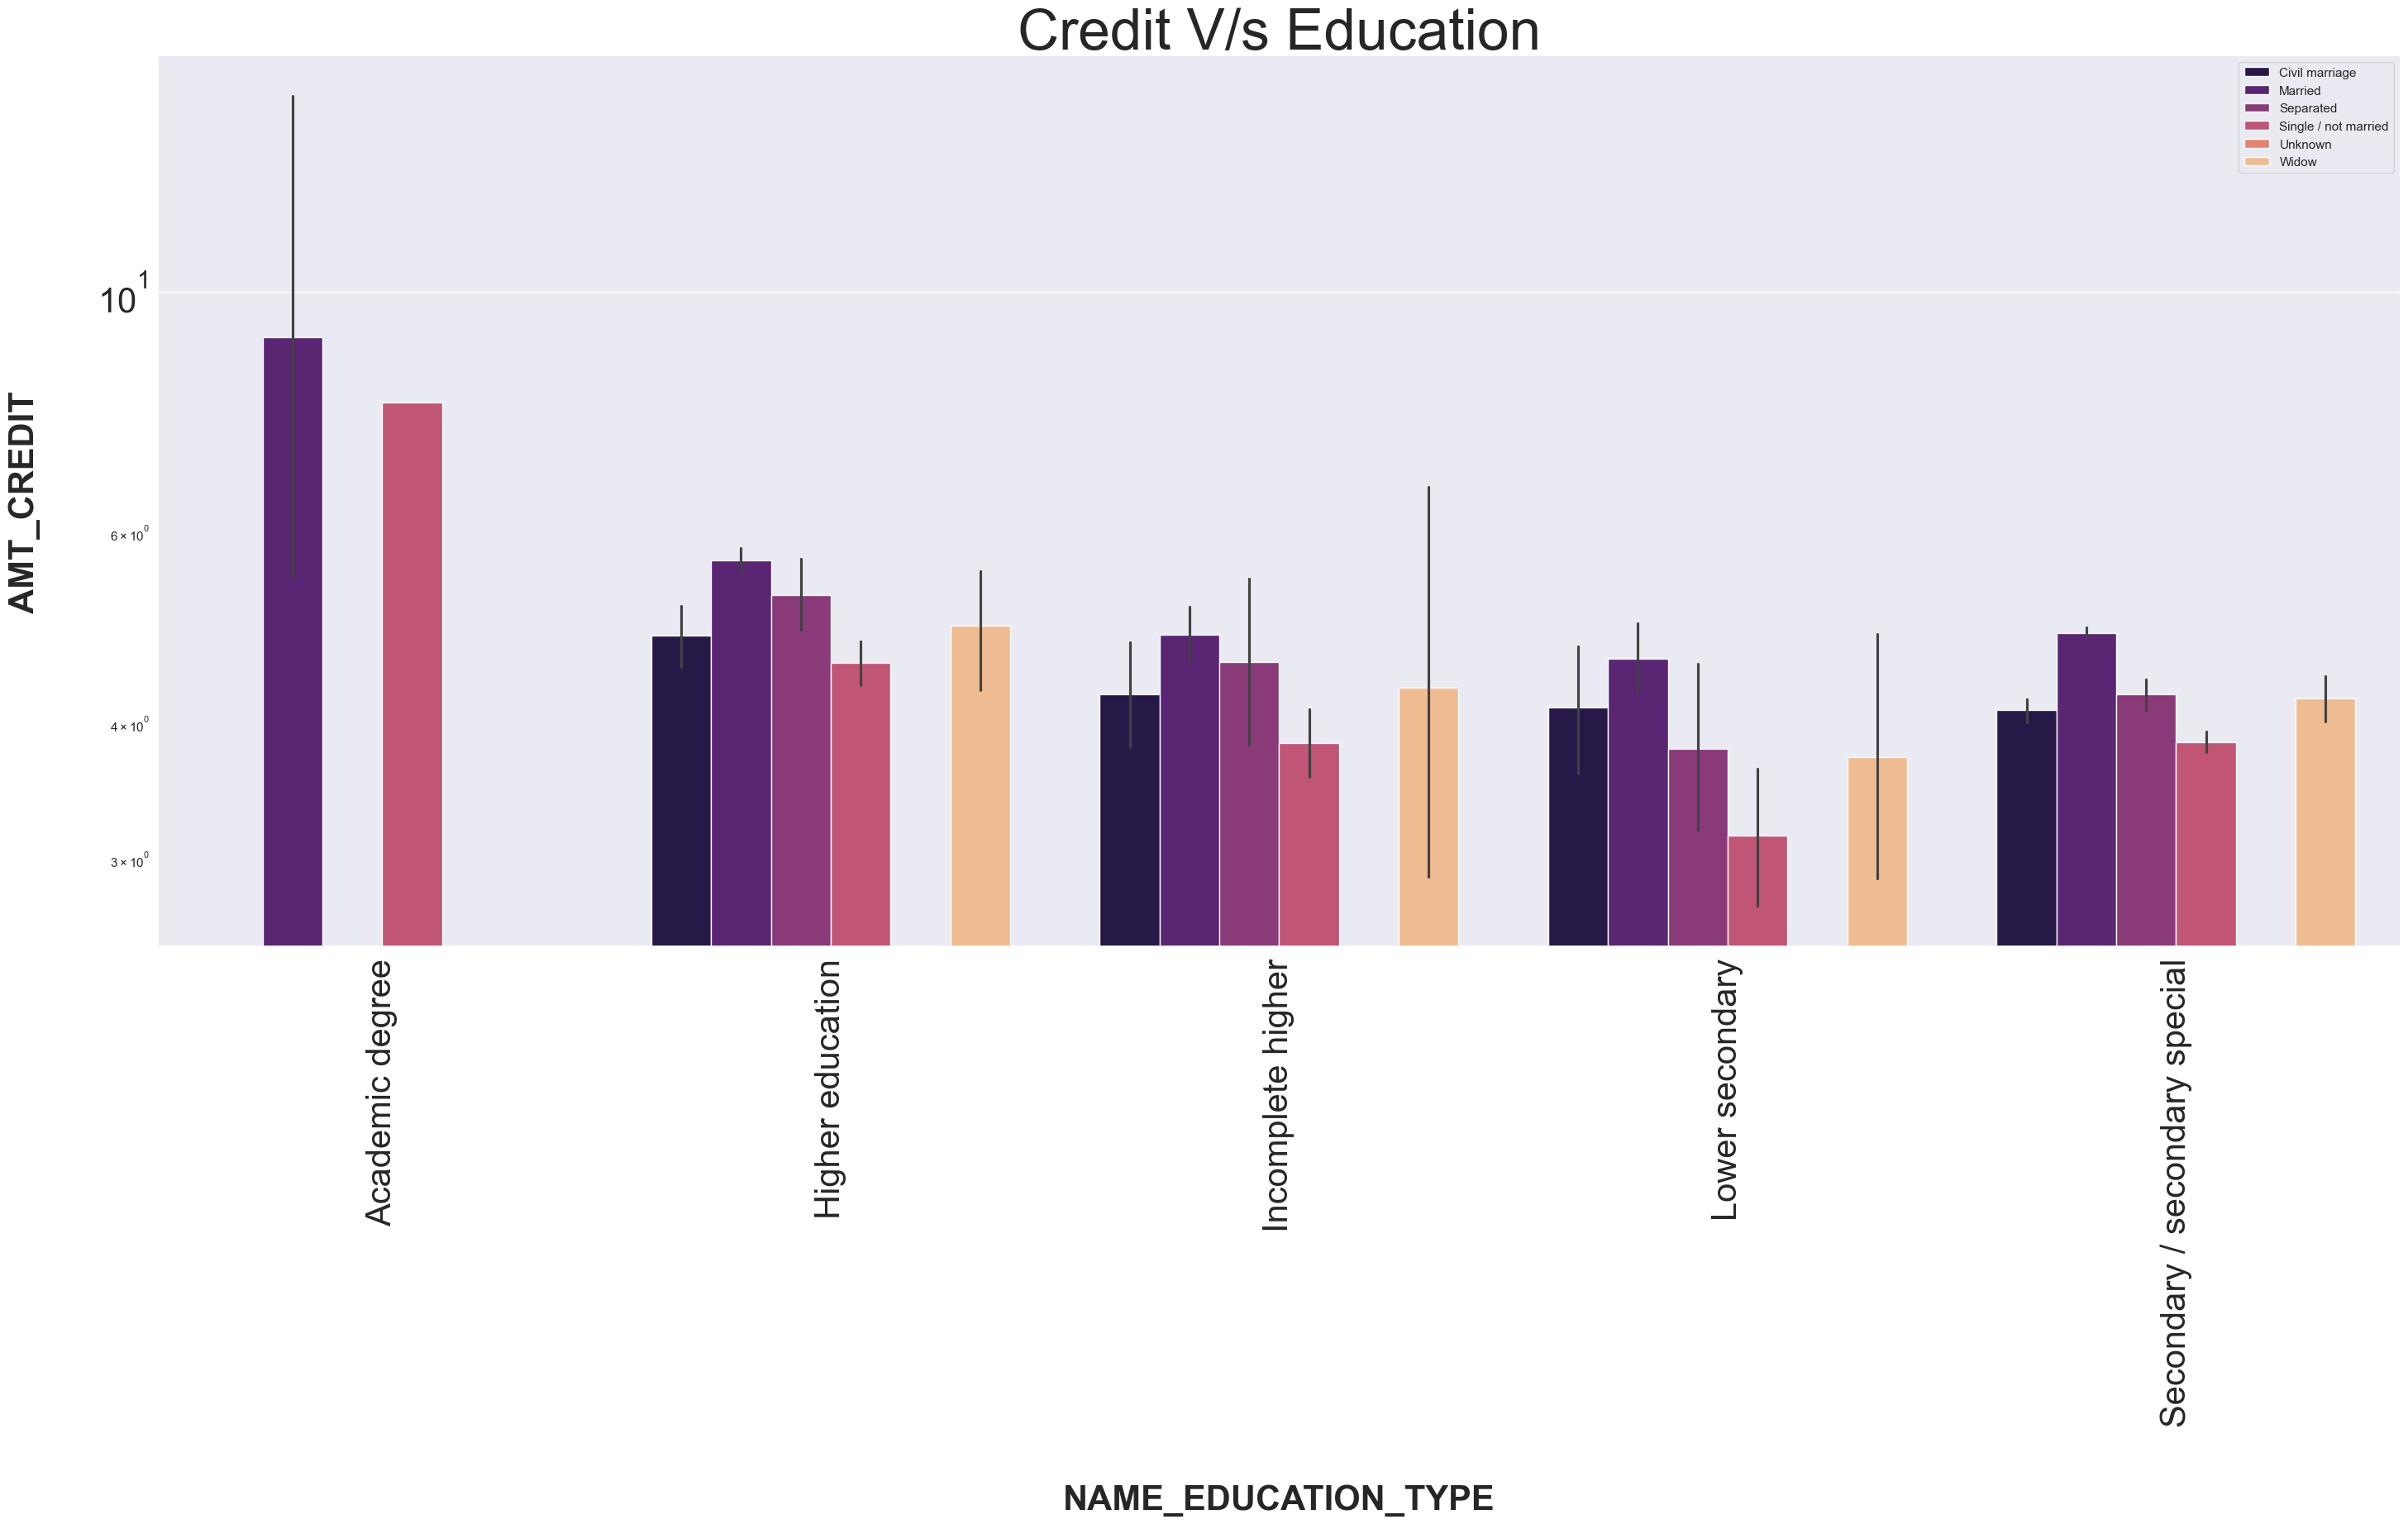

In [101]:
# Credit Allocation Based on Education and Family Status for Defaulters

plt.figure(figsize=(35,14))           
plt.yscale('log')                       
plt.xticks(rotation = 90)


sns.barplot(data =Target1, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT',      
            hue ='NAME_FAMILY_STATUS',orient='v',palette='magma')


 
plt.legend(loc = 'upper right')              #Adjusting legend position
plt.title('Credit V/s Education',fontsize=50 )
plt.xlabel("NAME_EDUCATION_TYPE",fontsize= 30, fontweight="bold")
plt.ylabel("AMT_CREDIT",fontsize= 30, fontweight="bold")
plt.xticks(rotation=90, fontsize=30)
plt.yticks(rotation=360, fontsize=30)

plt.show()

***Insights***

***--- Married clients with academic degrees exhibit a higher tendency to apply for higher credit loans.***

***--- In contrast, single clients with academic degrees suggests a more concentrated credit range.***

***--- Moreover, clients with higher education, incomplete higher education, lower secondary education, and secondary/secondary special education show a propensity for higher credit amounts, indicating diverse borrowing patterns across various education levels.***

***Bivariate Analysis: Loan Payment Difficulties by Gender, Income Range, and Education Type***

***--- The objective of this bivariate analysis is to visualize the relationship between loan payment difficulties and the combined factors of gender, income range, and education type.***

***--- A pivot table is utilized to summarize and present this relationship, and a heatmap is created for a clear visual representation.***

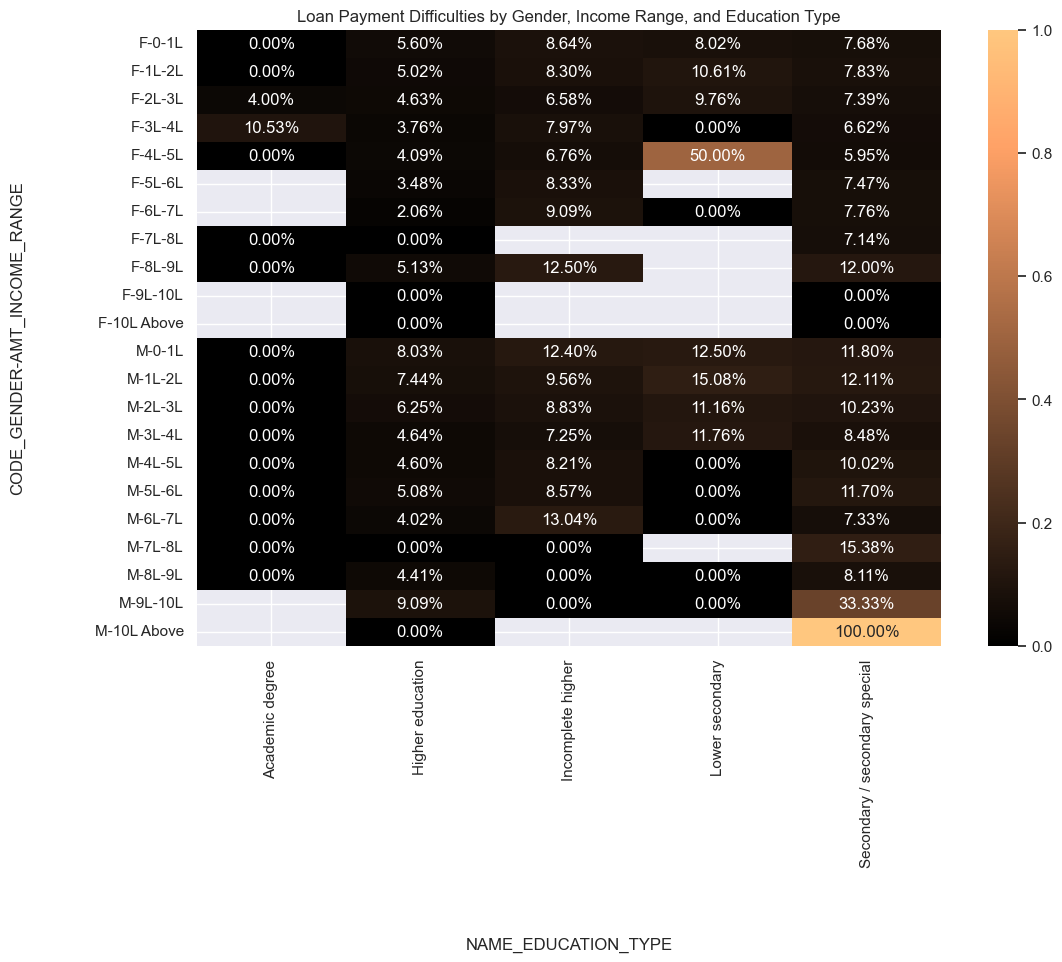

In [102]:
# Loan Payment Difficulties by Gender, Income Range, and Education Type

table = pd.pivot_table(df_appdata, values='TARGET', index=['CODE_GENDER', 'AMT_INCOME_RANGE'],
                       columns=['NAME_EDUCATION_TYPE'], aggfunc=np.mean)


plt.figure(figsize=(12, 8))
sns.heatmap(table, annot=True, cmap='copper', fmt=".2%")
plt.title('Loan Payment Difficulties by Gender, Income Range, and Education Type')
plt.show()

***--- These insights underscore the importance of tailored financial services, considering both education levels and income ranges. Implementing targeted interventions, such as financial education programs and flexible repayment options, can significantly contribute to mitigating default risks among identified high-risk demographic groups. Continuous monitoring and data-driven decision-making are essential for adapting strategies to the evolving financial landscape.***

***--- This bivariate analysis offers actionable insights that financial institutions and policymakers can leverage to enhance decision-making, refine lending practices, and implement targeted interventions aimed at reducing loan payment difficulties among specific demographic segments.***

# ***Visualizing Multivariate Relationships: A Pair Plot Exploration of Numeric Features and Correlations***

***--- To gain insights into the relationships between numeric features in the dataset, a pair plot is employed, offering a comprehensive visual overview.***

***Creating the Pair Plot:***

***--- The pair plot is generated using seaborn, a data visualization library. It produces a matrix of scatterplots, with each scatterplot illustrating the relationship between two numeric features.***

***--- The diagonal of the matrix displays the distribution of each individual variable.***

In [103]:
#  Identifying Numerical Columns in the Dataset

numerical_col = df_appdata.select_dtypes(include='number').columns
numerical_col

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'AGE'],
      dtype='object')

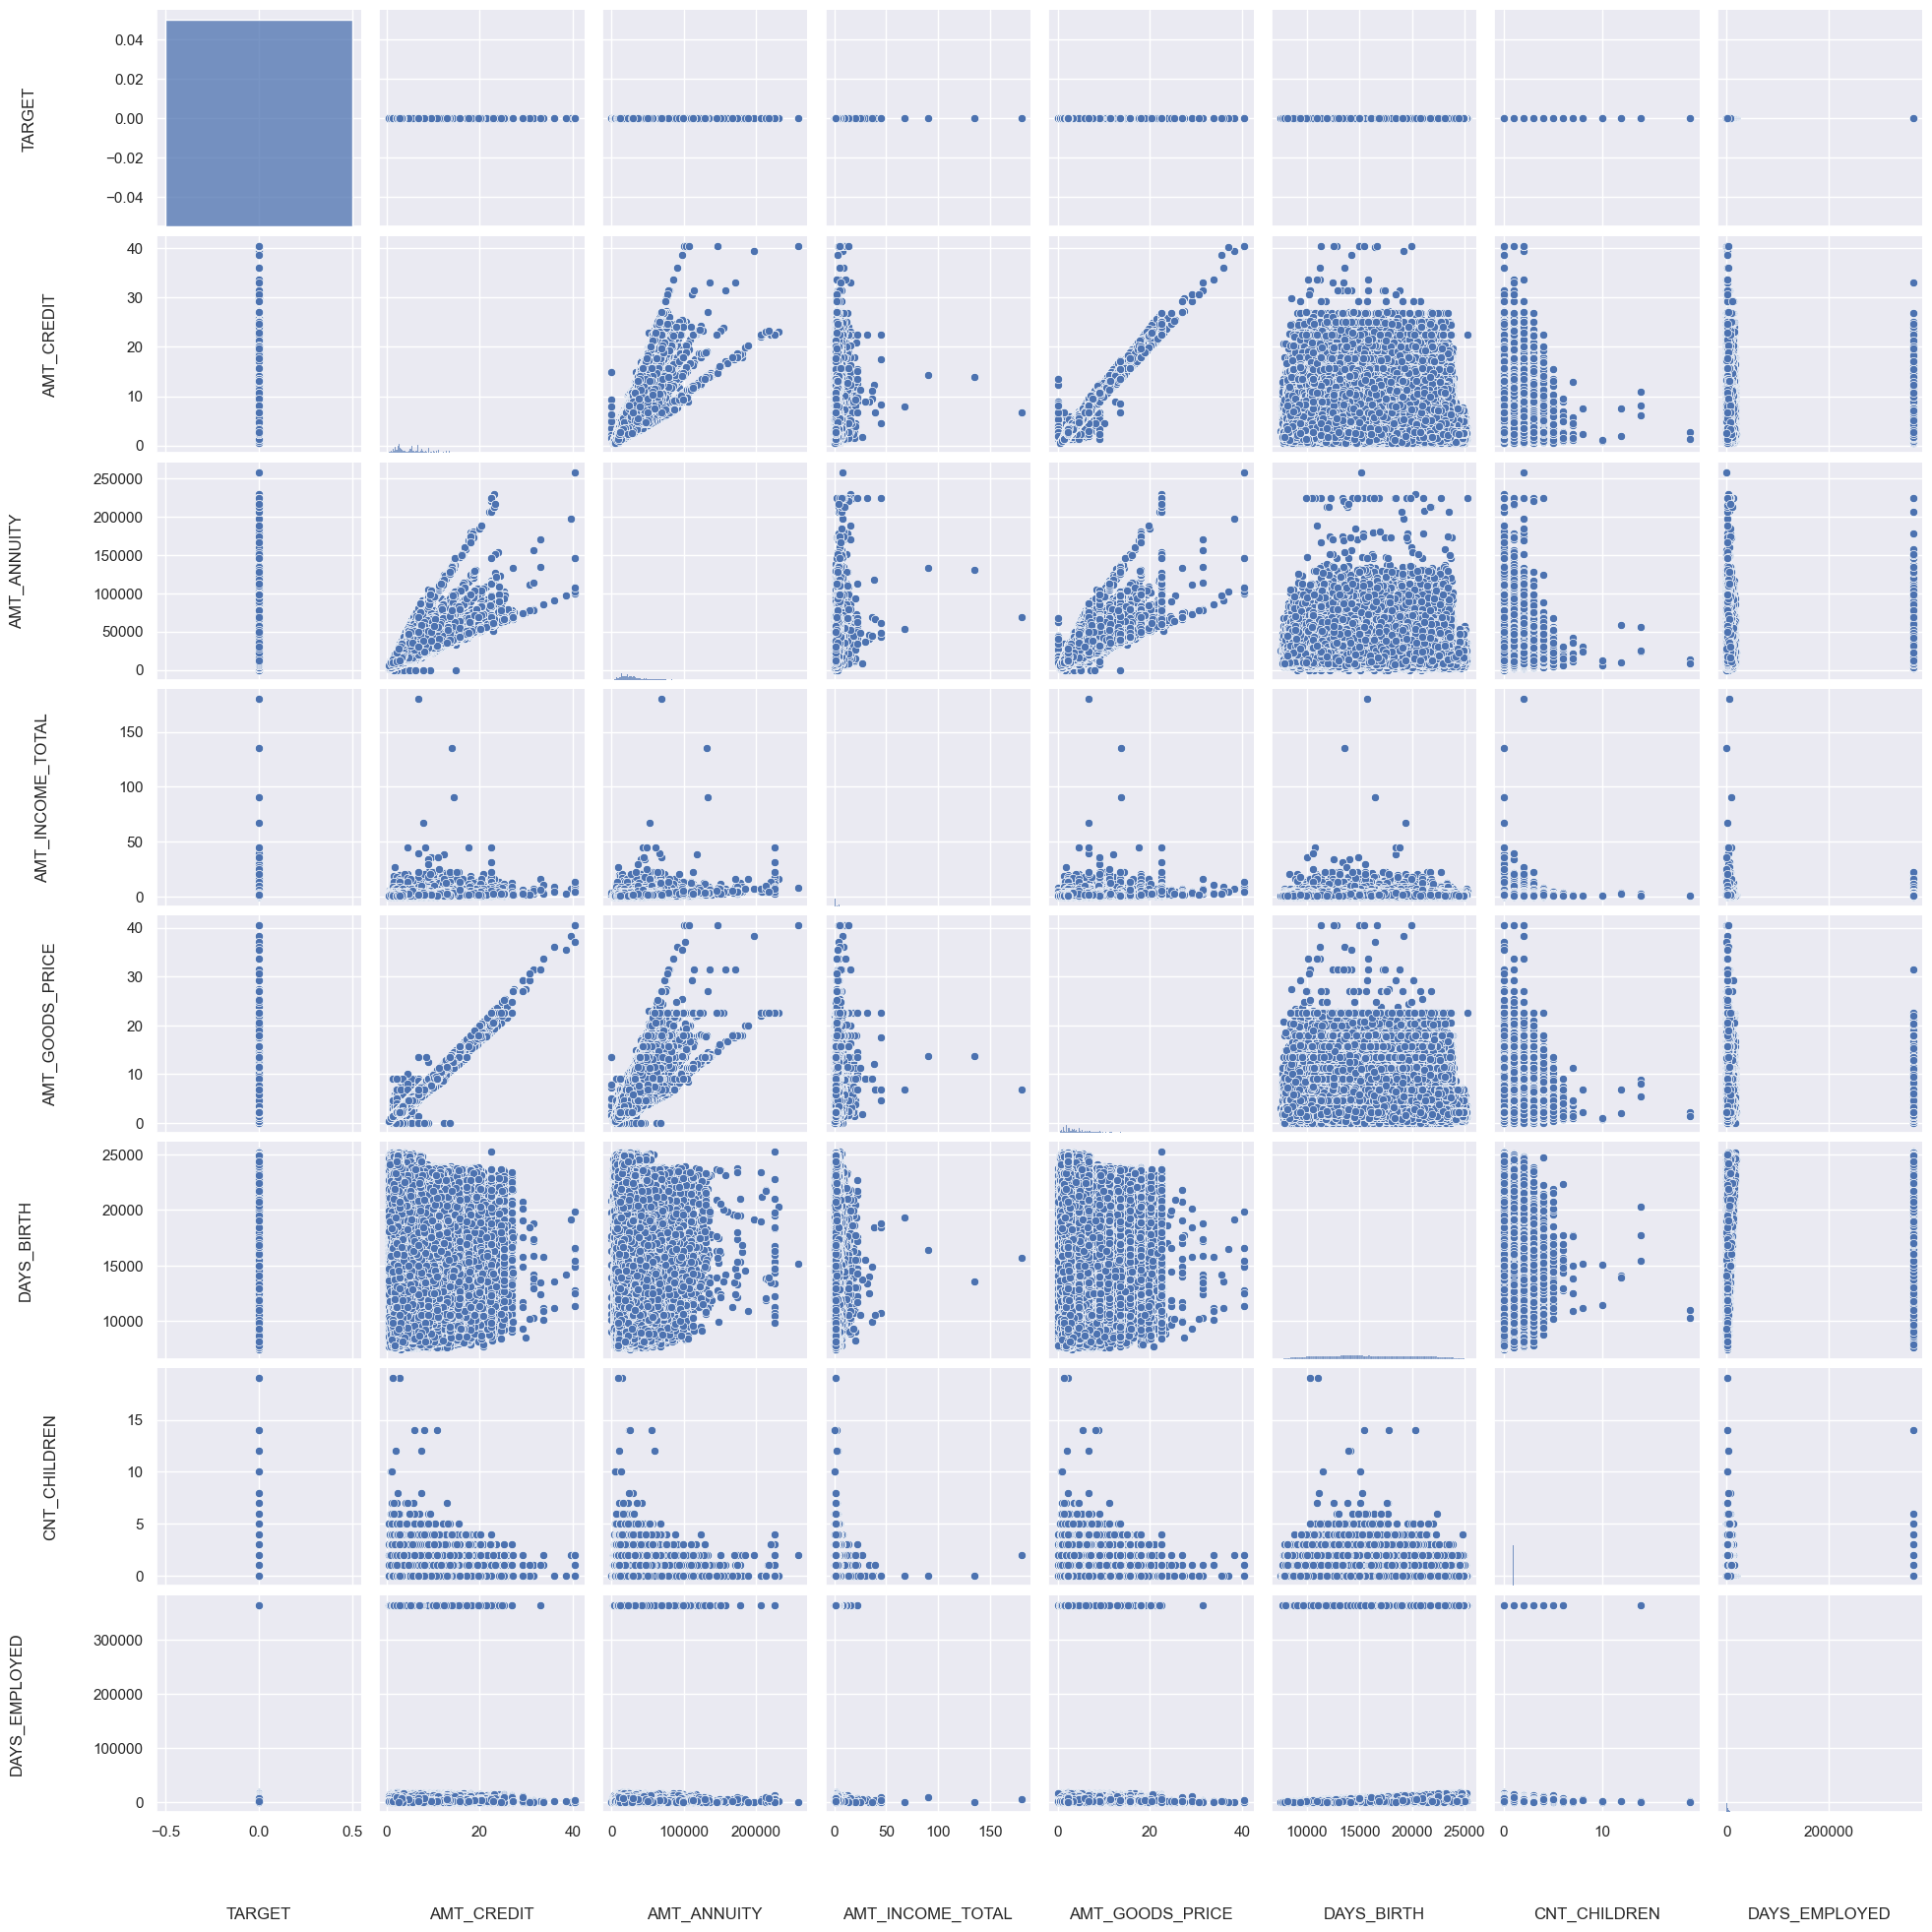

In [104]:
# Pairwise Relationship Exploration for Non-Defaulters

pair = Target0[['TARGET','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'DAYS_BIRTH','CNT_CHILDREN','DAYS_EMPLOYED']].fillna(0)
sns.pairplot(pair)

plt.show()

***Insights:***

***--- Positive or negative trends may indicate how certain variables are related.***

***--- Clusters of data points may suggest specific patterns or groups.***

***--- Distributions along the diagonal provide insights into the individual distributions of each variable.***

***--- This exploration contributes to a deeper understanding of the non-defaulting group's financial and demographic characteristics, facilitating informed decision-making in subsequent analyses.***

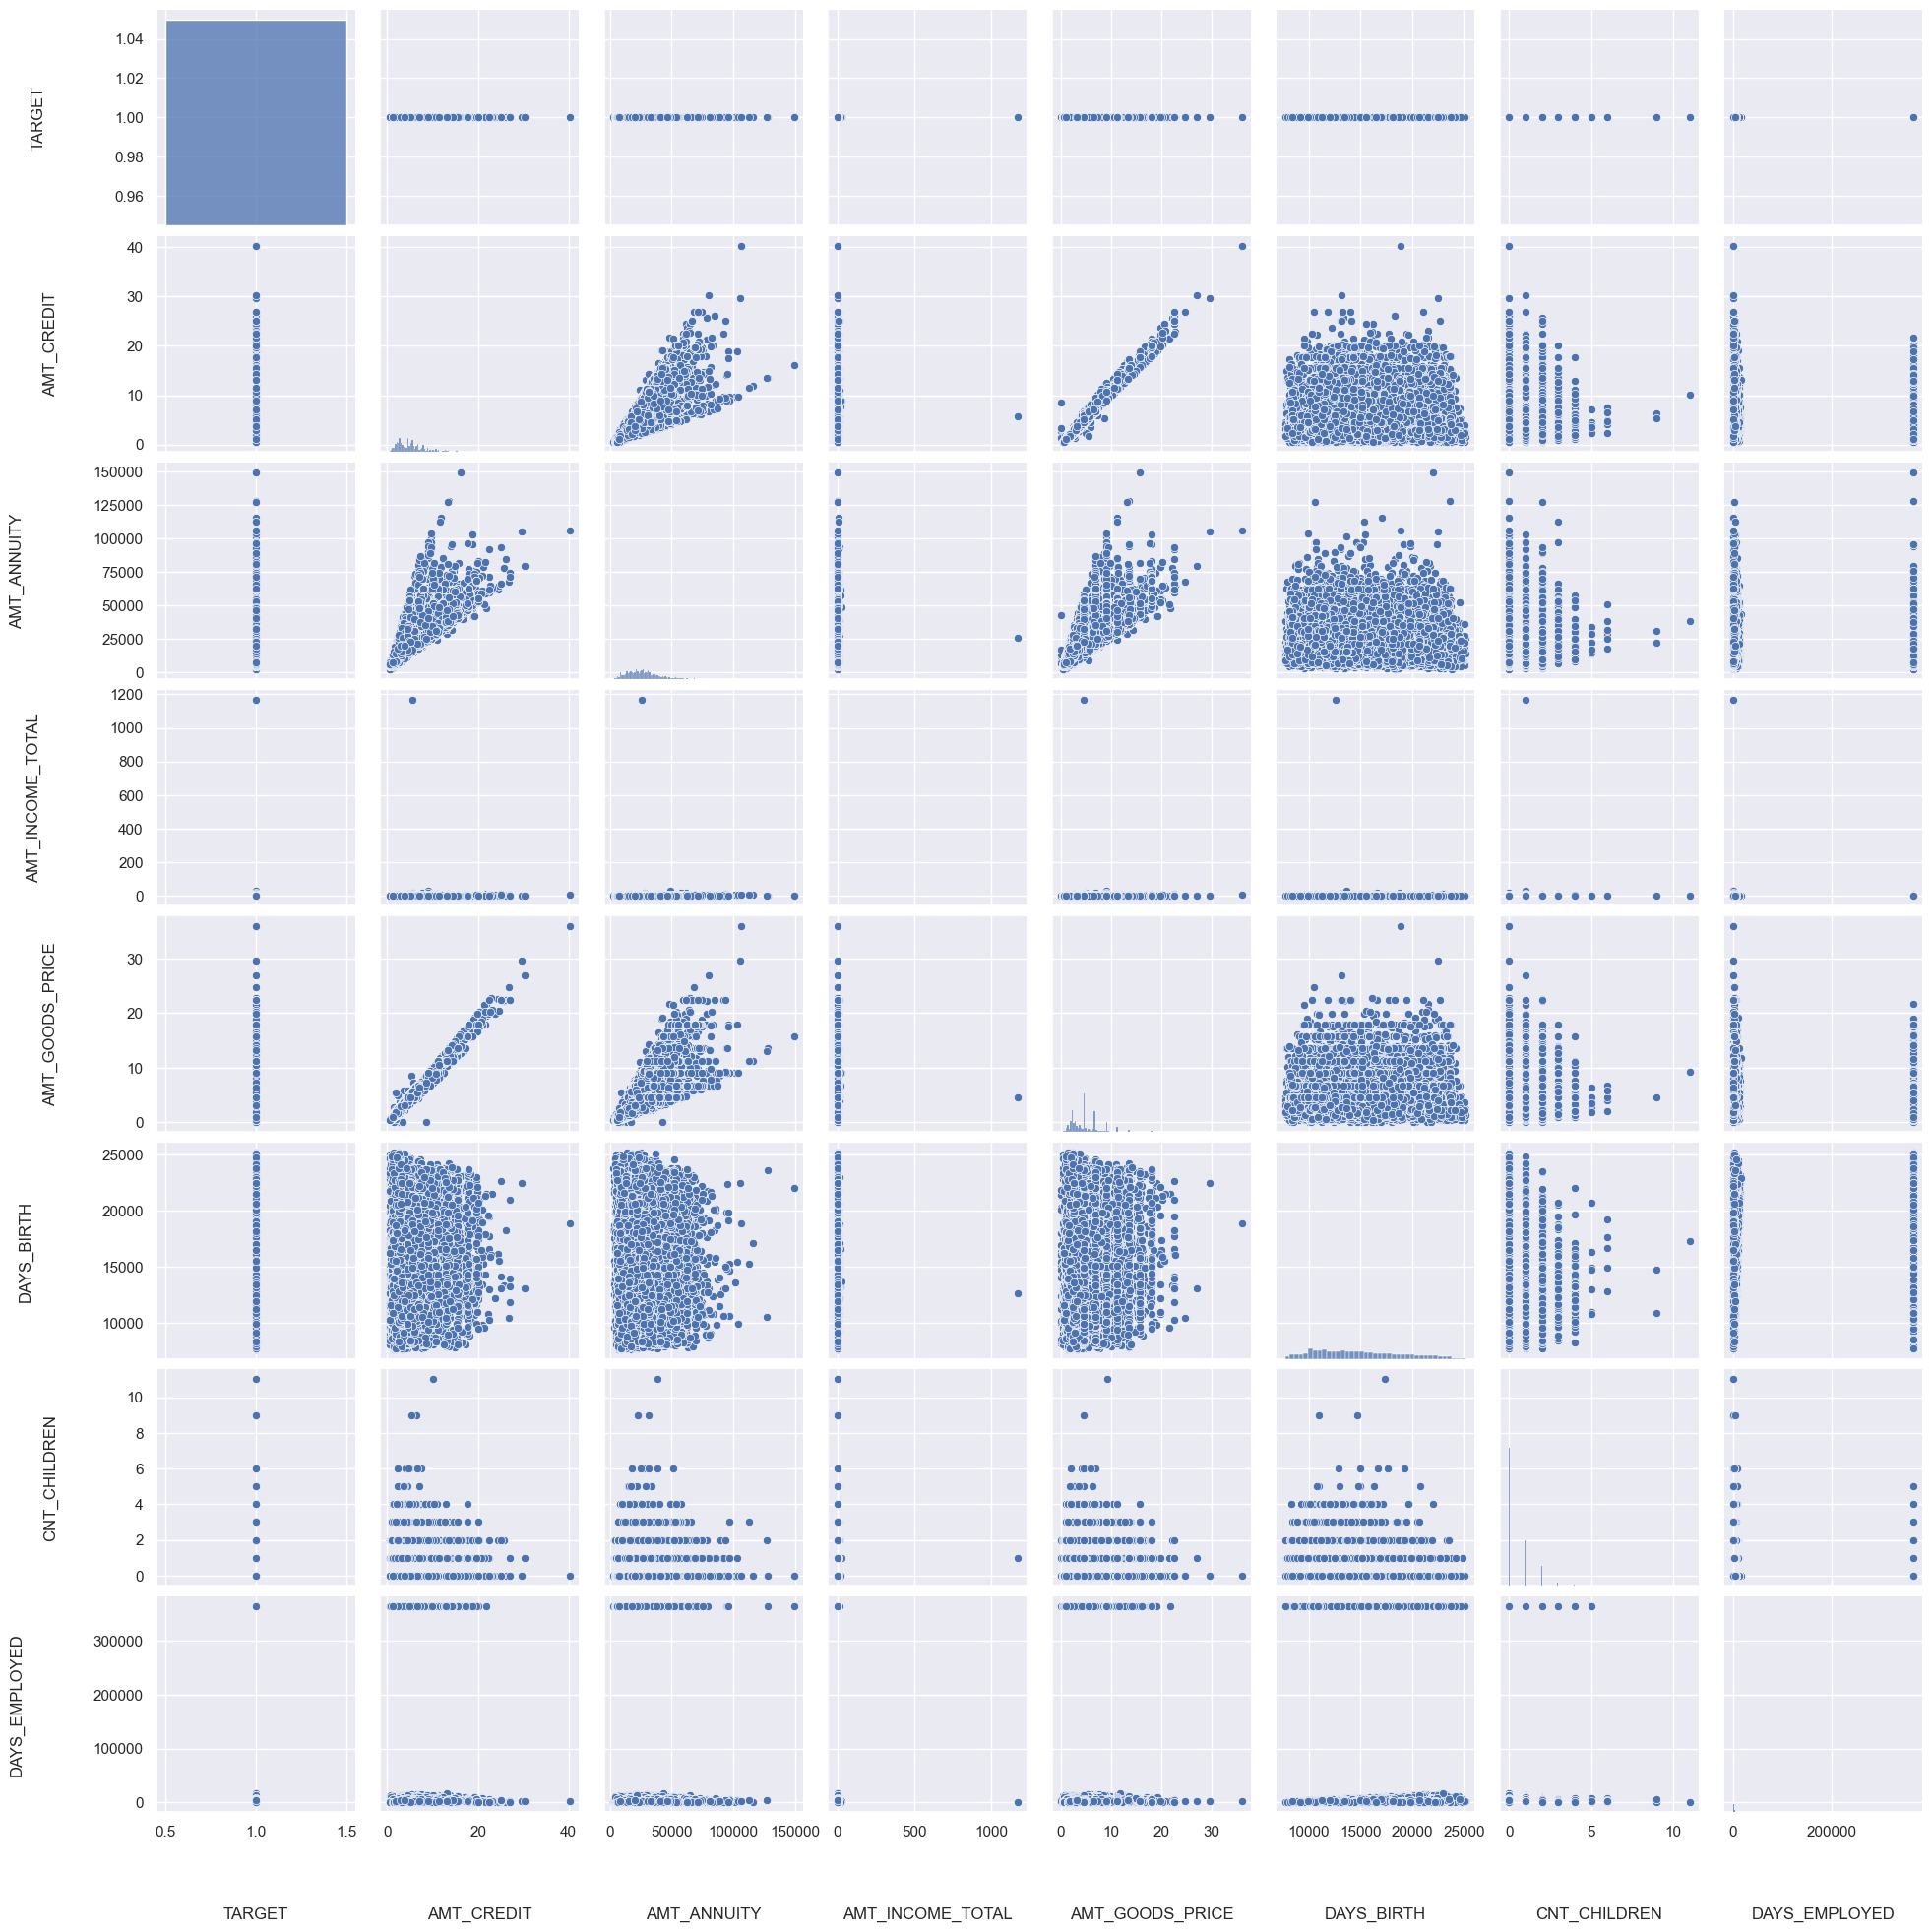

In [105]:
# Pairwise Relationship Exploration for Defaulters

pair = Target1[['TARGET','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'DAYS_BIRTH','CNT_CHILDREN','DAYS_EMPLOYED']].fillna(0)
sns.pairplot(pair)

plt.show()

***Insights:***

***--- For defaulters, the pair plot suggests a lack of clear linear relationships among numerical features, indicating potential complexity in the factors contributing to loan payment difficulties. The distributions reveal scattered patterns, emphasizing the heterogeneous nature of defaulters' financial and demographic profiles.***

***Insights from Pair Plot Analysis of Key Financial Variables***

***--- The pair plot analysis reveals critical insights into the relationships among financial variables for both defaulters non-defaulters. Notably, the variables AMT_CREDIT, AMT_GOODS_PRICE, and AMT_ANNUITY exhibit significant correlations, impacting the understanding of financial dynamics.***

***--- The interplay among these financial variables is essential for comprehensive risk assessment, emphasizing the need for a nuanced approach beyond individual variable analysis.***

# Conclusion: Exploratory Data Analysis (EDA)

# ***Univariate analysis:***

***Demographic Influences on Default Rates:***

***Age Group:***

   ***--- In the extensive exploration of univariate analysis, it became evident that age is a significant factor influencing loan default rates.***

   ***--- The age group of 30-45 demonstrated a higher propensity for default, suggesting a potential need for tailored risk assessment strategies for individuals within this demographic. Conversely, applicants aged above 60 exhibited a notably lower default rate, emphasizing the importance of age as a predictive variable in credit risk assessment.***

***Education Type:***

***--- The impact of educational qualifications on default rates unveiled intriguing patterns.***

***--- Individuals with lower secondary education levels were associated with a higher likelihood of default, while those with academic degrees displayed a remarkable resilience to default.***

***--- This emphasizes the importance of considering educational backgrounds as an integral component of risk profiling in lending decisions.***

***Years Employed:***

***--- Years of employment emerged as another critical factor influencing default rates. Applicants with 0-10 years of employment exhibited a higher likelihood of default, indicating a potential vulnerability during the initial career stages.***

***--- On the contrary, those employed for 40+ years displayed the lowest default rates, suggesting a heightened financial stability associated with long-term employment.***

***Credit-Related Factors:***

***Credit Amount:***

***--- Examining the relationship between the amount of credit extended and default rates provided valuable insights for risk management.***

***--- Credit amounts within the range of 400k to 600k were associated with a higher probability of default, signaling a need for careful evaluation and monitoring for loans falling within this bracket.***

***--- Conversely, credit amounts exceeding 1 million demonstrated the lowest default rates, possibly indicating a segment of borrowers with a more secure financial standing.***

***Gender Disparities and Housing Impact:***

***Gender:***

***--- Gender disparities in default rates revealed a nuanced trend. Although the majority of applicants were females, males exhibited a higher default rate.***

***--- This incongruence between application count and default rates underscores the importance of gender-based risk assessment in credit scoring models.***

***Housing Type:***

***--- Housing arrangements emerged as a noteworthy factor influencing default rates. Applicants residing in rented apartments or with parents displayed an elevated risk of default, prompting further examination into the financial stability and reliability of this particular demographic.***


# Bivariate Analysis: Uncovering Complex Relationships in Credit Risk

***--- This section delves into the intricate relationships between pairs of variables, shedding light on unexpected correlations and uncovering nuanced patterns that influence credit risk.***

***--- One noteworthy exploration involves the interaction between education types and income levels, revealing a counterintuitive finding. Specifically, high-income individuals with academic degrees demonstrate a higher likelihood of default, prompting a closer examination of financial behaviors within this demographic.***

***--- This bivariate analysis aims to provide a deeper understanding of the multifaceted dynamics influencing credit risk by examining the interplay between key variables.****

***Unraveling Paradoxes in Credit Risk: The Intricate Relationship between Education, Income, and Default Likelihood***

***--- The exploration of bivariate relationships delved deeper into the interplay between different variables.***

***--- For instance, the interaction between education types and income levels unearthed a counterintuitive finding – high-income individuals with academic degrees exhibited a higher likelihood of default.***

***--- This unexpected correlation suggests the need for a more nuanced assessment of financial behaviors within this demographic.***

***Navigating Credit Risk in Larger Families: Unraveling Financial Dynamics and Responsibilities:***

***--- The correlation between total income and the count of family members shed light on a potential risk factor.***

***--- Individuals with higher counts of family members, especially those with incomes above average, displayed an increased likelihood of default.***

***--- This raises questions about the financial management and responsibilities associated with larger families, necessitating a comprehensive evaluation of familial dynamics in risk assessment models.***

# Multivariate Analysis: Illuminating Complex Relationships

***--- The generation of the pair plot involves utilizing seaborn, a robust data visualization library. This tool constructs a matrix of scatterplots, where each scatterplot illuminates the relationship between two numeric features within the dataset. .***

***---- The diagonal of this matrix uniquely presents the distribution of each individual variable, providing a comprehensive view of their respective data patterns.***

***---- The visual representation offered by the pair plot is instrumental in identifying correlations, clusters, and individual variable distributions, thereby facilitating a deeper understanding of the interplay between different numeric features in the dataset.***

***Unveiling Insights for Non-Defaulters: A Visual Exploration Through Pair Plots***

***--- Positive or negative trends in the scatterplots serve as indicators of the relationships between specific variables, allowing for a nuanced understanding of their interdependencies.***

***--- The identification of clusters among data points suggests distinctive patterns or groups within the non-defaulting group, aiding in the recognition of shared characteristics.***

***--- This comprehensive exploration significantly contributes to a deeper comprehension of the financial and demographic characteristics of the non-defaulting group.***

***---  Such insights pave the way for more informed decision-making in subsequent analyses, enhancing the overall understanding of the dataset.***